In [16]:
import sys
import numpy as np
# from matplotlib import pyplot as plt # <- weird errors :(
import cv2
import pandas as pd
import utils
import math
from matplotlib import pyplot as plt

In [805]:
results_path = "c:/Users/13108/Desktop/Noah/Side-Juicer-Control/Results/Mirror_Control.csv" # final CSV with all gazetracking data and video info

In [807]:
trial_data = pd.read_csv(results_path)
Sessions_High = {}
Sessions_High_ZF = {}
Sessions_High_TF = {}
Sessions_High_ZT = {}
Sessions_Low = {}
Sessions_Low_ZF = {}
Sessions_Low_TF= {}
Sessions_Low_ZT = {}

Other_StereoAvertBeforeLong_Low= np.array([])
Other_StereoAvertBeforeLongZF_Low= np.array([])
Other_StereoAvertBeforeLongTF_Low= np.array([])
Other_StereoAvertBeforeLongZT_Low= np.array([])
Other_StereoAvertBeforeLong_High= np.array([])
Other_StereoAvertBeforeLongZF_High= np.array([])
Other_StereoAvertBeforeLongTF_High= np.array([])
Other_StereoAvertBeforeLongZT_High= np.array([])

Self_StereoAvertBeforeLong_Low= np.array([])
Self_StereoAvertBeforeLongZF_Low= np.array([])
Self_StereoAvertBeforeLongTF_Low= np.array([])
Self_StereoAvertBeforeLongZT_Low= np.array([])
Self_StereoAvertBeforeLong_High= np.array([])
Self_StereoAvertBeforeLongZF_High= np.array([])
Self_StereoAvertBeforeLongTF_High= np.array([])
Self_StereoAvertBeforeLongZT_High= np.array([])

Other_StereoAvertBeforeShort_Low= np.array([])
Other_StereoAvertBeforeShortZF_Low= np.array([])
Other_StereoAvertBeforeShortTF_Low= np.array([])
Other_StereoAvertBeforeShortZT_Low= np.array([])
Other_StereoAvertBeforeShort_High= np.array([])
Other_StereoAvertBeforeShortZF_High= np.array([])
Other_StereoAvertBeforeShortTF_High= np.array([])
Other_StereoAvertBeforeShortZT_High= np.array([])

Self_StereoAvertBeforeShort_Low= np.array([])
Self_StereoAvertBeforeShortZF_Low= np.array([])
Self_StereoAvertBeforeShortTF_Low= np.array([])
Self_StereoAvertBeforeShortZT_Low= np.array([])
Self_StereoAvertBeforeShort_High= np.array([])
Self_StereoAvertBeforeShortZF_High= np.array([])
Self_StereoAvertBeforeShortTF_High= np.array([])
Self_StereoAvertBeforeShortZT_High= np.array([])

Other_StereoAvertAfterFull_Low= np.array([])
Other_StereoAvertAfterFullZF_Low= np.array([])
Other_StereoAvertAfterFullTF_Low= np.array([])
Other_StereoAvertAfterFullZT_Low= np.array([])
Other_StereoAvertAfterFull_High= np.array([])
Other_StereoAvertAfterFullZF_High= np.array([])
Other_StereoAvertAfterFullTF_High= np.array([])
Other_StereoAvertAfterFullZT_High= np.array([])

Self_StereoAvertAfterFull_Low= np.array([])
Self_StereoAvertAfterFullZF_Low= np.array([])
Self_StereoAvertAfterFullTF_Low= np.array([])
Self_StereoAvertAfterFullZT_Low= np.array([])
Self_StereoAvertAfterFull_High= np.array([])
Self_StereoAvertAfterFullZF_High= np.array([])
Self_StereoAvertAfterFullTF_High= np.array([])
Self_StereoAvertAfterFullZT_High= np.array([])

Other_StereoAvertAfterBR_Low= np.array([])
Other_StereoAvertAfterBRZF_Low= np.array([])
Other_StereoAvertAfterBRTF_Low= np.array([])
Other_StereoAvertAfterBRZT_Low= np.array([])
Other_StereoAvertAfterBR_High= np.array([])
Other_StereoAvertAfterBRZF_High= np.array([])
Other_StereoAvertAfterBRTF_High= np.array([])
Other_StereoAvertAfterBRZT_High= np.array([])

Self_StereoAvertAfterBR_Low= np.array([])
Self_StereoAvertAfterBRZF_Low= np.array([])
Self_StereoAvertAfterBRTF_Low= np.array([])
Self_StereoAvertAfterBRZT_Low= np.array([])
Self_StereoAvertAfterBR_High= np.array([])
Self_StereoAvertAfterBRZF_High= np.array([])
Self_StereoAvertAfterBRTF_High= np.array([])
Self_StereoAvertAfterBRZT_High= np.array([])

Other_StereoAvertAfterAR_Low= np.array([])
Other_StereoAvertAfterARZF_Low= np.array([])
Other_StereoAvertAfterARTF_Low= np.array([])
Other_StereoAvertAfterARZT_Low= np.array([])
Other_StereoAvertAfterAR_High= np.array([])
Other_StereoAvertAfterARZF_High= np.array([])
Other_StereoAvertAfterARTF_High= np.array([])
Other_StereoAvertAfterARZT_High= np.array([])

Self_StereoAvertAfterAR_Low= np.array([])
Self_StereoAvertAfterARZF_Low= np.array([])
Self_StereoAvertAfterARTF_Low= np.array([])
Self_StereoAvertAfterARZT_Low= np.array([])
Self_StereoAvertAfterAR_High= np.array([])
Self_StereoAvertAfterARZF_High= np.array([])
Self_StereoAvertAfterARTF_High= np.array([])
Self_StereoAvertAfterARZT_High= np.array([])

Other_AvertingBeforeLong_Low= np.array([])
Other_AvertingBeforeLongZF_Low= np.array([])
Other_AvertingBeforeLongTF_Low= np.array([])
Other_AvertingBeforeLongZT_Low= np.array([])
Other_AvertingBeforeLong_High= np.array([])
Other_AvertingBeforeLongZF_High= np.array([])
Other_AvertingBeforeLongTF_High= np.array([])
Other_AvertingBeforeLongZT_High= np.array([])

Self_AvertingBeforeLong_Low= np.array([])
Self_AvertingBeforeLongZF_Low= np.array([])
Self_AvertingBeforeLongTF_Low= np.array([])
Self_AvertingBeforeLongZT_Low= np.array([])
Self_AvertingBeforeLong_High= np.array([])
Self_AvertingBeforeLongZF_High= np.array([])
Self_AvertingBeforeLongTF_High= np.array([])
Self_AvertingBeforeLongZT_High= np.array([])

Other_AvertingBeforeShort_Low= np.array([])
Other_AvertingBeforeShortZF_Low= np.array([])
Other_AvertingBeforeShortTF_Low= np.array([])
Other_AvertingBeforeShortZT_Low= np.array([])
Other_AvertingBeforeShort_High= np.array([])
Other_AvertingBeforeShortZF_High= np.array([])
Other_AvertingBeforeShortTF_High= np.array([])
Other_AvertingBeforeShortZT_High= np.array([])

Self_AvertingBeforeShort_Low= np.array([])
Self_AvertingBeforeShortZF_Low= np.array([])
Self_AvertingBeforeShortTF_Low= np.array([])
Self_AvertingBeforeShortZT_Low= np.array([])
Self_AvertingBeforeShort_High= np.array([])
Self_AvertingBeforeShortZF_High= np.array([])
Self_AvertingBeforeShortTF_High= np.array([])
Self_AvertingBeforeShortZT_High= np.array([])

Other_AvertingAfterFull_Low= np.array([])
Other_AvertingAfterFullZF_Low= np.array([])
Other_AvertingAfterFullTF_Low= np.array([])
Other_AvertingAfterFullZT_Low= np.array([])
Other_AvertingAfterFull_High= np.array([])
Other_AvertingAfterFullZF_High= np.array([])
Other_AvertingAfterFullTF_High= np.array([])
Other_AvertingAfterFullZT_High= np.array([])

Self_AvertingAfterFull_Low= np.array([])
Self_AvertingAfterFullZF_Low= np.array([])
Self_AvertingAfterFullTF_Low= np.array([])
Self_AvertingAfterFullZT_Low= np.array([])
Self_AvertingAfterFull_High= np.array([])
Self_AvertingAfterFullZF_High= np.array([])
Self_AvertingAfterFullTF_High= np.array([])
Self_AvertingAfterFullZT_High= np.array([])

Other_AvertingAfterBR_Low= np.array([])
Other_AvertingAfterBRZF_Low= np.array([])
Other_AvertingAfterBRTF_Low= np.array([])
Other_AvertingAfterBRZT_Low= np.array([])
Other_AvertingAfterBR_High= np.array([])
Other_AvertingAfterBRZF_High= np.array([])
Other_AvertingAfterBRTF_High= np.array([])
Other_AvertingAfterBRZT_High= np.array([])

Self_AvertingAfterBR_Low= np.array([])
Self_AvertingAfterBRZF_Low= np.array([])
Self_AvertingAfterBRTF_Low= np.array([])
Self_AvertingAfterBRZT_Low= np.array([])
Self_AvertingAfterBR_High= np.array([])
Self_AvertingAfterBRZF_High= np.array([])
Self_AvertingAfterBRTF_High= np.array([])
Self_AvertingAfterBRZT_High= np.array([])

Other_AvertingAfterAR_Low= np.array([])
Other_AvertingAfterARZF_Low= np.array([])
Other_AvertingAfterARTF_Low= np.array([])
Other_AvertingAfterARZT_Low= np.array([])
Other_AvertingAfterAR_High= np.array([])
Other_AvertingAfterARZF_High= np.array([])
Other_AvertingAfterARTF_High= np.array([])
Other_AvertingAfterARZT_High= np.array([])

Self_AvertingAfterAR_Low= np.array([])
Self_AvertingAfterARZF_Low= np.array([])
Self_AvertingAfterARTF_Low= np.array([])
Self_AvertingAfterARZT_Low= np.array([])
Self_AvertingAfterAR_High= np.array([])
Self_AvertingAfterARZF_High= np.array([])
Self_AvertingAfterARTF_High= np.array([])
Self_AvertingAfterARZT_High= np.array([])

Other_AvertedBeforeChoiceLong_Low= np.array([])
Other_AvertedBeforeChoiceLongZF_Low= np.array([])
Other_AvertedBeforeChoiceLongTF_Low= np.array([])
Other_AvertedBeforeChoiceLongZT_Low= np.array([])
Other_AvertedBeforeChoiceLong_High= np.array([])
Other_AvertedBeforeChoiceLongZF_High= np.array([])
Other_AvertedBeforeChoiceLongTF_High= np.array([])
Other_AvertedBeforeChoiceLongZT_High= np.array([])

Self_AvertedBeforeChoiceLong_Low= np.array([])
Self_AvertedBeforeChoiceLongZF_Low= np.array([])
Self_AvertedBeforeChoiceLongTF_Low= np.array([])
Self_AvertedBeforeChoiceLongZT_Low= np.array([])
Self_AvertedBeforeChoiceLong_High= np.array([])
Self_AvertedBeforeChoiceLongZF_High= np.array([])
Self_AvertedBeforeChoiceLongTF_High= np.array([])
Self_AvertedBeforeChoiceLongZT_High= np.array([])

Other_AvertedBeforeChoiceShort_Low = np.array([])
Other_AvertedBeforeChoiceShortZF_Low = np.array([])
Other_AvertedBeforeChoiceShortTF_Low = np.array([])
Other_AvertedBeforeChoiceShortZT_Low = np.array([])
Other_AvertedBeforeChoiceShort_High = np.array([])
Other_AvertedBeforeChoiceShortZF_High = np.array([])
Other_AvertedBeforeChoiceShortTF_High = np.array([])
Other_AvertedBeforeChoiceShortZT_High = np.array([])

Self_AvertedBeforeChoiceShort_Low = np.array([])
Self_AvertedBeforeChoiceShortZF_Low = np.array([])
Self_AvertedBeforeChoiceShortTF_Low = np.array([])
Self_AvertedBeforeChoiceShortZT_Low = np.array([])
Self_AvertedBeforeChoiceShort_High = np.array([])
Self_AvertedBeforeChoiceShortZF_High = np.array([])
Self_AvertedBeforeChoiceShortTF_High = np.array([])
Self_AvertedBeforeChoiceShortZT_High = np.array([])

Self_AvertedAfterChoiceFull_Low = np.array([])
Self_AvertedAfterChoiceFullZF_Low = np.array([])
Self_AvertedAfterChoiceFullTF_Low = np.array([])
Self_AvertedAfterChoiceFullZT_Low = np.array([])
Self_AvertedAfterChoiceFull_High = np.array([])
Self_AvertedAfterChoiceFullZF_High = np.array([])
Self_AvertedAfterChoiceFullTF_High = np.array([])
Self_AvertedAfterChoiceFullZT_High = np.array([])

Other_AvertedAfterChoiceFull_Low = np.array([])
Other_AvertedAfterChoiceFullZF_Low = np.array([])
Other_AvertedAfterChoiceFullTF_Low = np.array([])
Other_AvertedAfterChoiceFullZT_Low = np.array([])
Other_AvertedAfterChoiceFull_High = np.array([])
Other_AvertedAfterChoiceFullZF_High = np.array([])
Other_AvertedAfterChoiceFullTF_High = np.array([])
Other_AvertedAfterChoiceFullZT_High = np.array([])

Self_AvertedAfterChoiceBR_Low = np.array([])
Self_AvertedAfterChoiceBRZF_Low = np.array([])
Self_AvertedAfterChoiceBRTF_Low = np.array([])
Self_AvertedAfterChoiceBRZT_Low = np.array([])
Self_AvertedAfterChoiceBR_High = np.array([])
Self_AvertedAfterChoiceBRZF_High = np.array([])
Self_AvertedAfterChoiceBRTF_High = np.array([])
Self_AvertedAfterChoiceBRZT_High = np.array([])

Other_AvertedAfterChoiceBR_Low = np.array([])
Other_AvertedAfterChoiceBRZF_Low = np.array([])
Other_AvertedAfterChoiceBRTF_Low = np.array([])
Other_AvertedAfterChoiceBRZT_Low = np.array([])
Other_AvertedAfterChoiceBR_High = np.array([])
Other_AvertedAfterChoiceBRZF_High = np.array([])
Other_AvertedAfterChoiceBRTF_High = np.array([])
Other_AvertedAfterChoiceBRZT_High = np.array([])

Self_AvertedAfterChoiceAR_Low = np.array([])
Self_AvertedAfterChoiceARZF_Low = np.array([])
Self_AvertedAfterChoiceARTF_Low = np.array([])
Self_AvertedAfterChoiceARZT_Low = np.array([])
Self_AvertedAfterChoiceAR_High = np.array([])
Self_AvertedAfterChoiceARZF_High = np.array([])
Self_AvertedAfterChoiceARTF_High = np.array([])
Self_AvertedAfterChoiceARZT_High = np.array([])

Other_AvertedAfterChoiceAR_Low = np.array([])
Other_AvertedAfterChoiceARZF_Low = np.array([])
Other_AvertedAfterChoiceARTF_Low = np.array([])
Other_AvertedAfterChoiceARZT_Low = np.array([])
Other_AvertedAfterChoiceAR_High = np.array([])
Other_AvertedAfterChoiceARZF_High = np.array([])
Other_AvertedAfterChoiceARTF_High = np.array([])
Other_AvertedAfterChoiceARZT_High = np.array([])

Self_RewardAnticipationSelf_Low = np.array([])
Self_RewardAnticipationSelfZF_Low = np.array([])
Self_RewardAnticipationSelfTF_Low = np.array([])
Self_RewardAnticipationSelfZT_Low = np.array([])
Self_RewardAnticipationSelf_High = np.array([])
Self_RewardAnticipationSelfZF_High = np.array([])
Self_RewardAnticipationSelfTF_High = np.array([])
Self_RewardAnticipationSelfZT_High = np.array([])

Other_RewardAnticipationSelf_Low = np.array([])
Other_RewardAnticipationSelfZF_Low = np.array([])
Other_RewardAnticipationSelfTF_Low = np.array([])
Other_RewardAnticipationSelfZT_Low = np.array([])
Other_RewardAnticipationSelf_High = np.array([])
Other_RewardAnticipationSelfZF_High = np.array([])
Other_RewardAnticipationSelfTF_High = np.array([])
Other_RewardAnticipationSelfZT_High = np.array([])

Self_RewardAnticipationOther_Low = np.array([])
Self_RewardAnticipationOtherZF_Low = np.array([])
Self_RewardAnticipationOtherTF_Low = np.array([])
Self_RewardAnticipationOtherZT_Low = np.array([])
Self_RewardAnticipationOther_High = np.array([])
Self_RewardAnticipationOtherZF_High = np.array([])
Self_RewardAnticipationOtherTF_High = np.array([])
Self_RewardAnticipationOtherZT_High = np.array([])

Other_RewardAnticipationOther_Low = np.array([])
Other_RewardAnticipationOtherZF_Low = np.array([])
Other_RewardAnticipationOtherTF_Low = np.array([])
Other_RewardAnticipationOtherZT_Low = np.array([])
Other_RewardAnticipationOther_High = np.array([])
Other_RewardAnticipationOtherZF_High = np.array([])
Other_RewardAnticipationOtherTF_High = np.array([])
Other_RewardAnticipationOtherZT_High = np.array([])

Self_RewardAnticipationBeforeLong_Low = np.array([])
Self_RewardAnticipationBeforeLongZF_Low = np.array([])
Self_RewardAnticipationBeforeLongTF_Low = np.array([])
Self_RewardAnticipationBeforeLongZT_Low = np.array([])
Self_RewardAnticipationBeforeLong_High = np.array([])
Self_RewardAnticipationBeforeLongZF_High = np.array([])
Self_RewardAnticipationBeforeLongTF_High = np.array([])
Self_RewardAnticipationBeforeLongZT_High = np.array([])

Other_RewardAnticipationBeforeLong_Low = np.array([])
Other_RewardAnticipationBeforeLongZF_Low = np.array([])
Other_RewardAnticipationBeforeLongTF_Low = np.array([])
Other_RewardAnticipationBeforeLongZT_Low = np.array([])
Other_RewardAnticipationBeforeLong_High = np.array([])
Other_RewardAnticipationBeforeLongZF_High = np.array([])
Other_RewardAnticipationBeforeLongTF_High = np.array([])
Other_RewardAnticipationBeforeLongZT_High = np.array([])

Self_RewardAnticipationBeforeShort_Low = np.array([])
Self_RewardAnticipationBeforeShortZF_Low = np.array([])
Self_RewardAnticipationBeforeShortTF_Low = np.array([])
Self_RewardAnticipationBeforeShortZT_Low = np.array([])
Self_RewardAnticipationBeforeShort_High = np.array([])
Self_RewardAnticipationBeforeShortZF_High = np.array([])
Self_RewardAnticipationBeforeShortTF_High = np.array([])
Self_RewardAnticipationBeforeShortZT_High = np.array([])

Other_RewardAnticipationBeforeShort_Low = np.array([])
Other_RewardAnticipationBeforeShortZF_Low = np.array([])
Other_RewardAnticipationBeforeShortTF_Low = np.array([])
Other_RewardAnticipationBeforeShortZT_Low = np.array([])
Other_RewardAnticipationBeforeShort_High = np.array([])
Other_RewardAnticipationBeforeShortZF_High = np.array([])
Other_RewardAnticipationBeforeShortTF_High = np.array([])
Other_RewardAnticipationBeforeShortZT_High = np.array([])

Other_RewardAnticipationAfterFull_Low = np.array([])
Other_RewardAnticipationAfterFullZF_Low = np.array([])
Other_RewardAnticipationAfterFullTF_Low = np.array([])
Other_RewardAnticipationAfterFullZT_Low = np.array([])
Other_RewardAnticipationAfterFull_High = np.array([])
Other_RewardAnticipationAfterFullZF_High = np.array([])
Other_RewardAnticipationAfterFullTF_High = np.array([])
Other_RewardAnticipationAfterFullZT_High = np.array([])

Self_RewardAnticipationAfterBR_Low = np.array([])
Self_RewardAnticipationAfterBRZF_Low = np.array([])
Self_RewardAnticipationAfterBRTF_Low = np.array([])
Self_RewardAnticipationAfterBRZT_Low = np.array([])
Self_RewardAnticipationAfterBR_High = np.array([])
Self_RewardAnticipationAfterBRZF_High = np.array([])
Self_RewardAnticipationAfterBRTF_High = np.array([])
Self_RewardAnticipationAfterBRZT_High = np.array([])

Other_RewardAnticipationAfterBR_Low = np.array([])
Other_RewardAnticipationAfterBRZF_Low = np.array([])
Other_RewardAnticipationAfterBRTF_Low = np.array([])
Other_RewardAnticipationAfterBRZT_Low = np.array([])
Other_RewardAnticipationAfterBR_High = np.array([])
Other_RewardAnticipationAfterBRZF_High = np.array([])
Other_RewardAnticipationAfterBRTF_High = np.array([])
Other_RewardAnticipationAfterBRZT_High = np.array([])

Self_RewardAnticipationDuringReward_Low = np.array([])
Self_RewardAnticipationDuringRewardZF_Low = np.array([])
Self_RewardAnticipationDuringRewardTF_Low = np.array([])
Self_RewardAnticipationDuringRewardZT_Low = np.array([])
Self_RewardAnticipationDuringReward_High = np.array([])
Self_RewardAnticipationDuringRewardZF_High = np.array([])
Self_RewardAnticipationDuringRewardTF_High = np.array([])
Self_RewardAnticipationDuringRewardZT_High = np.array([])

Other_RewardAnticipationDuringReward_Low = np.array([])
Other_RewardAnticipationDuringRewardZF_Low = np.array([])
Other_RewardAnticipationDuringRewardTF_Low = np.array([])
Other_RewardAnticipationDuringRewardZT_Low = np.array([])
Other_RewardAnticipationDuringReward_High = np.array([])
Other_RewardAnticipationDuringRewardZF_High = np.array([])
Other_RewardAnticipationDuringRewardTF_High = np.array([])
Other_RewardAnticipationDuringRewardZT_High = np.array([])

Self_AvertedBeforeNoAnticipationLong_Low = np.array([])
Self_AvertedBeforeNoAnticipationLongZF_Low = np.array([])
Self_AvertedBeforeNoAnticipationLongTF_Low = np.array([])
Self_AvertedBeforeNoAnticipationLongZT_Low = np.array([])
Self_AvertedBeforeNoAnticipationLong_High = np.array([])
Self_AvertedBeforeNoAnticipationLongZF_High = np.array([])
Self_AvertedBeforeNoAnticipationLongTF_High = np.array([])
Self_AvertedBeforeNoAnticipationLongZT_High = np.array([])

Other_AvertedBeforeNoAnticipationLong_Low = np.array([])
Other_AvertedBeforeNoAnticipationLongZF_Low = np.array([])
Other_AvertedBeforeNoAnticipationLongTF_Low = np.array([])
Other_AvertedBeforeNoAnticipationLongZT_Low = np.array([])
Other_AvertedBeforeNoAnticipationLong_High = np.array([])
Other_AvertedBeforeNoAnticipationLongZF_High = np.array([])
Other_AvertedBeforeNoAnticipationLongTF_High = np.array([])
Other_AvertedBeforeNoAnticipationLongZT_High = np.array([])

Self_AvertedBeforeNoAnticipationShort_Low = np.array([])
Self_AvertedBeforeNoAnticipationShortZF_Low = np.array([])
Self_AvertedBeforeNoAnticipationShortTF_Low = np.array([])
Self_AvertedBeforeNoAnticipationShortZT_Low = np.array([])
Self_AvertedBeforeNoAnticipationShort_High = np.array([])
Self_AvertedBeforeNoAnticipationShortZF_High = np.array([])
Self_AvertedBeforeNoAnticipationShortTF_High = np.array([])
Self_AvertedBeforeNoAnticipationShortZT_High = np.array([])

Other_AvertedBeforeNoAnticipationShort_Low = np.array([])
Other_AvertedBeforeNoAnticipationShortZF_Low = np.array([])
Other_AvertedBeforeNoAnticipationShortTF_Low = np.array([])
Other_AvertedBeforeNoAnticipationShortZT_Low = np.array([])
Other_AvertedBeforeNoAnticipationShort_High = np.array([])
Other_AvertedBeforeNoAnticipationShortZF_High = np.array([])
Other_AvertedBeforeNoAnticipationShortTF_High = np.array([])
Other_AvertedBeforeNoAnticipationShortZT_High = np.array([])

Self_AvertedAfterNoAnticipationFull_Low = np.array([])
Self_AvertedAfterNoAnticipationFullZF_Low = np.array([])
Self_AvertedAfterNoAnticipationFullTF_Low = np.array([])
Self_AvertedAfterNoAnticipationFullZT_Low = np.array([])
Self_AvertedAfterNoAnticipationFull_High = np.array([])
Self_AvertedAfterNoAnticipationFullZF_High = np.array([])
Self_AvertedAfterNoAnticipationFullTF_High = np.array([])
Self_AvertedAfterNoAnticipationFullZT_High = np.array([])

Other_AvertedAfterNoAnticipationFull_Low = np.array([])
Other_AvertedAfterNoAnticipationFullZF_Low = np.array([])
Other_AvertedAfterNoAnticipationFullTF_Low = np.array([])
Other_AvertedAfterNoAnticipationFullZT_Low = np.array([])
Other_AvertedAfterNoAnticipationFull_High = np.array([])
Other_AvertedAfterNoAnticipationFullZF_High = np.array([])
Other_AvertedAfterNoAnticipationFullTF_High = np.array([])
Other_AvertedAfterNoAnticipationFullZT_High = np.array([])

Self_AvertedAfterNoAnticipationBR_Low = np.array([])
Self_AvertedAfterNoAnticipationBRZF_Low = np.array([])
Self_AvertedAfterNoAnticipationBRTF_Low = np.array([])
Self_AvertedAfterNoAnticipationBRZT_Low = np.array([])
Self_AvertedAfterNoAnticipationBR_High = np.array([])
Self_AvertedAfterNoAnticipationBRZF_High = np.array([])
Self_AvertedAfterNoAnticipationBRTF_High = np.array([])
Self_AvertedAfterNoAnticipationBRZT_High = np.array([])

Other_AvertedAfterNoAnticipationBR_Low = np.array([])
Other_AvertedAfterNoAnticipationBRZF_Low = np.array([])
Other_AvertedAfterNoAnticipationBRTF_Low = np.array([])
Other_AvertedAfterNoAnticipationBRZT_Low = np.array([])
Other_AvertedAfterNoAnticipationBR_High = np.array([])
Other_AvertedAfterNoAnticipationBRZF_High = np.array([])
Other_AvertedAfterNoAnticipationBRTF_High = np.array([])
Other_AvertedAfterNoAnticipationBRZT_High = np.array([])

Other_AvertedAfterNoAnticipationAR_Low = np.array([])
Other_AvertedAfterNoAnticipationARZF_Low = np.array([])
Other_AvertedAfterNoAnticipationARTF_Low = np.array([])
Other_AvertedAfterNoAnticipationARZT_Low = np.array([])
Other_AvertedAfterNoAnticipationAR_High = np.array([])
Other_AvertedAfterNoAnticipationARZF_High = np.array([])
Other_AvertedAfterNoAnticipationARTF_High = np.array([])
Other_AvertedAfterNoAnticipationARZT_High = np.array([])

count = 0
for index, row in trial_data.iterrows():
    if row['OtherTrial'] == True and row['OneChoice'] != 1: #((index + 1) % 2 != 0):
        count += 1
        if row['Choice'] == 'High':
            if not np.isnan(row['RewardAnticipationSelf']):
                Other_RewardAnticipationSelf_High = np.append(Other_RewardAnticipationSelf_High, row['RewardAnticipationSelf'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationSelfTF_High = np.append(Other_RewardAnticipationSelfTF_High, row['RewardAnticipationSelf'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationSelfZT_High = np.append(Other_RewardAnticipationSelfZT_High, row['RewardAnticipationSelf'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationSelfZF_High = np.append(Other_RewardAnticipationSelfZF_High, row['RewardAnticipationSelf'])
            if not np.isnan(row['RewardAnticipationOther']):
                if np.isnan(row['DictReward']) or row['DictReward'] == 0:
                    Other_RewardAnticipationOther_High = np.append(Other_RewardAnticipationOther_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (7, 8):
                        Other_RewardAnticipationOtherTF_High = np.append(Other_RewardAnticipationOtherTF_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (9, 10):
                        Other_RewardAnticipationOtherZT_High = np.append(Other_RewardAnticipationOtherZT_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (11, 12):
                        Other_RewardAnticipationOtherZF_High = np.append(Other_RewardAnticipationOtherZF_High, row['RewardAnticipationOther'])
                else:
                    Self_RewardAnticipationOther_High = np.append(Self_RewardAnticipationOther_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (7, 8):
                        Self_RewardAnticipationOtherTF_High = np.append(Self_RewardAnticipationOtherTF_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (9, 10):
                        Self_RewardAnticipationOtherZT_High = np.append(Self_RewardAnticipationOtherZT_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (11, 12):
                        Self_RewardAnticipationOtherZF_High = np.append(Self_RewardAnticipationOtherZF_High, row['RewardAnticipationOther'])
            if not np.isnan(row['RewardAnticipationBeforeLong']):
                Other_RewardAnticipationBeforeLong_High = np.append(Other_RewardAnticipationBeforeLong_High, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationBeforeLongTF_High = np.append(Other_RewardAnticipationBeforeLongTF_High, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationBeforeLongZT_High = np.append(Other_RewardAnticipationBeforeLongZT_High, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationBeforeLongZF_High = np.append(Other_RewardAnticipationBeforeLongZF_High, row['RewardAnticipationBeforeLong'])
            if not np.isnan(row['RewardAnticipationBeforeShort']):
                Other_RewardAnticipationBeforeShort_High = np.append(Other_RewardAnticipationBeforeShort_High, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationBeforeShortTF_High = np.append(Other_RewardAnticipationBeforeShortTF_High, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationBeforeShortZT_High = np.append(Other_RewardAnticipationBeforeShortZT_High, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationBeforeShortZF_High = np.append(Other_RewardAnticipationBeforeShortZF_High, row['RewardAnticipationBeforeShort'])
            if not np.isnan(row['RewardAnticipationAfterFull']):
                Other_RewardAnticipationAfterFull_High = np.append(Other_RewardAnticipationAfterFull_High, row['RewardAnticipationAfterFull'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationAfterFullTF_High = np.append(Other_RewardAnticipationAfterFullTF_High, row['RewardAnticipationAfterFull'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationAfterFullZT_High = np.append(Other_RewardAnticipationAfterFullZT_High, row['RewardAnticipationAfterFull'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationAfterFullZF_High = np.append(Other_RewardAnticipationAfterFullZF_High, row['RewardAnticipationAfterFull'])
            if not np.isnan(row['RewardAnticipationAfterBR']):
                Other_RewardAnticipationAfterBR_High = np.append(Other_RewardAnticipationAfterBR_High, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationAfterBRTF_High = np.append(Other_RewardAnticipationAfterBRTF_High, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationAfterBRZT_High = np.append(Other_RewardAnticipationAfterBRZT_High, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationAfterBRZF_High = np.append(Other_RewardAnticipationAfterBRZF_High, row['RewardAnticipationAfterBR'])
            if not np.isnan(row['RewardAnticipationDuringReward']):
                Other_RewardAnticipationDuringReward_High = np.append(Other_RewardAnticipationDuringReward_High, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationDuringRewardTF_High = np.append(Other_RewardAnticipationDuringRewardTF_High, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationDuringRewardZT_High = np.append(Other_RewardAnticipationDuringRewardZT_High, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationDuringRewardZF_High = np.append(Other_RewardAnticipationDuringRewardZF_High, row['RewardAnticipationDuringReward'])
            if not np.isnan(row['AvertedBeforeChoiceLong']):
                Other_AvertedBeforeChoiceLong_High = np.append(Other_AvertedBeforeChoiceLong_High, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (7, 8):
                    Other_AvertedBeforeChoiceLongTF_High = np.append(Other_AvertedBeforeChoiceLongTF_High, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (9, 10):
                    Other_AvertedBeforeChoiceLongZT_High = np.append(Other_AvertedBeforeChoiceLongZT_High, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (11, 12):
                    Other_AvertedBeforeChoiceLongZF_High = np.append(Other_AvertedBeforeChoiceLongZF_High, row['AvertedBeforeChoiceLong'])
            if not np.isnan(row['AvertedBeforeChoiceShort']):
                Other_AvertedBeforeChoiceShort_High = np.append(Other_AvertedBeforeChoiceShort_High, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (7, 8):
                    Other_AvertedBeforeChoiceShortTF_High = np.append(Other_AvertedBeforeChoiceShortTF_High, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (9, 10):
                    Other_AvertedBeforeChoiceShortZT_High = np.append(Other_AvertedBeforeChoiceShortZT_High, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (11, 12):
                    Other_AvertedBeforeChoiceShortZF_High = np.append(Other_AvertedBeforeChoiceShortZF_High, row['AvertedBeforeChoiceShort'])
            if not np.isnan(row['AvertedAfterChoiceFull']):
                Other_AvertedAfterChoiceFull_High = np.append(Other_AvertedAfterChoiceFull_High, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (7, 8):
                    Other_AvertedAfterChoiceFullTF_High = np.append(Other_AvertedAfterChoiceFullTF_High, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (9, 10):
                    Other_AvertedAfterChoiceFullZT_High = np.append(Other_AvertedAfterChoiceFullZT_High, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (11, 12):
                    Other_AvertedAfterChoiceFullZF_High = np.append(Other_AvertedAfterChoiceFullZF_High, row['AvertedAfterChoiceFull'])
            if not np.isnan(row['AvertedAfterChoiceBR']):
                Other_AvertedAfterChoiceBR_High = np.append(Other_AvertedAfterChoiceBR_High, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (7, 8):
                    Other_AvertedAfterChoiceBRTF_High = np.append(Other_AvertedAfterChoiceBRTF_High, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (9, 10):
                    Other_AvertedAfterChoiceBRZT_High = np.append(Other_AvertedAfterChoiceBRZT_High, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (11, 12):
                    Other_AvertedAfterChoiceBRZF_High = np.append(Other_AvertedAfterChoiceBRZF_High, row['AvertedAfterChoiceBR'])
            if not np.isnan(row['AvertedAfterChoiceAR']):
                Other_AvertedAfterChoiceAR_High = np.append(Other_AvertedAfterChoiceAR_High, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (7, 8):
                    Other_AvertedAfterChoiceARTF_High = np.append(Other_AvertedAfterChoiceARTF_High, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (9, 10):
                    Other_AvertedAfterChoiceARZT_High = np.append(Other_AvertedAfterChoiceARZT_High, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (11, 12):
                    Other_AvertedAfterChoiceARZF_High = np.append(Other_AvertedAfterChoiceARZF_High, row['AvertedAfterChoiceAR'])
            if not np.isnan(row['AvertingBeforeLong']):
                Other_AvertingBeforeLong_High = np.append(Other_AvertingBeforeLong_High, row['AvertingBeforeLong'])
                if row['Condition'] in (7, 8):
                    Other_AvertingBeforeLongTF_High = np.append(Other_AvertingBeforeLongTF_High, row['AvertingBeforeLong'])
                if row['Condition'] in (9, 10):
                    Other_AvertingBeforeLongZT_High = np.append(Other_AvertingBeforeLongZT_High, row['AvertingBeforeLong'])
                if row['Condition'] in (11, 12):
                    Other_AvertingBeforeLongZF_High = np.append(Other_AvertingBeforeLongZF_High, row['AvertingBeforeLong'])
            if not np.isnan(row['AvertingBeforeShort']):
                Other_AvertingBeforeShort_High = np.append(Other_AvertingBeforeShort_High, row['AvertingBeforeShort'])
                if row['Condition'] in (7, 8):
                    Other_AvertingBeforeShortTF_High = np.append(Other_AvertingBeforeShortTF_High, row['AvertingBeforeShort'])
                if row['Condition'] in (9, 10):
                    Other_AvertingBeforeShortZT_High = np.append(Other_AvertingBeforeShortZT_High, row['AvertingBeforeShort'])
                if row['Condition'] in (11, 12):
                    Other_AvertingBeforeShortZF_High = np.append(Other_AvertingBeforeShortZF_High, row['AvertingBeforeShort'])
            if not np.isnan(row['AvertingAfterFull']):
                Other_AvertingAfterFull_High = np.append(Other_AvertingAfterFull_High, row['AvertingAfterFull'])
                if row['Condition'] in (7, 8):
                    Other_AvertingAfterFullTF_High = np.append(Other_AvertingAfterFullTF_High, row['AvertingAfterFull'])
                if row['Condition'] in (9, 10):
                    Other_AvertingAfterFullZT_High = np.append(Other_AvertingAfterFullZT_High, row['AvertingAfterFull'])
                if row['Condition'] in (11, 12):
                    Other_AvertingAfterFullZF_High = np.append(Other_AvertingAfterFullZF_High, row['AvertingAfterFull'])
            if not np.isnan(row['AvertingAfterBR']):
                Other_AvertingAfterBR_High = np.append(Other_AvertingAfterBR_High, row['AvertingAfterBR'])
                if row['Condition'] in (7, 8):
                    Other_AvertingAfterBRTF_High = np.append(Other_AvertingAfterBRTF_High, row['AvertingAfterBR'])
                if row['Condition'] in (9, 10):
                    Other_AvertingAfterBRZT_High = np.append(Other_AvertingAfterBRZT_High, row['AvertingAfterBR'])
                if row['Condition'] in (11, 12):
                    Other_AvertingAfterBRZF_High = np.append(Other_AvertingAfterBRZF_High, row['AvertingAfterBR'])
            if not np.isnan(row['AvertingAfterAR']):
                Other_AvertingAfterAR_High = np.append(Other_AvertingAfterAR_High, row['AvertingAfterAR'])
                if row['Condition'] in (7, 8):
                    Other_AvertingAfterARTF_High = np.append(Other_AvertingAfterARTF_High, row['AvertingAfterAR'])
                if row['Condition'] in (9, 10):
                    Other_AvertingAfterARZT_High = np.append(Other_AvertingAfterARZT_High, row['AvertingAfterAR'])
                if row['Condition'] in (11, 12):
                    Other_AvertingAfterARZF_High = np.append(Other_AvertingAfterARZF_High, row['AvertingAfterAR'])
            if not np.isnan(row['StereoAvertBeforeLong']):
                Other_StereoAvertBeforeLong_High = np.append(Other_StereoAvertBeforeLong_High, row['StereoAvertBeforeLong'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertBeforeLongTF_High = np.append(Other_StereoAvertBeforeLongTF_High, row['StereoAvertBeforeLong'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertBeforeLongZT_High = np.append(Other_StereoAvertBeforeLongZT_High, row['StereoAvertBeforeLong'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertBeforeLongZF_High = np.append(Other_StereoAvertBeforeLongZF_High, row['StereoAvertBeforeLong'])
            if not np.isnan(row['StereoAvertBeforeShort']):
                Other_StereoAvertBeforeShort_High = np.append(Other_StereoAvertBeforeShort_High, row['StereoAvertBeforeShort'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertBeforeShortTF_High = np.append(Other_StereoAvertBeforeShortTF_High, row['StereoAvertBeforeShort'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertBeforeShortZT_High = np.append(Other_StereoAvertBeforeShortZT_High, row['StereoAvertBeforeShort'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertBeforeShortZF_High = np.append(Other_StereoAvertBeforeShortZF_High, row['StereoAvertBeforeShort'])
            if not np.isnan(row['StereoAvertAfterFull']):
                Other_StereoAvertAfterFull_High = np.append(Other_StereoAvertAfterFull_High, row['StereoAvertAfterFull'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertAfterFullTF_High = np.append(Other_StereoAvertAfterFullTF_High, row['StereoAvertAfterFull'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertAfterFullZT_High = np.append(Other_StereoAvertAfterFullZT_High, row['StereoAvertAfterFull'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertAfterFullZF_High = np.append(Other_StereoAvertAfterFullZF_High, row['StereoAvertAfterFull'])
            if not np.isnan(row['StereoAvertAfterBR']):
                Other_StereoAvertAfterBR_High = np.append(Other_StereoAvertAfterBR_High, row['StereoAvertAfterBR'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertAfterBRTF_High = np.append(Other_StereoAvertAfterBRTF_High, row['StereoAvertAfterBR'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertAfterBRZT_High = np.append(Other_StereoAvertAfterBRZT_High, row['StereoAvertAfterBR'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertAfterBRZF_High = np.append(Other_StereoAvertAfterBRZF_High, row['StereoAvertAfterBR'])
            if not np.isnan(row['StereoAvertAfterAR']):
                Other_StereoAvertAfterAR_High = np.append(Other_StereoAvertAfterAR_High, row['StereoAvertAfterAR'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertAfterARTF_High = np.append(Other_StereoAvertAfterARTF_High, row['StereoAvertAfterAR'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertAfterARZT_High = np.append(Other_StereoAvertAfterARZT_High, row['StereoAvertAfterAR'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertAfterARZF_High = np.append(Other_StereoAvertAfterARZF_High, row['StereoAvertAfterAR'])
        if row['Choice'] == 'Low':
            if not np.isnan(row['RewardAnticipationSelf']):
                Other_RewardAnticipationSelf_Low = np.append(Other_RewardAnticipationSelf_Low, row['RewardAnticipationSelf'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationSelfTF_Low = np.append(Other_RewardAnticipationSelfTF_Low, row['RewardAnticipationSelf'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationSelfZT_Low = np.append(Other_RewardAnticipationSelfZT_Low, row['RewardAnticipationSelf'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationSelfZF_Low = np.append(Other_RewardAnticipationSelfZF_Low, row['RewardAnticipationSelf'])
            if not np.isnan(row['RewardAnticipationOther']):
                if np.isnan(row['DictReward']) or row['DictReward'] == 0:
                    Other_RewardAnticipationOther_Low = np.append(Other_RewardAnticipationOther_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (7, 8):
                        Other_RewardAnticipationOtherTF_Low = np.append(Other_RewardAnticipationOtherTF_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (9, 10):
                        Other_RewardAnticipationOtherZT_Low = np.append(Other_RewardAnticipationOtherZT_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (11, 12):
                        Other_RewardAnticipationOtherZF_Low = np.append(Other_RewardAnticipationOtherZF_Low, row['RewardAnticipationOther'])
                else:
                    Self_RewardAnticipationOther_Low = np.append(Self_RewardAnticipationOther_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (7, 8):
                        Self_RewardAnticipationOtherTF_Low = np.append(Self_RewardAnticipationOtherTF_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (9, 10):
                        Self_RewardAnticipationOtherZT_Low = np.append(Self_RewardAnticipationOtherZT_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (11, 12):
                        Self_RewardAnticipationOtherZF_Low = np.append(Self_RewardAnticipationOtherZF_Low, row['RewardAnticipationOther'])
            if not np.isnan(row['RewardAnticipationBeforeLong']):
                Other_RewardAnticipationBeforeLong_Low = np.append(Other_RewardAnticipationBeforeLong_Low, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationBeforeLongTF_Low = np.append(Other_RewardAnticipationBeforeLongTF_Low, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationBeforeLongZT_Low = np.append(Other_RewardAnticipationBeforeLongZT_Low, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationBeforeLongZF_Low = np.append(Other_RewardAnticipationBeforeLongZF_Low, row['RewardAnticipationBeforeLong'])
            if not np.isnan(row['RewardAnticipationBeforeShort']):
                Other_RewardAnticipationBeforeShort_Low = np.append(Other_RewardAnticipationBeforeShort_Low, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationBeforeShortTF_Low = np.append(Other_RewardAnticipationBeforeShortTF_Low, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationBeforeShortZT_Low = np.append(Other_RewardAnticipationBeforeShortZT_Low, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationBeforeShortZF_Low = np.append(Other_RewardAnticipationBeforeShortZF_Low, row['RewardAnticipationBeforeShort'])
            if not np.isnan(row['RewardAnticipationAfterFull']):
                Other_RewardAnticipationAfterFull_Low = np.append(Other_RewardAnticipationAfterFull_Low, row['RewardAnticipationAfterFull'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationAfterFullTF_Low = np.append(Other_RewardAnticipationAfterFullTF_Low, row['RewardAnticipationAfterFull'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationAfterFullZT_Low = np.append(Other_RewardAnticipationAfterFullZT_Low, row['RewardAnticipationAfterFull'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationAfterFullZF_Low = np.append(Other_RewardAnticipationAfterFullZF_Low, row['RewardAnticipationAfterFull'])
            if not np.isnan(row['RewardAnticipationAfterBR']):
                Other_RewardAnticipationAfterBR_Low = np.append(Other_RewardAnticipationAfterBR_Low, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationAfterBRTF_Low = np.append(Other_RewardAnticipationAfterBRTF_Low, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationAfterBRZT_Low = np.append(Other_RewardAnticipationAfterBRZT_Low, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationAfterBRZF_Low = np.append(Other_RewardAnticipationAfterBRZF_Low, row['RewardAnticipationAfterBR'])
            if not np.isnan(row['RewardAnticipationDuringReward']):
                Other_RewardAnticipationDuringReward_Low = np.append(Other_RewardAnticipationDuringReward_Low, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (7, 8):
                    Other_RewardAnticipationDuringRewardTF_Low = np.append(Other_RewardAnticipationDuringRewardTF_Low, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (9, 10):
                    Other_RewardAnticipationDuringRewardZT_Low = np.append(Other_RewardAnticipationDuringRewardZT_Low, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (11, 12):
                    Other_RewardAnticipationDuringRewardZF_Low = np.append(Other_RewardAnticipationDuringRewardZF_Low, row['RewardAnticipationDuringReward'])
            if not np.isnan(row['AvertedBeforeChoiceLong']):
                Other_AvertedBeforeChoiceLong_Low = np.append(Other_AvertedBeforeChoiceLong_Low, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (7, 8):
                    Other_AvertedBeforeChoiceLongTF_Low = np.append(Other_AvertedBeforeChoiceLongTF_Low, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (9, 10):
                    Other_AvertedBeforeChoiceLongZT_Low = np.append(Other_AvertedBeforeChoiceLongZT_Low, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (11, 12):
                    Other_AvertedBeforeChoiceLongZF_Low = np.append(Other_AvertedBeforeChoiceLongZF_Low, row['AvertedBeforeChoiceLong'])
            if not np.isnan(row['AvertedBeforeChoiceShort']):
                Other_AvertedBeforeChoiceShort_Low = np.append(Other_AvertedBeforeChoiceShort_Low, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (7, 8):
                    Other_AvertedBeforeChoiceShortTF_Low = np.append(Other_AvertedBeforeChoiceShortTF_Low, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (9, 10):
                    Other_AvertedBeforeChoiceShortZT_Low = np.append(Other_AvertedBeforeChoiceShortZT_Low, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (11, 12):
                    Other_AvertedBeforeChoiceShortZF_Low = np.append(Other_AvertedBeforeChoiceShortZF_Low, row['AvertedBeforeChoiceShort'])
            if not np.isnan(row['AvertedAfterChoiceFull']):
                Other_AvertedAfterChoiceFull_Low = np.append(Other_AvertedAfterChoiceFull_Low, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (7, 8):
                    Other_AvertedAfterChoiceFullTF_Low = np.append(Other_AvertedAfterChoiceFullTF_Low, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (9, 10):
                    Other_AvertedAfterChoiceFullZT_Low = np.append(Other_AvertedAfterChoiceFullZT_Low, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (11, 12):
                    Other_AvertedAfterChoiceFullZF_Low = np.append(Other_AvertedAfterChoiceFullZF_Low, row['AvertedAfterChoiceFull'])
            if not np.isnan(row['AvertedAfterChoiceBR']):
                Other_AvertedAfterChoiceBR_Low = np.append(Other_AvertedAfterChoiceBR_Low, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (7, 8):
                    Other_AvertedAfterChoiceBRTF_Low = np.append(Other_AvertedAfterChoiceBRTF_Low, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (9, 10):
                    Other_AvertedAfterChoiceBRZT_Low = np.append(Other_AvertedAfterChoiceBRZT_Low, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (11, 12):
                    Other_AvertedAfterChoiceBRZF_Low = np.append(Other_AvertedAfterChoiceBRZF_Low, row['AvertedAfterChoiceBR'])
            if not np.isnan(row['AvertedAfterChoiceAR']):
                Other_AvertedAfterChoiceAR_Low = np.append(Other_AvertedAfterChoiceAR_Low, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (7, 8):
                    Other_AvertedAfterChoiceARTF_Low = np.append(Other_AvertedAfterChoiceARTF_Low, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (9, 10):
                    Other_AvertedAfterChoiceARZT_Low = np.append(Other_AvertedAfterChoiceARZT_Low, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (11, 12):
                    Other_AvertedAfterChoiceARZF_Low = np.append(Other_AvertedAfterChoiceARZF_Low, row['AvertedAfterChoiceAR'])
            if not np.isnan(row['AvertingBeforeLong']):
                Other_AvertingBeforeLong_Low = np.append(Other_AvertingBeforeLong_Low, row['AvertingBeforeLong'])
                if row['Condition'] in (7, 8):
                    Other_AvertingBeforeLongTF_Low = np.append(Other_AvertingBeforeLongTF_Low, row['AvertingBeforeLong'])
                if row['Condition'] in (9, 10):
                    Other_AvertingBeforeLongZT_Low = np.append(Other_AvertingBeforeLongZT_Low, row['AvertingBeforeLong'])
                if row['Condition'] in (11, 12):
                    Other_AvertingBeforeLongZF_Low = np.append(Other_AvertingBeforeLongZF_Low, row['AvertingBeforeLong'])
            if not np.isnan(row['AvertingBeforeShort']):
                Other_AvertingBeforeShort_Low = np.append(Other_AvertingBeforeShort_Low, row['AvertingBeforeShort'])
                if row['Condition'] in (7, 8):
                    Other_AvertingBeforeShortTF_Low = np.append(Other_AvertingBeforeShortTF_Low, row['AvertingBeforeShort'])
                if row['Condition'] in (9, 10):
                    Other_AvertingBeforeShortZT_Low = np.append(Other_AvertingBeforeShortZT_Low, row['AvertingBeforeShort'])
                if row['Condition'] in (11, 12):
                    Other_AvertingBeforeShortZF_Low = np.append(Other_AvertingBeforeShortZF_Low, row['AvertingBeforeShort'])
            if not np.isnan(row['AvertingAfterFull']):
                Other_AvertingAfterFull_Low = np.append(Other_AvertingAfterFull_Low, row['AvertingAfterFull'])
                if row['Condition'] in (7, 8):
                    Other_AvertingAfterFullTF_Low = np.append(Other_AvertingAfterFullTF_Low, row['AvertingAfterFull'])
                if row['Condition'] in (9, 10):
                    Other_AvertingAfterFullZT_Low = np.append(Other_AvertingAfterFullZT_Low, row['AvertingAfterFull'])
                if row['Condition'] in (11, 12):
                    Other_AvertingAfterFullZF_Low = np.append(Other_AvertingAfterFullZF_Low, row['AvertingAfterFull'])
            if not np.isnan(row['AvertingAfterBR']):
                Other_AvertingAfterBR_Low = np.append(Other_AvertingAfterBR_Low, row['AvertingAfterBR'])
                if row['Condition'] in (7, 8):
                    Other_AvertingAfterBRTF_Low = np.append(Other_AvertingAfterBRTF_Low, row['AvertingAfterBR'])
                if row['Condition'] in (9, 10):
                    Other_AvertingAfterBRZT_Low = np.append(Other_AvertingAfterBRZT_Low, row['AvertingAfterBR'])
                if row['Condition'] in (11, 12):
                    Other_AvertingAfterBRZF_Low = np.append(Other_AvertingAfterBRZF_Low, row['AvertingAfterBR'])
            if not np.isnan(row['AvertingAfterAR']):
                Other_AvertingAfterAR_Low = np.append(Other_AvertingAfterAR_Low, row['AvertingAfterAR'])
                if row['Condition'] in (7, 8):
                    Other_AvertingAfterARTF_Low = np.append(Other_AvertingAfterARTF_Low, row['AvertingAfterAR'])
                if row['Condition'] in (9, 10):
                    Other_AvertingAfterARZT_Low = np.append(Other_AvertingAfterARZT_Low, row['AvertingAfterAR'])
                if row['Condition'] in (11, 12):
                    Other_AvertingAfterARZF_Low = np.append(Other_AvertingAfterARZF_Low, row['AvertingAfterAR'])
            if not np.isnan(row['StereoAvertBeforeLong']):
                Other_StereoAvertBeforeLong_Low = np.append(Other_StereoAvertBeforeLong_Low, row['StereoAvertBeforeLong'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertBeforeLongTF_Low = np.append(Other_StereoAvertBeforeLongTF_Low, row['StereoAvertBeforeLong'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertBeforeLongZT_Low = np.append(Other_StereoAvertBeforeLongZT_Low, row['StereoAvertBeforeLong'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertBeforeLongZF_Low = np.append(Other_StereoAvertBeforeLongZF_Low, row['StereoAvertBeforeLong'])
            if not np.isnan(row['StereoAvertBeforeShort']):
                Other_StereoAvertBeforeShort_Low = np.append(Other_StereoAvertBeforeShort_Low, row['StereoAvertBeforeShort'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertBeforeShortTF_Low = np.append(Other_StereoAvertBeforeShortTF_Low, row['StereoAvertBeforeShort'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertBeforeShortZT_Low = np.append(Other_StereoAvertBeforeShortZT_Low, row['StereoAvertBeforeShort'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertBeforeShortZF_Low = np.append(Other_StereoAvertBeforeShortZF_Low, row['StereoAvertBeforeShort'])
            if not np.isnan(row['StereoAvertAfterFull']):
                Other_StereoAvertAfterFull_Low = np.append(Other_StereoAvertAfterFull_Low, row['StereoAvertAfterFull'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertAfterFullTF_Low = np.append(Other_StereoAvertAfterFullTF_Low, row['StereoAvertAfterFull'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertAfterFullZT_Low = np.append(Other_StereoAvertAfterFullZT_Low, row['StereoAvertAfterFull'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertAfterFullZF_Low = np.append(Other_StereoAvertAfterFullZF_Low, row['StereoAvertAfterFull'])
            if not np.isnan(row['StereoAvertAfterBR']):
                Other_StereoAvertAfterBR_Low = np.append(Other_StereoAvertAfterBR_Low, row['StereoAvertAfterBR'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertAfterBRTF_Low = np.append(Other_StereoAvertAfterBRTF_Low, row['StereoAvertAfterBR'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertAfterBRZT_Low = np.append(Other_StereoAvertAfterBRZT_Low, row['StereoAvertAfterBR'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertAfterBRZF_Low = np.append(Other_StereoAvertAfterBRZF_Low, row['StereoAvertAfterBR'])
            if not np.isnan(row['StereoAvertAfterAR']):
                Other_StereoAvertAfterAR_Low = np.append(Other_StereoAvertAfterAR_Low, row['StereoAvertAfterAR'])
                if row['Condition'] in (7, 8):
                    Other_StereoAvertAfterARTF_Low = np.append(Other_StereoAvertAfterARTF_Low, row['StereoAvertAfterAR'])
                if row['Condition'] in (9, 10):
                    Other_StereoAvertAfterARZT_Low = np.append(Other_StereoAvertAfterARZT_Low, row['StereoAvertAfterAR'])
                if row['Condition'] in (11, 12):
                    Other_StereoAvertAfterARZF_Low = np.append(Other_StereoAvertAfterARZF_Low, row['StereoAvertAfterAR'])
    else:
        if row['Choice'] == 'High':
            if not np.isnan(row['RewardAnticipationOther']):
                if not np.isnan(row['DictReward']):
                    Self_RewardAnticipationOther_High = np.append(Self_RewardAnticipationOther_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (1, 2):
                        Self_RewardAnticipationOtherTF_High = np.append(Self_RewardAnticipationOtherTF_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (3, 4):
                        Self_RewardAnticipationOtherZT_High = np.append(Self_RewardAnticipationOtherZT_High, row['RewardAnticipationOther'])
                    if row['Condition'] in (5, 6):
                        Self_RewardAnticipationOtherZF_High = np.append(Self_RewardAnticipationOtherZF_High, row['RewardAnticipationOther'])
            if not np.isnan(row['RewardAnticipationSelf']):
                Self_RewardAnticipationSelf_High = np.append(Self_RewardAnticipationSelf_High, row['RewardAnticipationSelf'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationSelfTF_High = np.append(Self_RewardAnticipationSelfTF_High, row['RewardAnticipationSelf'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationSelfZT_High = np.append(Self_RewardAnticipationSelfZT_High, row['RewardAnticipationSelf'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationSelfZF_High = np.append(Self_RewardAnticipationSelfZF_High, row['RewardAnticipationSelf'])
            if not np.isnan(row['RewardAnticipationBeforeLong']):
                Self_RewardAnticipationBeforeLong_High = np.append(Self_RewardAnticipationBeforeLong_High, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationBeforeLongTF_High = np.append(Self_RewardAnticipationBeforeLongTF_High, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationBeforeLongZT_High = np.append(Self_RewardAnticipationBeforeLongZT_High, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationBeforeLongZF_High = np.append(Self_RewardAnticipationBeforeLongZF_High, row['RewardAnticipationBeforeLong'])
            if not np.isnan(row['RewardAnticipationBeforeShort']):
                Self_RewardAnticipationBeforeShort_High = np.append(Self_RewardAnticipationBeforeShort_High, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationBeforeShortTF_High = np.append(Self_RewardAnticipationBeforeShortTF_High, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationBeforeShortZT_High = np.append(Self_RewardAnticipationBeforeShortZT_High, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationBeforeShortZF_High = np.append(Self_RewardAnticipationBeforeShortZF_High, row['RewardAnticipationBeforeShort'])
            if not np.isnan(row['RewardAnticipationAfterBR']):
                Self_RewardAnticipationAfterBR_High = np.append(Self_RewardAnticipationAfterBR_High, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationAfterBRTF_High = np.append(Self_RewardAnticipationAfterBRTF_High, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationAfterBRZT_High = np.append(Self_RewardAnticipationAfterBRZT_High, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationAfterBRZF_High = np.append(Self_RewardAnticipationAfterBRZF_High, row['RewardAnticipationAfterBR'])
            if not np.isnan(row['RewardAnticipationDuringReward']):
                Self_RewardAnticipationDuringReward_High = np.append(Self_RewardAnticipationDuringReward_High, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationDuringRewardTF_High = np.append(Self_RewardAnticipationDuringRewardTF_High, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationDuringRewardZT_High = np.append(Self_RewardAnticipationDuringRewardZT_High, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationDuringRewardZF_High = np.append(Self_RewardAnticipationDuringRewardZF_High, row['RewardAnticipationDuringReward'])
            if not np.isnan(row['AvertedBeforeChoiceLong']):
                Self_AvertedBeforeChoiceLong_High = np.append(Self_AvertedBeforeChoiceLong_High, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (1, 2):
                    Self_AvertedBeforeChoiceLongTF_High = np.append(Self_AvertedBeforeChoiceLongTF_High, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (3, 4):
                    Self_AvertedBeforeChoiceLongZT_High = np.append(Self_AvertedBeforeChoiceLongZT_High, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (5, 6):
                    Self_AvertedBeforeChoiceLongZF_High = np.append(Self_AvertedBeforeChoiceLongZF_High, row['AvertedBeforeChoiceLong'])
            if not np.isnan(row['AvertedBeforeChoiceShort']):
                Self_AvertedBeforeChoiceShort_High = np.append(Self_AvertedBeforeChoiceShort_High, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (1, 2):
                    Self_AvertedBeforeChoiceShortTF_High = np.append(Self_AvertedBeforeChoiceShortTF_High, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (3, 4):
                    Self_AvertedBeforeChoiceShortZT_High = np.append(Self_AvertedBeforeChoiceShortZT_High, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (5, 6):
                    Self_AvertedBeforeChoiceShortZF_High = np.append(Self_AvertedBeforeChoiceShortZF_High, row['AvertedBeforeChoiceShort'])
            if not np.isnan(row['AvertedAfterChoiceFull']):
                Self_AvertedAfterChoiceFull_High = np.append(Self_AvertedAfterChoiceFull_High, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (1, 2):
                    Self_AvertedAfterChoiceFullTF_High = np.append(Self_AvertedAfterChoiceFullTF_High, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (3, 4):
                    Self_AvertedAfterChoiceFullZT_High = np.append(Self_AvertedAfterChoiceFullZT_High, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (5, 6):
                    Self_AvertedAfterChoiceFullZF_High = np.append(Self_AvertedAfterChoiceFullZF_High, row['AvertedAfterChoiceFull'])
            if not np.isnan(row['AvertedAfterChoiceBR']):
                Self_AvertedAfterChoiceBR_High = np.append(Self_AvertedAfterChoiceBR_High, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (1, 2):
                    Self_AvertedAfterChoiceBRTF_High = np.append(Self_AvertedAfterChoiceBRTF_High, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (3, 4):
                    Self_AvertedAfterChoiceBRZT_High = np.append(Self_AvertedAfterChoiceBRZT_High, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (5, 6):
                    Self_AvertedAfterChoiceBRZF_High = np.append(Self_AvertedAfterChoiceBRZF_High, row['AvertedAfterChoiceBR'])
            if not np.isnan(row['AvertedAfterChoiceAR']):
                Self_AvertedAfterChoiceAR_High = np.append(Self_AvertedAfterChoiceAR_High, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (1, 2):
                    Self_AvertedAfterChoiceARTF_High = np.append(Self_AvertedAfterChoiceARTF_High, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (3, 4):
                    Self_AvertedAfterChoiceARZT_High = np.append(Self_AvertedAfterChoiceARZT_High, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (5, 6):
                    Self_AvertedAfterChoiceARZF_High = np.append(Self_AvertedAfterChoiceARZF_High, row['AvertedAfterChoiceAR'])
            if not np.isnan(row['AvertingBeforeLong']):
                Self_AvertingBeforeLong_High = np.append(Self_AvertingBeforeLong_High, row['AvertingBeforeLong'])
                if row['Condition'] in (1, 2):
                    Self_AvertingBeforeLongTF_High = np.append(Self_AvertingBeforeLongTF_High, row['AvertingBeforeLong'])
                if row['Condition'] in (3, 4):
                    Self_AvertingBeforeLongZT_High = np.append(Self_AvertingBeforeLongZT_High, row['AvertingBeforeLong'])
                if row['Condition'] in (5, 6):
                    Self_AvertingBeforeLongZF_High = np.append(Self_AvertingBeforeLongZF_High, row['AvertingBeforeLong'])
            if not np.isnan(row['AvertingBeforeShort']):
                Self_AvertingBeforeShort_High = np.append(Self_AvertingBeforeShort_High, row['AvertingBeforeShort'])
                if row['Condition'] in (1, 2):
                    Self_AvertingBeforeShortTF_High = np.append(Self_AvertingBeforeShortTF_High, row['AvertingBeforeShort'])
                if row['Condition'] in (3, 4):
                    Self_AvertingBeforeShortZT_High = np.append(Self_AvertingBeforeShortZT_High, row['AvertingBeforeShort'])
                if row['Condition'] in (5, 6):
                    Self_AvertingBeforeShortZF_High = np.append(Self_AvertingBeforeShortZF_High, row['AvertingBeforeShort'])
            if not np.isnan(row['AvertingAfterBR']):
                Self_AvertingAfterBR_High = np.append(Self_AvertingAfterBR_High, row['AvertingAfterBR'])
                if row['Condition'] in (1, 2):
                    Self_AvertingAfterBRTF_High = np.append(Self_AvertingAfterBRTF_High, row['AvertingAfterBR'])
                if row['Condition'] in (3, 4):
                    Self_AvertingAfterBRZT_High = np.append(Self_AvertingAfterBRZT_High, row['AvertingAfterBR'])
                if row['Condition'] in (5, 6):
                    Self_AvertingAfterBRZF_High = np.append(Self_AvertingAfterBRZF_High, row['AvertingAfterBR'])
            if not np.isnan(row['AvertingAfterAR']):
                Self_AvertingAfterAR_High = np.append(Self_AvertingAfterAR_High, row['AvertingAfterAR'])
                if row['Condition'] in (1, 2):
                    Self_AvertingAfterARTF_High = np.append(Self_AvertingAfterARTF_High, row['AvertingAfterAR'])
                if row['Condition'] in (3, 4):
                    Self_AvertingAfterARZT_High = np.append(Self_AvertingAfterARZT_High, row['AvertingAfterAR'])
                if row['Condition'] in (5, 6):
                    Self_AvertingAfterARZF_High = np.append(Self_AvertingAfterARZF_High, row['AvertingAfterAR'])
            if not np.isnan(row['AvertingAfterFull']):
                Self_AvertingAfterFull_High= np.append(Self_AvertingAfterFull_High, row['AvertingAfterFull'])
                if row['Condition'] in (1, 2):
                    Self_AvertingAfterFullTF_High= np.append(Self_AvertingAfterFullTF_High, row['AvertingAfterFull'])
                if row['Condition'] in (3, 4):
                    Self_AvertingAfterFullZT_High = np.append(Self_AvertingAfterFullZT_High, row['AvertingAfterFull'])
                if row['Condition'] in (5, 6):
                    Self_AvertingAfterFullZF_High = np.append(Self_AvertingAfterFullZF_High, row['AvertingAfterFull'])
            if not np.isnan(row['StereoAvertBeforeLong']):
                Self_StereoAvertBeforeLong_High = np.append(Self_StereoAvertBeforeLong_High, row['StereoAvertBeforeLong'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertBeforeLongTF_High = np.append(Self_StereoAvertBeforeLongTF_High, row['StereoAvertBeforeLong'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertBeforeLongZT_High = np.append(Self_StereoAvertBeforeLongZT_High, row['StereoAvertBeforeLong'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertBeforeLongZF_High = np.append(Self_StereoAvertBeforeLongZF_High, row['StereoAvertBeforeLong'])
            if not np.isnan(row['StereoAvertBeforeShort']):
                Self_StereoAvertBeforeShort_High = np.append(Self_StereoAvertBeforeShort_High, row['StereoAvertBeforeShort'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertBeforeShortTF_High = np.append(Self_StereoAvertBeforeShortTF_High, row['StereoAvertBeforeShort'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertBeforeShortZT_High = np.append(Self_StereoAvertBeforeShortZT_High, row['StereoAvertBeforeShort'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertBeforeShortZF_High = np.append(Self_StereoAvertBeforeShortZF_High, row['StereoAvertBeforeShort'])
            if not np.isnan(row['StereoAvertAfterFull']):
                Self_StereoAvertAfterFull_High = np.append(Self_StereoAvertAfterFull_High, row['StereoAvertAfterFull'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertAfterFullTF_High = np.append(Self_StereoAvertAfterFullTF_High, row['StereoAvertAfterFull'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertAfterFullZT_High = np.append(Self_StereoAvertAfterFullZT_High, row['StereoAvertAfterFull'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertAfterFullZF_High = np.append(Self_StereoAvertAfterFullZF_High, row['StereoAvertAfterFull'])
            if not np.isnan(row['StereoAvertAfterBR']):
                Self_StereoAvertAfterBR_High = np.append(Self_StereoAvertAfterBR_High, row['StereoAvertAfterBR'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertAfterBRTF_High = np.append(Self_StereoAvertAfterBRTF_High, row['StereoAvertAfterBR'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertAfterBRZT_High = np.append(Self_StereoAvertAfterBRZT_High, row['StereoAvertAfterBR'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertAfterBRZF_High = np.append(Self_StereoAvertAfterBRZF_High, row['StereoAvertAfterBR'])
            if not np.isnan(row['StereoAvertAfterAR']):
                Self_StereoAvertAfterAR_High = np.append(Self_StereoAvertAfterAR_High, row['StereoAvertAfterAR'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertAfterARTF_High = np.append(Self_StereoAvertAfterARTF_High, row['StereoAvertAfterAR'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertAfterARZT_High = np.append(Self_StereoAvertAfterARZT_High, row['StereoAvertAfterAR'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertAfterARZF_High = np.append(Self_StereoAvertAfterARZF_High, row['StereoAvertAfterAR'])
        if row['Choice'] == 'Low':
            if not np.isnan(row['RewardAnticipationOther']):
                if not np.isnan(row['DictReward']):
                    Self_RewardAnticipationOther_Low = np.append(Self_RewardAnticipationOther_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (1, 2):
                        Self_RewardAnticipationOtherTF_Low = np.append(Self_RewardAnticipationOtherTF_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (3, 4):
                        Self_RewardAnticipationOtherZT_Low = np.append(Self_RewardAnticipationOtherZT_Low, row['RewardAnticipationOther'])
                    if row['Condition'] in (5, 6):
                        Self_RewardAnticipationOtherZF_Low = np.append(Self_RewardAnticipationOtherZF_Low, row['RewardAnticipationOther'])
            if not np.isnan(row['RewardAnticipationSelf']):
                Self_RewardAnticipationSelf_Low = np.append(Self_RewardAnticipationSelf_Low, row['RewardAnticipationSelf'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationSelfTF_Low = np.append(Self_RewardAnticipationSelfTF_Low, row['RewardAnticipationSelf'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationSelfZT_Low = np.append(Self_RewardAnticipationSelfZT_Low, row['RewardAnticipationSelf'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationSelfZF_Low = np.append(Self_RewardAnticipationSelfZF_Low, row['RewardAnticipationSelf'])
            if not np.isnan(row['RewardAnticipationBeforeLong']):
                Self_RewardAnticipationBeforeLong_Low = np.append(Self_RewardAnticipationBeforeLong_Low, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationBeforeLongTF_Low = np.append(Self_RewardAnticipationBeforeLongTF_Low, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationBeforeLongZT_Low = np.append(Self_RewardAnticipationBeforeLongZT_Low, row['RewardAnticipationBeforeLong'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationBeforeLongZF_Low = np.append(Self_RewardAnticipationBeforeLongZF_Low, row['RewardAnticipationBeforeLong'])
            if not np.isnan(row['RewardAnticipationBeforeShort']):
                Self_RewardAnticipationBeforeShort_Low = np.append(Self_RewardAnticipationBeforeShort_Low, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationBeforeShortTF_Low = np.append(Self_RewardAnticipationBeforeShortTF_Low, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationBeforeShortZT_Low = np.append(Self_RewardAnticipationBeforeShortZT_Low, row['RewardAnticipationBeforeShort'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationBeforeShortZF_Low = np.append(Self_RewardAnticipationBeforeShortZF_Low, row['RewardAnticipationBeforeShort'])
            if not np.isnan(row['RewardAnticipationAfterBR']):
                Self_RewardAnticipationAfterBR_Low = np.append(Self_RewardAnticipationAfterBR_Low, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationAfterBRTF_Low = np.append(Self_RewardAnticipationAfterBRTF_Low, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationAfterBRZT_Low = np.append(Self_RewardAnticipationAfterBRZT_Low, row['RewardAnticipationAfterBR'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationAfterBRZF_Low = np.append(Self_RewardAnticipationAfterBRZF_Low, row['RewardAnticipationAfterBR'])
            if not np.isnan(row['RewardAnticipationDuringReward']):
                Self_RewardAnticipationDuringReward_Low = np.append(Self_RewardAnticipationDuringReward_Low, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (1, 2):
                    Self_RewardAnticipationDuringRewardTF_Low = np.append(Self_RewardAnticipationDuringRewardTF_Low, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (3, 4):
                    Self_RewardAnticipationDuringRewardZT_Low = np.append(Self_RewardAnticipationDuringRewardZT_Low, row['RewardAnticipationDuringReward'])
                if row['Condition'] in (5, 6):
                    Self_RewardAnticipationDuringRewardZF_Low = np.append(Self_RewardAnticipationDuringRewardZF_Low, row['RewardAnticipationDuringReward'])
            if not np.isnan(row['AvertedBeforeChoiceLong']):
                Self_AvertedBeforeChoiceLong_Low = np.append(Self_AvertedBeforeChoiceLong_Low, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (1, 2):
                    Self_AvertedBeforeChoiceLongTF_Low = np.append(Self_AvertedBeforeChoiceLongTF_Low, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (3, 4):
                    Self_AvertedBeforeChoiceLongZT_Low = np.append(Self_AvertedBeforeChoiceLongZT_Low, row['AvertedBeforeChoiceLong'])
                if row['Condition'] in (5, 6):
                    Self_AvertedBeforeChoiceLongZF_Low = np.append(Self_AvertedBeforeChoiceLongZF_Low, row['AvertedBeforeChoiceLong'])
            if not np.isnan(row['AvertedBeforeChoiceShort']):
                Self_AvertedBeforeChoiceShort_Low = np.append(Self_AvertedBeforeChoiceShort_Low, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (1, 2):
                    Self_AvertedBeforeChoiceShortTF_Low = np.append(Self_AvertedBeforeChoiceShortTF_Low, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (3, 4):
                    Self_AvertedBeforeChoiceShortZT_Low = np.append(Self_AvertedBeforeChoiceShortZT_Low, row['AvertedBeforeChoiceShort'])
                if row['Condition'] in (5, 6):
                    Self_AvertedBeforeChoiceShortZF_Low = np.append(Self_AvertedBeforeChoiceShortZF_Low, row['AvertedBeforeChoiceShort'])
            if not np.isnan(row['AvertedAfterChoiceFull']):
                Self_AvertedAfterChoiceFull_Low = np.append(Self_AvertedAfterChoiceFull_Low, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (1, 2):
                    Self_AvertedAfterChoiceFullTF_Low = np.append(Self_AvertedAfterChoiceFullTF_Low, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (3, 4):
                    Self_AvertedAfterChoiceFullZT_Low = np.append(Self_AvertedAfterChoiceFullZT_Low, row['AvertedAfterChoiceFull'])
                if row['Condition'] in (5, 6):
                    Self_AvertedAfterChoiceFullZF_Low = np.append(Self_AvertedAfterChoiceFullZF_Low, row['AvertedAfterChoiceFull'])
            if not np.isnan(row['AvertedAfterChoiceBR']):
                Self_AvertedAfterChoiceBR_Low = np.append(Self_AvertedAfterChoiceBR_Low, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (1, 2):
                    Self_AvertedAfterChoiceBRTF_Low = np.append(Self_AvertedAfterChoiceBRTF_Low, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (3, 4):
                    Self_AvertedAfterChoiceBRZT_Low = np.append(Self_AvertedAfterChoiceBRZT_Low, row['AvertedAfterChoiceBR'])
                if row['Condition'] in (5, 6):
                    Self_AvertedAfterChoiceBRZF_Low = np.append(Self_AvertedAfterChoiceBRZF_Low, row['AvertedAfterChoiceBR'])
            if not np.isnan(row['AvertedAfterChoiceAR']):
                Self_AvertedAfterChoiceAR_Low = np.append(Self_AvertedAfterChoiceAR_Low, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (1, 2):
                    Self_AvertedAfterChoiceARTF_Low = np.append(Self_AvertedAfterChoiceARTF_Low, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (3, 4):
                    Self_AvertedAfterChoiceARZT_Low = np.append(Self_AvertedAfterChoiceARZT_Low, row['AvertedAfterChoiceAR'])
                if row['Condition'] in (5, 6):
                    Self_AvertedAfterChoiceARZF_Low = np.append(Self_AvertedAfterChoiceARZF_Low, row['AvertedAfterChoiceAR'])
            if not np.isnan(row['AvertingBeforeLong']):
                Self_AvertingBeforeLong_Low = np.append(Self_AvertingBeforeLong_Low, row['AvertingBeforeLong'])
                if row['Condition'] in (1, 2):
                    Self_AvertingBeforeLongTF_Low = np.append(Self_AvertingBeforeLongTF_Low, row['AvertingBeforeLong'])
                if row['Condition'] in (3, 4):
                    Self_AvertingBeforeLongZT_Low = np.append(Self_AvertingBeforeLongZT_Low, row['AvertingBeforeLong'])
                if row['Condition'] in (5, 6):
                    Self_AvertingBeforeLongZF_Low = np.append(Self_AvertingBeforeLongZF_Low, row['AvertingBeforeLong'])
            if not np.isnan(row['AvertingBeforeShort']):
                Self_AvertingBeforeShort_Low = np.append(Self_AvertingBeforeShort_Low, row['AvertingBeforeShort'])
                if row['Condition'] in (1, 2):
                    Self_AvertingBeforeShortTF_Low = np.append(Self_AvertingBeforeShortTF_Low, row['AvertingBeforeShort'])
                if row['Condition'] in (3, 4):
                    Self_AvertingBeforeShortZT_Low = np.append(Self_AvertingBeforeShortZT_Low, row['AvertingBeforeShort'])
                if row['Condition'] in (5, 6):
                    Self_AvertingBeforeShortZF_Low = np.append(Self_AvertingBeforeShortZF_Low, row['AvertingBeforeShort'])
            if not np.isnan(row['AvertingAfterFull']):
                Self_AvertingAfterFull_Low = np.append(Self_AvertingAfterFull_Low, row['AvertingAfterFull'])
                if row['Condition'] in (1, 2):
                    Self_AvertingAfterFullTF_Low = np.append(Self_AvertingAfterFullTF_Low, row['AvertingAfterFull'])
                if row['Condition'] in (3, 4):
                    Self_AvertingAfterFullZT_Low = np.append(Self_AvertingAfterFullZT_Low, row['AvertingAfterFull'])
                if row['Condition'] in (5, 6):
                    Self_AvertingAfterFullZF_Low = np.append(Self_AvertingAfterFullZF_Low, row['AvertingAfterFull'])
            if not np.isnan(row['AvertingAfterBR']):
                Self_AvertingAfterBR_Low = np.append(Self_AvertingAfterBR_Low, row['AvertingAfterBR'])
                if row['Condition'] in (1, 2):
                    Self_AvertingAfterBRTF_Low = np.append(Self_AvertingAfterBRTF_Low, row['AvertingAfterBR'])
                if row['Condition'] in (3, 4):
                    Self_AvertingAfterBRZT_Low = np.append(Self_AvertingAfterBRZT_Low, row['AvertingAfterBR'])
                if row['Condition'] in (5, 6):
                    Self_AvertingAfterBRZF_Low = np.append(Self_AvertingAfterBRZF_Low, row['AvertingAfterBR'])
            if not np.isnan(row['AvertingAfterAR']):
                Self_AvertingAfterAR_Low = np.append(Self_AvertingAfterAR_Low, row['AvertingAfterAR'])
                if row['Condition'] in (1, 2):
                    Self_AvertingAfterARTF_Low = np.append(Self_AvertingAfterARTF_Low, row['AvertingAfterAR'])
                if row['Condition'] in (3, 4):
                    Self_AvertingAfterARZT_Low = np.append(Self_AvertingAfterARZT_Low, row['AvertingAfterAR'])
                if row['Condition'] in (5, 6):
                    Self_AvertingAfterARZF_Low = np.append(Self_AvertingAfterARZF_Low, row['AvertingAfterAR'])
            if not np.isnan(row['StereoAvertBeforeLong']):
                Self_StereoAvertBeforeLong_Low = np.append(Self_StereoAvertBeforeLong_Low, row['StereoAvertBeforeLong'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertBeforeLongTF_Low = np.append(Self_StereoAvertBeforeLongTF_Low, row['StereoAvertBeforeLong'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertBeforeLongZT_Low = np.append(Self_StereoAvertBeforeLongZT_Low, row['StereoAvertBeforeLong'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertBeforeLongZF_Low = np.append(Self_StereoAvertBeforeLongZF_Low, row['StereoAvertBeforeLong'])
            if not np.isnan(row['StereoAvertBeforeShort']):
                Self_StereoAvertBeforeShort_Low = np.append(Self_StereoAvertBeforeShort_Low, row['StereoAvertBeforeShort'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertBeforeShortTF_Low = np.append(Self_StereoAvertBeforeShortTF_Low, row['StereoAvertBeforeShort'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertBeforeShortZT_Low = np.append(Self_StereoAvertBeforeShortZT_Low, row['StereoAvertBeforeShort'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertBeforeShortZF_Low = np.append(Self_StereoAvertBeforeShortZF_Low, row['StereoAvertBeforeShort'])
            if not np.isnan(row['StereoAvertAfterFull']):
                Self_StereoAvertAfterFull_Low = np.append(Self_StereoAvertAfterFull_Low, row['StereoAvertAfterFull'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertAfterFullTF_Low = np.append(Self_StereoAvertAfterFullTF_Low, row['StereoAvertAfterFull'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertAfterFullZT_Low = np.append(Self_StereoAvertAfterFullZT_Low, row['StereoAvertAfterFull'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertAfterFullZF_Low = np.append(Self_StereoAvertAfterFullZF_Low, row['StereoAvertAfterFull'])
            if not np.isnan(row['StereoAvertAfterBR']):
                Self_StereoAvertAfterBR_Low = np.append(Self_StereoAvertAfterBR_Low, row['StereoAvertAfterBR'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertAfterBRTF_Low = np.append(Self_StereoAvertAfterBRTF_Low, row['StereoAvertAfterBR'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertAfterBRZT_Low = np.append(Self_StereoAvertAfterBRZT_Low, row['StereoAvertAfterBR'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertAfterBRZF_Low = np.append(Self_StereoAvertAfterBRZF_Low, row['StereoAvertAfterBR'])
            if not np.isnan(row['StereoAvertAfterAR']):
                Self_StereoAvertAfterAR_Low = np.append(Self_StereoAvertAfterAR_Low, row['StereoAvertAfterAR'])
                if row['Condition'] in (1, 2):
                    Self_StereoAvertAfterARTF_Low = np.append(Self_StereoAvertAfterARTF_Low, row['StereoAvertAfterAR'])
                if row['Condition'] in (3, 4):
                    Self_StereoAvertAfterARZT_Low = np.append(Self_StereoAvertAfterARZT_Low, row['StereoAvertAfterAR'])
                if row['Condition'] in (5, 6):
                    Self_StereoAvertAfterARZF_Low = np.append(Self_StereoAvertAfterARZF_Low, row['StereoAvertAfterAR'])

Other_StereoAvertBeforeLong_Low = [x for x in Other_StereoAvertBeforeLong_Low if str(x) != 'nan']
Other_StereoAvertBeforeLongZF_Low = [x for x in Other_StereoAvertBeforeLongZF_Low if str(x) != 'nan']
Other_StereoAvertBeforeLongTF_Low = [x for x in Other_StereoAvertBeforeLongTF_Low if str(x) != 'nan']
Other_StereoAvertBeforeLongZT_Low = [x for x in Other_StereoAvertBeforeLongZT_Low if str(x) != 'nan']
Other_StereoAvertBeforeLong_High = [x for x in Other_StereoAvertBeforeLong_High if str(x) != 'nan']
Other_StereoAvertBeforeLongZF_High = [x for x in Other_StereoAvertBeforeLongZF_High if str(x) != 'nan']
Other_StereoAvertBeforeLongTF_High = [x for x in Other_StereoAvertBeforeLongTF_High if str(x) != 'nan']
Other_StereoAvertBeforeLongZT_High = [x for x in Other_StereoAvertBeforeLongZT_High if str(x) != 'nan']

Self_StereoAvertBeforeLong_Low = [x for x in Self_StereoAvertBeforeLong_Low if str(x) != 'nan']
Self_StereoAvertBeforeLongZF_Low = [x for x in Self_StereoAvertBeforeLongZF_Low if str(x) != 'nan']
Self_StereoAvertBeforeLongTF_Low = [x for x in Self_StereoAvertBeforeLongTF_Low if str(x) != 'nan']
Self_StereoAvertBeforeLongZT_Low = [x for x in Self_StereoAvertBeforeLongZT_Low if str(x) != 'nan']
Self_StereoAvertBeforeLong_High = [x for x in Self_StereoAvertBeforeLong_High if str(x) != 'nan']
Self_StereoAvertBeforeLongZF_High = [x for x in Self_StereoAvertBeforeLongZF_High if str(x) != 'nan']
Self_StereoAvertBeforeLongTF_High = [x for x in Self_StereoAvertBeforeLongTF_High if str(x) != 'nan']
Self_StereoAvertBeforeLongZT_High = [x for x in Self_StereoAvertBeforeLongZT_High if str(x) != 'nan']

Other_StereoAvertBeforeShort_Low = [x for x in Other_StereoAvertBeforeShort_Low if str(x) != 'nan']
Other_StereoAvertBeforeShortZF_Low = [x for x in Other_StereoAvertBeforeShortZF_Low if str(x) != 'nan']
Other_StereoAvertBeforeShortTF_Low = [x for x in Other_StereoAvertBeforeShortTF_Low if str(x) != 'nan']
Other_StereoAvertBeforeShortZT_Low = [x for x in Other_StereoAvertBeforeShortZT_Low if str(x) != 'nan']
Other_StereoAvertBeforeShort_High = [x for x in Other_StereoAvertBeforeShort_High if str(x) != 'nan']
Other_StereoAvertBeforeShortZF_High = [x for x in Other_StereoAvertBeforeShortZF_High if str(x) != 'nan']
Other_StereoAvertBeforeShortTF_High = [x for x in Other_StereoAvertBeforeShortTF_High if str(x) != 'nan']
Other_StereoAvertBeforeShortZT_High = [x for x in Other_StereoAvertBeforeShortZT_High if str(x) != 'nan']

Self_StereoAvertBeforeShort_Low = [x for x in Self_StereoAvertBeforeShort_Low if str(x) != 'nan']
Self_StereoAvertBeforeShortZF_Low = [x for x in Self_StereoAvertBeforeShortZF_Low if str(x) != 'nan']
Self_StereoAvertBeforeShortTF_Low = [x for x in Self_StereoAvertBeforeShortTF_Low if str(x) != 'nan']
Self_StereoAvertBeforeShortZT_Low = [x for x in Self_StereoAvertBeforeShortZT_Low if str(x) != 'nan']
Self_StereoAvertBeforeShort_High = [x for x in Self_StereoAvertBeforeShort_High if str(x) != 'nan']
Self_StereoAvertBeforeShortZF_High = [x for x in Self_StereoAvertBeforeShortZF_High if str(x) != 'nan']
Self_StereoAvertBeforeShortTF_High = [x for x in Self_StereoAvertBeforeShortTF_High if str(x) != 'nan']
Self_StereoAvertBeforeShortZT_High = [x for x in Self_StereoAvertBeforeShortZT_High if str(x) != 'nan']

Other_StereoAvertAfterFull_Low = [x for x in Other_StereoAvertAfterFull_Low if str(x) != 'nan']
Other_StereoAvertAfterFullZF_Low = [x for x in Other_StereoAvertAfterFullZF_Low if str(x) != 'nan']
Other_StereoAvertAfterFullTF_Low = [x for x in Other_StereoAvertAfterFullTF_Low if str(x) != 'nan']
Other_StereoAvertAfterFullZT_Low = [x for x in Other_StereoAvertAfterFullZT_Low if str(x) != 'nan']
Other_StereoAvertAfterFull_High = [x for x in Other_StereoAvertAfterFull_High if str(x) != 'nan']
Other_StereoAvertAfterFullZF_High = [x for x in Other_StereoAvertAfterFullZF_High if str(x) != 'nan']
Other_StereoAvertAfterFullTF_High = [x for x in Other_StereoAvertAfterFullTF_High if str(x) != 'nan']
Other_StereoAvertAfterFullZT_High = [x for x in Other_StereoAvertAfterFullZT_High if str(x) != 'nan']

Self_StereoAvertAfterFull_Low = [x for x in Self_StereoAvertAfterFull_Low if str(x) != 'nan']
Self_StereoAvertAfterFullZF_Low = [x for x in Self_StereoAvertAfterFullZF_Low if str(x) != 'nan']
Self_StereoAvertAfterFullTF_Low = [x for x in Self_StereoAvertAfterFullTF_Low if str(x) != 'nan']
Self_StereoAvertAfterFullZT_Low = [x for x in Self_StereoAvertAfterFullZT_Low if str(x) != 'nan']
Self_StereoAvertAfterFull_High = [x for x in Self_StereoAvertAfterFull_High if str(x) != 'nan']
Self_StereoAvertAfterFullZF_High = [x for x in Self_StereoAvertAfterFullZF_High if str(x) != 'nan']
Self_StereoAvertAfterFullTF_High = [x for x in Self_StereoAvertAfterFullTF_High if str(x) != 'nan']
Self_StereoAvertAfterFullZT_High = [x for x in Self_StereoAvertAfterFullZT_High if str(x) != 'nan']

Other_StereoAvertAfterBR_Low = [x for x in Other_StereoAvertAfterBR_Low if str(x) != 'nan']
Other_StereoAvertAfterBRZF_Low = [x for x in Other_StereoAvertAfterBRZF_Low if str(x) != 'nan']
Other_StereoAvertAfterBRTF_Low = [x for x in Other_StereoAvertAfterBRTF_Low if str(x) != 'nan']
Other_StereoAvertAfterBRZT_Low = [x for x in Other_StereoAvertAfterBRZT_Low if str(x) != 'nan']
Other_StereoAvertAfterBR_High = [x for x in Other_StereoAvertAfterBR_High if str(x) != 'nan']
Other_StereoAvertAfterBRZF_High = [x for x in Other_StereoAvertAfterBRZF_High if str(x) != 'nan']
Other_StereoAvertAfterBRTF_High = [x for x in Other_StereoAvertAfterBRTF_High if str(x) != 'nan']
Other_StereoAvertAfterBRZT_High = [x for x in Other_StereoAvertAfterBRZT_High if str(x) != 'nan']

Self_StereoAvertAfterBR_Low = [x for x in Self_StereoAvertAfterBR_Low if str(x) != 'nan']
Self_StereoAvertAfterBRZF_Low = [x for x in Self_StereoAvertAfterBRZF_Low if str(x) != 'nan']
Self_StereoAvertAfterBRTF_Low = [x for x in Self_StereoAvertAfterBRTF_Low if str(x) != 'nan']
Self_StereoAvertAfterBRZT_Low = [x for x in Self_StereoAvertAfterBRZT_Low if str(x) != 'nan']
Self_StereoAvertAfterBR_High = [x for x in Self_StereoAvertAfterBR_High if str(x) != 'nan']
Self_StereoAvertAfterBRZF_High = [x for x in Self_StereoAvertAfterBRZF_High if str(x) != 'nan']
Self_StereoAvertAfterBRTF_High = [x for x in Self_StereoAvertAfterBRTF_High if str(x) != 'nan']
Self_StereoAvertAfterBRZT_High = [x for x in Self_StereoAvertAfterBRZT_High if str(x) != 'nan']

Other_StereoAvertAfterAR_Low = [x for x in Other_StereoAvertAfterAR_Low if str(x) != 'nan']
Other_StereoAvertAfterARZF_Low = [x for x in Other_StereoAvertAfterARZF_Low if str(x) != 'nan']
Other_StereoAvertAfterARTF_Low = [x for x in Other_StereoAvertAfterARTF_Low if str(x) != 'nan']
Other_StereoAvertAfterARZT_Low = [x for x in Other_StereoAvertAfterARZT_Low if str(x) != 'nan']
Other_StereoAvertAfterAR_High = [x for x in Other_StereoAvertAfterAR_High if str(x) != 'nan']
Other_StereoAvertAfterARZF_High = [x for x in Other_StereoAvertAfterARZF_High if str(x) != 'nan']
Other_StereoAvertAfterARTF_High = [x for x in Other_StereoAvertAfterARTF_High if str(x) != 'nan']
Other_StereoAvertAfterARZT_High = [x for x in Other_StereoAvertAfterARZT_High if str(x) != 'nan']

Self_StereoAvertAfterAR_Low = [x for x in Self_StereoAvertAfterAR_Low if str(x) != 'nan']
Self_StereoAvertAfterARZF_Low = [x for x in Self_StereoAvertAfterARZF_Low if str(x) != 'nan']
Self_StereoAvertAfterARTF_Low = [x for x in Self_StereoAvertAfterARTF_Low if str(x) != 'nan']
Self_StereoAvertAfterARZT_Low = [x for x in Self_StereoAvertAfterARZT_Low if str(x) != 'nan']
Self_StereoAvertAfterAR_High = [x for x in Self_StereoAvertAfterAR_High if str(x) != 'nan']
Self_StereoAvertAfterARZF_High = [x for x in Self_StereoAvertAfterARZF_High if str(x) != 'nan']
Self_StereoAvertAfterARTF_High = [x for x in Self_StereoAvertAfterARTF_High if str(x) != 'nan']
Self_StereoAvertAfterARZT_High = [x for x in Self_StereoAvertAfterARZT_High if str(x) != 'nan']

Other_AvertingBeforeLong_Low = [x for x in Other_AvertingBeforeLong_Low if str(x) != 'nan']
Other_AvertingBeforeLongZF_Low = [x for x in Other_AvertingBeforeLongZF_Low if str(x) != 'nan']
Other_AvertingBeforeLongTF_Low = [x for x in Other_AvertingBeforeLongTF_Low if str(x) != 'nan']
Other_AvertingBeforeLongZT_Low = [x for x in Other_AvertingBeforeLongZT_Low if str(x) != 'nan']
Other_AvertingBeforeLong_High = [x for x in Other_AvertingBeforeLong_High if str(x) != 'nan']
Other_AvertingBeforeLongZF_High = [x for x in Other_AvertingBeforeLongZF_High if str(x) != 'nan']
Other_AvertingBeforeLongTF_High = [x for x in Other_AvertingBeforeLongTF_High if str(x) != 'nan']
Other_AvertingBeforeLongTF_High = [x for x in Other_AvertingBeforeLongTF_High if str(x) != 'nan']

Self_AvertingBeforeLong_Low = [x for x in Self_AvertingBeforeLong_Low if str(x) != 'nan']
Self_AvertingBeforeLongZF_Low = [x for x in Self_AvertingBeforeLongZF_Low if str(x) != 'nan']
Self_AvertingBeforeLongTF_Low = [x for x in Self_AvertingBeforeLongTF_Low if str(x) != 'nan']
Self_AvertingBeforeLongZT_Low = [x for x in Self_AvertingBeforeLongZT_Low if str(x) != 'nan']
Self_AvertingBeforeLong_High = [x for x in Self_AvertingBeforeLong_High if str(x) != 'nan']
Self_AvertingBeforeLongZF_High = [x for x in Self_AvertingBeforeLongZF_High if str(x) != 'nan']
Self_AvertingBeforeLongTF_High = [x for x in Self_AvertingBeforeLongTF_High if str(x) != 'nan']
Self_AvertingBeforeLongZT_High = [x for x in Self_AvertingBeforeLongZT_High if str(x) != 'nan']

Other_AvertingBeforeShort_Low = [x for x in Other_AvertingBeforeShort_Low if str(x) != 'nan']
Other_AvertingBeforeShortZF_Low = [x for x in Other_AvertingBeforeShortZF_Low if str(x) != 'nan']
Other_AvertingBeforeShortTF_Low = [x for x in Other_AvertingBeforeShortTF_Low if str(x) != 'nan']
Other_AvertingBeforeShortZT_Low = [x for x in Other_AvertingBeforeShortZT_Low if str(x) != 'nan']
Other_AvertingBeforeShort_High = [x for x in Other_AvertingBeforeShort_High if str(x) != 'nan']
Other_AvertingBeforeShortZF_High = [x for x in Other_AvertingBeforeShortZF_High if str(x) != 'nan']
Other_AvertingBeforeShortTF_High = [x for x in Other_AvertingBeforeShortTF_High if str(x) != 'nan']
Other_AvertingBeforeShortZT_High = [x for x in Other_AvertingBeforeShortZT_High if str(x) != 'nan']

Self_AvertingBeforeShort_Low = [x for x in Self_AvertingBeforeShort_Low if str(x) != 'nan']
Self_AvertingBeforeShortZF_Low = [x for x in Self_AvertingBeforeShortZF_Low if str(x) != 'nan']
Self_AvertingBeforeShortTF_Low = [x for x in Self_AvertingBeforeShortTF_Low if str(x) != 'nan']
Self_AvertingBeforeShortZT_Low = [x for x in Self_AvertingBeforeShortZT_Low if str(x) != 'nan']
Self_AvertingBeforeShort_High = [x for x in Self_AvertingBeforeShort_High if str(x) != 'nan']
Self_AvertingBeforeShortZF_High = [x for x in Self_AvertingBeforeShortZF_High if str(x) != 'nan']
Self_AvertingBeforeShortTF_High = [x for x in Self_AvertingBeforeShortTF_High if str(x) != 'nan']
Self_AvertingBeforeShortZT_High = [x for x in Self_AvertingBeforeShortZT_High if str(x) != 'nan']

Other_AvertingAfterFull_Low = [x for x in Other_AvertingAfterFull_Low if str(x) != 'nan']
Other_AvertingAfterFullZF_Low = [x for x in Other_AvertingAfterFullZF_Low if str(x) != 'nan']
Other_AvertingAfterFullTF_Low = [x for x in Other_AvertingAfterFullTF_Low if str(x) != 'nan']
Other_AvertingAfterFullZT_Low = [x for x in Other_AvertingAfterFullZT_Low if str(x) != 'nan']
Other_AvertingAfterFull_High = [x for x in Other_AvertingAfterFull_High if str(x) != 'nan']
Other_AvertingAfterFullZF_High = [x for x in Other_AvertingAfterFullZF_High if str(x) != 'nan']
Other_AvertingAfterFullTF_High = [x for x in Other_AvertingAfterFullTF_High if str(x) != 'nan']
Other_AvertingAfterFullZT_High = [x for x in Other_AvertingAfterFullZT_High if str(x) != 'nan']

Self_AvertingAfterFull_Low = [x for x in Self_AvertingAfterFull_Low if str(x) != 'nan']
Self_AvertingAfterFullZF_Low = [x for x in Self_AvertingAfterFullZF_Low if str(x) != 'nan']
Self_AvertingAfterFullTF_Low = [x for x in Self_AvertingAfterFullTF_Low if str(x) != 'nan']
Self_AvertingAfterFullZT_Low = [x for x in Self_AvertingAfterFullZT_Low if str(x) != 'nan']
Self_AvertingAfterFull_High = [x for x in Self_AvertingAfterFull_High if str(x) != 'nan']
Self_AvertingAfterFullZF_High = [x for x in Self_AvertingAfterFullZF_High if str(x) != 'nan']
Self_AvertingAfterFullTF_High = [x for x in Self_AvertingAfterFullTF_High if str(x) != 'nan']
Self_AvertingAfterFullZT_High = [x for x in Self_AvertingAfterFullZT_High if str(x) != 'nan']

Other_AvertingAfterBR_Low = [x for x in Other_AvertingAfterBR_Low if str(x) != 'nan']
Other_AvertingAfterBRZF_Low = [x for x in Other_AvertingAfterBRZF_Low if str(x) != 'nan']
Other_AvertingAfterBRTF_Low = [x for x in Other_AvertingAfterBRTF_Low if str(x) != 'nan']
Other_AvertingAfterBRZT_Low = [x for x in Other_AvertingAfterBRZT_Low if str(x) != 'nan']
Other_AvertingAfterBR_High = [x for x in Other_AvertingAfterBR_High if str(x) != 'nan']
Other_AvertingAfterBRZF_High = [x for x in Other_AvertingAfterBRZF_High if str(x) != 'nan']
Other_AvertingAfterBRTF_High = [x for x in Other_AvertingAfterBRTF_High if str(x) != 'nan']
Other_AvertingAfterBRZT_High = [x for x in Other_AvertingAfterBRZT_High if str(x) != 'nan']

Self_AvertingAfterBR_Low = [x for x in Self_AvertingAfterBR_Low if str(x) != 'nan']
Self_AvertingAfterBRZF_Low = [x for x in Self_AvertingAfterBRZF_Low if str(x) != 'nan']
Self_AvertingAfterBRTF_Low = [x for x in Self_AvertingAfterBRTF_Low if str(x) != 'nan']
Self_AvertingAfterBRZT_Low = [x for x in Self_AvertingAfterBRZT_Low if str(x) != 'nan']
Self_AvertingAfterBR_High = [x for x in Self_AvertingAfterBR_High if str(x) != 'nan']
Self_AvertingAfterBRZF_High = [x for x in Self_AvertingAfterBRZF_High if str(x) != 'nan']
Self_AvertingAfterBRTF_High = [x for x in Self_AvertingAfterBRTF_High if str(x) != 'nan']
Self_AvertingAfterBRZT_High = [x for x in Self_AvertingAfterBRZT_High if str(x) != 'nan']

Other_AvertingAfterAR_Low = [x for x in Other_AvertingAfterAR_Low if str(x) != 'nan']
Other_AvertingAfterARZF_Low = [x for x in Other_AvertingAfterARZF_Low if str(x) != 'nan']
Other_AvertingAfterARTF_Low = [x for x in Other_AvertingAfterARTF_Low if str(x) != 'nan']
Other_AvertingAfterARZT_Low = [x for x in Other_AvertingAfterARZT_Low if str(x) != 'nan']
Other_AvertingAfterAR_High = [x for x in Other_AvertingAfterAR_High if str(x) != 'nan']
Other_AvertingAfterARZF_High = [x for x in Other_AvertingAfterARZF_High if str(x) != 'nan']
Other_AvertingAfterARTF_High = [x for x in Other_AvertingAfterARTF_High if str(x) != 'nan']
Other_AvertingAfterARZT_High = [x for x in Other_AvertingAfterARZT_High if str(x) != 'nan']

Self_AvertingAfterAR_Low = [x for x in Self_AvertingAfterAR_Low if str(x) != 'nan']
Self_AvertingAfterARZF_Low = [x for x in Self_AvertingAfterARZF_Low if str(x) != 'nan']
Self_AvertingAfterARTF_Low = [x for x in Self_AvertingAfterARTF_Low if str(x) != 'nan']
Self_AvertingAfterARZT_Low = [x for x in Self_AvertingAfterARZT_Low if str(x) != 'nan']
Self_AvertingAfterAR_High = [x for x in Self_AvertingAfterAR_High if str(x) != 'nan']
Self_AvertingAfterARZF_High = [x for x in Self_AvertingAfterARZF_High if str(x) != 'nan']
Self_AvertingAfterARTF_High = [x for x in Self_AvertingAfterARTF_High if str(x) != 'nan']
Self_AvertingAfterARZT_High = [x for x in Self_AvertingAfterARZT_High if str(x) != 'nan']


Other_AvertedBeforeChoiceLong_Low = [x for x in Other_AvertedBeforeChoiceLong_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceLongZF_Low = [x for x in Other_AvertedBeforeChoiceLongZF_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceLongTF_Low = [x for x in Other_AvertedBeforeChoiceLongTF_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceLongZT_Low = [x for x in Other_AvertedBeforeChoiceLongZT_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceLong_High = [x for x in Other_AvertedBeforeChoiceLong_High if str(x) != 'nan']
Other_AvertedBeforeChoiceLongZF_High = [x for x in Other_AvertedBeforeChoiceLongZF_High if str(x) != 'nan']
Other_AvertedBeforeChoiceLongTF_High = [x for x in Other_AvertedBeforeChoiceLongTF_High if str(x) != 'nan']
Other_AvertedBeforeChoiceLongZT_High = [x for x in Other_AvertedBeforeChoiceLongZT_High if str(x) != 'nan']

Self_AvertedBeforeChoiceLong_Low = [x for x in Self_AvertedBeforeChoiceLong_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceLongZF_Low = [x for x in Self_AvertedBeforeChoiceLongZF_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceLongTF_Low = [x for x in Self_AvertedBeforeChoiceLongTF_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceLongZT_Low = [x for x in Self_AvertedBeforeChoiceLongZT_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceLong_High = [x for x in Self_AvertedBeforeChoiceLong_High if str(x) != 'nan']
Self_AvertedBeforeChoiceLongZF_High = [x for x in Self_AvertedBeforeChoiceLongZF_High if str(x) != 'nan']
Self_AvertedBeforeChoiceLongTF_High = [x for x in Self_AvertedBeforeChoiceLongTF_High if str(x) != 'nan']
Self_AvertedBeforeChoiceLongZT_High = [x for x in Self_AvertedBeforeChoiceLongZT_High if str(x) != 'nan']

Other_AvertedBeforeChoiceShort_Low = [x for x in Other_AvertedBeforeChoiceShort_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceShortZF_Low = [x for x in Other_AvertedBeforeChoiceShortZF_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceShortTF_Low = [x for x in Other_AvertedBeforeChoiceShortTF_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceShortZT_Low = [x for x in Other_AvertedBeforeChoiceShortZT_Low if str(x) != 'nan']
Other_AvertedBeforeChoiceShort_High = [x for x in Other_AvertedBeforeChoiceShort_High if str(x) != 'nan']
Other_AvertedBeforeChoiceShortZF_High = [x for x in Other_AvertedBeforeChoiceShortZF_High if str(x) != 'nan']
Other_AvertedBeforeChoiceShortTF_High = [x for x in Other_AvertedBeforeChoiceShortTF_High if str(x) != 'nan']
Other_AvertedBeforeChoiceShortZT_High = [x for x in Other_AvertedBeforeChoiceShortZT_High if str(x) != 'nan']

Self_AvertedBeforeChoiceShort_Low = [x for x in Self_AvertedBeforeChoiceShort_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceShortZF_Low = [x for x in Self_AvertedBeforeChoiceShortZF_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceShortTF_Low = [x for x in Self_AvertedBeforeChoiceShortTF_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceShortZT_Low = [x for x in Self_AvertedBeforeChoiceShortZT_Low if str(x) != 'nan']
Self_AvertedBeforeChoiceShort_High = [x for x in Self_AvertedBeforeChoiceShort_High if str(x) != 'nan']
Self_AvertedBeforeChoiceShortZF_High = [x for x in Self_AvertedBeforeChoiceShortZF_High if str(x) != 'nan']
Self_AvertedBeforeChoiceShortTF_High = [x for x in Self_AvertedBeforeChoiceShortTF_High if str(x) != 'nan']
Self_AvertedBeforeChoiceShortZT_High = [x for x in Self_AvertedBeforeChoiceShortZT_High if str(x) != 'nan']

Self_AvertedAfterChoiceFull_Low = [x for x in Self_AvertedAfterChoiceFullZF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceFullZF_Low = [x for x in Self_AvertedAfterChoiceFullZF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceFullTF_Low = [x for x in Self_AvertedAfterChoiceFullTF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceFullZT_Low = [x for x in Self_AvertedAfterChoiceFullZT_Low if str(x) != 'nan']
Self_AvertedAfterChoiceFull_High = [x for x in Self_AvertedAfterChoiceFull_High if str(x) != 'nan']
Self_AvertedAfterChoiceFullZF_High = [x for x in Self_AvertedAfterChoiceFullZF_High if str(x) != 'nan']
Self_AvertedAfterChoiceFullTF_High = [x for x in Self_AvertedAfterChoiceFullTF_High if str(x) != 'nan']
Self_AvertedAfterChoiceFullZT_High = [x for x in Self_AvertedAfterChoiceFullZT_High if str(x) != 'nan']

Other_AvertedAfterChoiceFull_Low = [x for x in Other_AvertedAfterChoiceFull_Low if str(x) != 'nan']
Other_AvertedAfterChoiceFullZF_Low = [x for x in Other_AvertedAfterChoiceFullZF_Low if str(x) != 'nan']
Other_AvertedAfterChoiceFullTF_Low = [x for x in Other_AvertedAfterChoiceFullTF_Low if str(x) != 'nan']
Other_AvertedAfterChoiceFullZT_Low = [x for x in Other_AvertedAfterChoiceFullZT_Low if str(x) != 'nan']
Other_AvertedAfterChoiceFull_High = [x for x in Other_AvertedAfterChoiceFull_High if str(x) != 'nan']
Other_AvertedAfterChoiceFullZF_High = [x for x in Other_AvertedAfterChoiceFullZF_High if str(x) != 'nan']
Other_AvertedAfterChoiceFullTF_High = [x for x in Other_AvertedAfterChoiceFullTF_High if str(x) != 'nan']
Other_AvertedAfterChoiceFullZT_High = [x for x in Other_AvertedAfterChoiceFullZT_High if str(x) != 'nan']

Self_AvertedAfterChoiceBR_Low = [x for x in Self_AvertedAfterChoiceBR_Low if str(x) != 'nan']
Self_AvertedAfterChoiceBRZF_Low = [x for x in Self_AvertedAfterChoiceBRZF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceBRTF_Low = [x for x in Self_AvertedAfterChoiceBRTF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceBRZT_Low = [x for x in Self_AvertedAfterChoiceBRZT_Low if str(x) != 'nan']
Self_AvertedAfterChoiceBR_High = [x for x in Self_AvertedAfterChoiceBR_High if str(x) != 'nan']
Self_AvertedAfterChoiceBRZF_High = [x for x in Self_AvertedAfterChoiceBRZF_High if str(x) != 'nan']
Self_AvertedAfterChoiceBRTF_High = [x for x in Self_AvertedAfterChoiceBRTF_High if str(x) != 'nan']
Self_AvertedAfterChoiceBRZT_High = [x for x in Self_AvertedAfterChoiceBRZT_High if str(x) != 'nan']

Other_AvertedAfterChoiceBR_Low = [x for x in Other_AvertedAfterChoiceBR_Low if str(x) != 'nan']
Other_AvertedAfterChoiceBRZF_Low = [x for x in Other_AvertedAfterChoiceBRZF_Low if str(x) != 'nan']
Other_AvertedAfterChoiceBRTF_Low = [x for x in Other_AvertedAfterChoiceBRTF_Low if str(x) != 'nan']
Other_AvertedAfterChoiceBRZT_Low = [x for x in Other_AvertedAfterChoiceBRZT_Low if str(x) != 'nan']
Other_AvertedAfterChoiceBR_High = [x for x in Other_AvertedAfterChoiceBR_High if str(x) != 'nan']
Other_AvertedAfterChoiceBRZF_High = [x for x in Other_AvertedAfterChoiceBRZF_High if str(x) != 'nan']
Other_AvertedAfterChoiceBRTF_High = [x for x in Other_AvertedAfterChoiceBRTF_High if str(x) != 'nan']
Other_AvertedAfterChoiceBRZT_High = [x for x in Other_AvertedAfterChoiceBRZT_High if str(x) != 'nan']

Self_AvertedAfterChoiceAR_Low = [x for x in Self_AvertedAfterChoiceAR_Low if str(x) != 'nan']
Self_AvertedAfterChoiceARZF_Low = [x for x in Self_AvertedAfterChoiceARZF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceARTF_Low = [x for x in Self_AvertedAfterChoiceARTF_Low if str(x) != 'nan']
Self_AvertedAfterChoiceARZT_Low = [x for x in Self_AvertedAfterChoiceARZT_Low if str(x) != 'nan']
Self_AvertedAfterChoiceAR_High = [x for x in Self_AvertedAfterChoiceAR_High if str(x) != 'nan']
Self_AvertedAfterChoiceARZF_High = [x for x in Self_AvertedAfterChoiceARZF_High if str(x) != 'nan']
Self_AvertedAfterChoiceARTF_High = [x for x in Self_AvertedAfterChoiceARTF_High if str(x) != 'nan']
Self_AvertedAfterChoiceARZT_High = [x for x in Self_AvertedAfterChoiceARZT_High if str(x) != 'nan']

Other_AvertedAfterChoiceAR_Low = [x for x in Other_AvertedAfterChoiceAR_Low if str(x) != 'nan']
Other_AvertedAfterChoiceARZF_Low = [x for x in Other_AvertedAfterChoiceARZF_Low if str(x) != 'nan']
Other_AvertedAfterChoiceARTF_Low = [x for x in Other_AvertedAfterChoiceARTF_Low if str(x) != 'nan']
Other_AvertedAfterChoiceARZT_Low = [x for x in Other_AvertedAfterChoiceARZT_Low if str(x) != 'nan']
Other_AvertedAfterChoiceAR_High = [x for x in Other_AvertedAfterChoiceAR_High if str(x) != 'nan']
Other_AvertedAfterChoiceARZF_High = [x for x in Other_AvertedAfterChoiceARZF_High if str(x) != 'nan']
Other_AvertedAfterChoiceARTF_High = [x for x in Other_AvertedAfterChoiceARTF_High if str(x) != 'nan']
Other_AvertedAfterChoiceARZT_High = [x for x in Other_AvertedAfterChoiceARZT_High if str(x) != 'nan']

Self_RewardAnticipationSelf_Low = [x for x in Self_RewardAnticipationSelf_Low if str(x) != 'nan']
Self_RewardAnticipationSelfZF_Low = [x for x in Self_RewardAnticipationSelfZF_Low if str(x) != 'nan']
Self_RewardAnticipationSelfTF_Low = [x for x in Self_RewardAnticipationSelfTF_Low if str(x) != 'nan']
Self_RewardAnticipationSelfZT_Low = [x for x in Self_RewardAnticipationSelfZT_Low if str(x) != 'nan']
Self_RewardAnticipationSelf_High = [x for x in Self_RewardAnticipationSelf_High if str(x) != 'nan']
Self_RewardAnticipationSelfZF_High = [x for x in Self_RewardAnticipationSelfZF_High if str(x) != 'nan']
Self_RewardAnticipationSelfTF_High = [x for x in Self_RewardAnticipationSelfTF_High if str(x) != 'nan']
Self_RewardAnticipationSelfZT_High = [x for x in Self_RewardAnticipationSelfZT_High if str(x) != 'nan']

Other_RewardAnticipationSelf_Low = [x for x in Other_RewardAnticipationSelf_Low if str(x) != 'nan']
Other_RewardAnticipationSelfZF_Low = [x for x in Other_RewardAnticipationSelfZF_Low if str(x) != 'nan']
Other_RewardAnticipationSelfTF_Low = [x for x in Other_RewardAnticipationSelfTF_Low if str(x) != 'nan']
Other_RewardAnticipationSelfZT_Low = [x for x in Other_RewardAnticipationSelfZT_Low if str(x) != 'nan']
Other_RewardAnticipationSelf_High = [x for x in Other_RewardAnticipationSelf_High if str(x) != 'nan']
Other_RewardAnticipationSelfZF_High = [x for x in Other_RewardAnticipationSelfZF_High if str(x) != 'nan']
Other_RewardAnticipationSelfTF_High = [x for x in Other_RewardAnticipationSelfTF_High if str(x) != 'nan']
Other_RewardAnticipationSelfZT_High = [x for x in Other_RewardAnticipationSelfZT_High if str(x) != 'nan']

Self_RewardAnticipationOther_Low = [x for x in Self_RewardAnticipationOther_Low if str(x) != 'nan']
Self_RewardAnticipationOtherZF_Low = [x for x in Self_RewardAnticipationOtherZF_Low if str(x) != 'nan']
Self_RewardAnticipationOtherTF_Low = [x for x in Self_RewardAnticipationOtherTF_Low if str(x) != 'nan']
Self_RewardAnticipationOtherZT_Low = [x for x in Self_RewardAnticipationOtherZT_Low if str(x) != 'nan']
Self_RewardAnticipationOther_High = [x for x in Self_RewardAnticipationOther_High if str(x) != 'nan']
Self_RewardAnticipationOtherZF_High = [x for x in Self_RewardAnticipationOtherZF_High if str(x) != 'nan']
Self_RewardAnticipationOtherTF_High = [x for x in Self_RewardAnticipationOtherTF_High if str(x) != 'nan']
Self_RewardAnticipationOtherZT_High = [x for x in Self_RewardAnticipationOtherZT_High if str(x) != 'nan']

Other_RewardAnticipationOther_Low = [x for x in Other_RewardAnticipationOther_Low if str(x) != 'nan']
Other_RewardAnticipationOtherZF_Low = [x for x in Other_RewardAnticipationOtherZF_Low if str(x) != 'nan']
Other_RewardAnticipationOtherTF_Low = [x for x in Other_RewardAnticipationOtherTF_Low if str(x) != 'nan']
Other_RewardAnticipationOtherZT_Low = [x for x in Other_RewardAnticipationOtherZT_Low if str(x) != 'nan']
Other_RewardAnticipationOther_High = [x for x in Other_RewardAnticipationOther_High if str(x) != 'nan']
Other_RewardAnticipationOtherZF_High = [x for x in Other_RewardAnticipationOtherZF_High if str(x) != 'nan']
Other_RewardAnticipationOtherTF_High = [x for x in Other_RewardAnticipationOtherTF_High if str(x) != 'nan']
Other_RewardAnticipationOtherZT_High = [x for x in Other_RewardAnticipationOtherZT_High if str(x) != 'nan']

Self_RewardAnticipationBeforeLong_Low = [x for x in Self_RewardAnticipationBeforeLong_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeLongZF_Low = [x for x in Self_RewardAnticipationBeforeLongZF_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeLongTF_Low = [x for x in Self_RewardAnticipationBeforeLongTF_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeLongZT_Low = [x for x in Self_RewardAnticipationBeforeLongZT_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeLong_High = [x for x in Self_RewardAnticipationBeforeLong_High if str(x) != 'nan']
Self_RewardAnticipationBeforeLongZF_High = [x for x in Self_RewardAnticipationBeforeLongZF_High if str(x) != 'nan']
Self_RewardAnticipationBeforeLongTF_High = [x for x in Self_RewardAnticipationBeforeLongTF_High if str(x) != 'nan']
Self_RewardAnticipationBeforeLongZT_High = [x for x in Self_RewardAnticipationBeforeLongZT_High if str(x) != 'nan']

Other_RewardAnticipationBeforeLong_Low = [x for x in Other_RewardAnticipationBeforeLong_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeLongZF_Low = [x for x in Other_RewardAnticipationBeforeLongZF_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeLongTF_Low = [x for x in Other_RewardAnticipationBeforeLongTF_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeLong_High = [x for x in Other_RewardAnticipationBeforeLong_High if str(x) != 'nan']
Other_RewardAnticipationBeforeLong_High = [x for x in Other_RewardAnticipationBeforeLong_High if str(x) != 'nan']
Other_RewardAnticipationBeforeLongZF_High = [x for x in Other_RewardAnticipationBeforeLongZF_High if str(x) != 'nan']
Other_RewardAnticipationBeforeLongTF_High = [x for x in Other_RewardAnticipationBeforeLongTF_High if str(x) != 'nan']
Other_RewardAnticipationBeforeLongZT_High = [x for x in Other_RewardAnticipationBeforeLongZT_High if str(x) != 'nan']

Self_RewardAnticipationBeforeShort_Low = [x for x in Self_RewardAnticipationBeforeShort_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeShortZF_Low = [x for x in Self_RewardAnticipationBeforeShortZF_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeShortTF_Low = [x for x in Self_RewardAnticipationBeforeShortTF_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeShortZT_Low = [x for x in Self_RewardAnticipationBeforeShortZT_Low if str(x) != 'nan']
Self_RewardAnticipationBeforeShort_High = [x for x in Self_RewardAnticipationBeforeShort_High if str(x) != 'nan']
Self_RewardAnticipationBeforeShortZF_High = [x for x in Self_RewardAnticipationBeforeShortZF_High if str(x) != 'nan']
Self_RewardAnticipationBeforeShortTF_High = [x for x in Self_RewardAnticipationBeforeShortTF_High if str(x) != 'nan']
Self_RewardAnticipationBeforeShortZT_High = [x for x in Self_RewardAnticipationBeforeShortZT_High if str(x) != 'nan']

Other_RewardAnticipationBeforeShort_Low = [x for x in Other_RewardAnticipationBeforeShort_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeShortZF_Low = [x for x in Other_RewardAnticipationBeforeShortZF_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeShortTF_Low = [x for x in Other_RewardAnticipationBeforeShortTF_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeShortZT_Low = [x for x in Other_RewardAnticipationBeforeShortZT_Low if str(x) != 'nan']
Other_RewardAnticipationBeforeShort_High = [x for x in Other_RewardAnticipationBeforeShort_High if str(x) != 'nan']
Other_RewardAnticipationBeforeShortZF_High = [x for x in Other_RewardAnticipationBeforeShortZF_High if str(x) != 'nan']
Other_RewardAnticipationBeforeShortTF_High = [x for x in Other_RewardAnticipationBeforeShortTF_High if str(x) != 'nan']
Other_RewardAnticipationBeforeShortZT_High = [x for x in Other_RewardAnticipationBeforeShortZT_High if str(x) != 'nan']

Other_RewardAnticipationAfterFull_Low = [x for x in Other_RewardAnticipationAfterFull_Low if str(x) != 'nan']
Other_RewardAnticipationAfterFullZF_Low = [x for x in Other_RewardAnticipationAfterFullZF_Low if str(x) != 'nan']
Other_RewardAnticipationAfterFullZF_Low = [x for x in Other_RewardAnticipationAfterFullZF_Low if str(x) != 'nan']
Other_RewardAnticipationAfterFullZT_Low = [x for x in Other_RewardAnticipationAfterFullZT_Low if str(x) != 'nan']
Other_RewardAnticipationAfterFull_High = [x for x in Other_RewardAnticipationAfterFull_High if str(x) != 'nan']
Other_RewardAnticipationAfterFullZF_High = [x for x in Other_RewardAnticipationAfterFullZF_High if str(x) != 'nan']
Other_RewardAnticipationAfterFullTF_High = [x for x in Other_RewardAnticipationAfterFullTF_High if str(x) != 'nan']
Other_RewardAnticipationAfterFullZT_High = [x for x in Other_RewardAnticipationAfterFullZT_High if str(x) != 'nan']

Self_RewardAnticipationAfterBR_Low = [x for x in Self_RewardAnticipationAfterBR_Low if str(x) != 'nan']
Self_RewardAnticipationAfterBRZF_Low = [x for x in Self_RewardAnticipationAfterBRZF_Low if str(x) != 'nan']
Self_RewardAnticipationAfterBRTF_Low = [x for x in Self_RewardAnticipationAfterBRTF_Low if str(x) != 'nan']
Self_RewardAnticipationAfterBRZT_Low = [x for x in Self_RewardAnticipationAfterBRZT_Low if str(x) != 'nan']
Self_RewardAnticipationAfterBR_High = [x for x in Self_RewardAnticipationAfterBR_High if str(x) != 'nan']
Self_RewardAnticipationAfterBRZF_High = [x for x in Self_RewardAnticipationAfterBRZF_High if str(x) != 'nan']
Self_RewardAnticipationAfterBRTF_High = [x for x in Self_RewardAnticipationAfterBRTF_High if str(x) != 'nan']
Self_RewardAnticipationAfterBRZT_High = [x for x in Self_RewardAnticipationAfterBRZT_High if str(x) != 'nan']

Other_RewardAnticipationAfterBR_Low = [x for x in Other_RewardAnticipationAfterBR_Low if str(x) != 'nan']
Other_RewardAnticipationAfterBRZF_Low = [x for x in Other_RewardAnticipationAfterBRZF_Low if str(x) != 'nan']
Other_RewardAnticipationAfterBRTF_Low = [x for x in Other_RewardAnticipationAfterBRTF_Low if str(x) != 'nan']
Other_RewardAnticipationAfterBRZT_Low = [x for x in Other_RewardAnticipationAfterBRZT_Low if str(x) != 'nan']
Other_RewardAnticipationAfterBR_High = [x for x in Other_RewardAnticipationAfterBR_High if str(x) != 'nan']
Other_RewardAnticipationAfterBRZF_High = [x for x in Other_RewardAnticipationAfterBRZF_High if str(x) != 'nan']
Other_RewardAnticipationAfterBRTF_High = [x for x in Other_RewardAnticipationAfterBRTF_High if str(x) != 'nan']
Other_RewardAnticipationAfterBRZT_High = [x for x in Other_RewardAnticipationAfterBRZT_High if str(x) != 'nan']

Self_RewardAnticipationDuringReward_Low = [x for x in Self_RewardAnticipationDuringReward_Low if str(x) != 'nan']
Self_RewardAnticipationDuringRewardZF_Low = [x for x in Self_RewardAnticipationDuringRewardZF_Low if str(x) != 'nan']
Self_RewardAnticipationDuringRewardTF_Low = [x for x in Self_RewardAnticipationDuringRewardTF_Low if str(x) != 'nan']
Self_RewardAnticipationDuringRewardZT_Low = [x for x in Self_RewardAnticipationDuringRewardZT_Low if str(x) != 'nan']
Self_RewardAnticipationDuringReward_High = [x for x in Self_RewardAnticipationDuringReward_High if str(x) != 'nan']
Self_RewardAnticipationDuringRewardZF_High = [x for x in Self_RewardAnticipationDuringRewardZF_High if str(x) != 'nan']
Self_RewardAnticipationDuringRewardTF_High = [x for x in Self_RewardAnticipationDuringRewardTF_High if str(x) != 'nan']
Self_RewardAnticipationDuringRewardZT_High = [x for x in Self_RewardAnticipationDuringRewardZT_High if str(x) != 'nan']

Other_RewardAnticipationDuringReward_Low = [x for x in Other_RewardAnticipationDuringReward_Low if str(x) != 'nan']
Other_RewardAnticipationDuringRewardZF_Low = [x for x in Other_RewardAnticipationDuringRewardZF_Low if str(x) != 'nan']
Other_RewardAnticipationDuringRewardTF_Low = [x for x in Other_RewardAnticipationDuringRewardTF_Low if str(x) != 'nan']
Other_RewardAnticipationDuringRewardZT_Low = [x for x in Other_RewardAnticipationDuringRewardZT_Low if str(x) != 'nan']
Other_RewardAnticipationDuringReward_High = [x for x in Other_RewardAnticipationDuringReward_High if str(x) != 'nan']
Other_RewardAnticipationDuringRewardZF_High = [x for x in Other_RewardAnticipationDuringRewardZF_High if str(x) != 'nan']
Other_RewardAnticipationDuringRewardTF_High = [x for x in Other_RewardAnticipationDuringRewardTF_High if str(x) != 'nan']
Other_RewardAnticipationDuringRewardZT_High = [x for x in Other_RewardAnticipationDuringRewardZT_High if str(x) != 'nan']

Self_AvertedBeforeNoAnticipationLong_Low = [x for x in Self_AvertedBeforeNoAnticipationLong_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLongZF_Low = [x for x in Self_AvertedBeforeNoAnticipationLongZF_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLongTF_Low = [x for x in Self_AvertedBeforeNoAnticipationLongTF_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLongZT_Low = [x for x in Self_AvertedBeforeNoAnticipationLongZT_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLong_High = [x for x in Self_AvertedBeforeNoAnticipationLong_High if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLongZF_High = [x for x in Self_AvertedBeforeNoAnticipationLongZF_High if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLongTF_High = [x for x in Self_AvertedBeforeNoAnticipationLongTF_High if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationLongZT_High = [x for x in Self_AvertedBeforeNoAnticipationLongZT_High if str(x) != 'nan']

Other_AvertedBeforeNoAnticipationLong_Low = [x for x in Other_AvertedBeforeNoAnticipationLong_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLongZF_Low = [x for x in Other_AvertedBeforeNoAnticipationLongZF_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLongTF_Low = [x for x in Other_AvertedBeforeNoAnticipationLongTF_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLongZT_Low = [x for x in Other_AvertedBeforeNoAnticipationLongZT_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLong_High = [x for x in Other_AvertedBeforeNoAnticipationLong_High if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLongZF_High = [x for x in Other_AvertedBeforeNoAnticipationLongZF_High if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLongTF_High = [x for x in Other_AvertedBeforeNoAnticipationLongTF_High if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationLongZT_High = [x for x in Other_AvertedBeforeNoAnticipationLongZT_High if str(x) != 'nan']

Self_AvertedBeforeNoAnticipationShort_Low = [x for x in Self_AvertedBeforeNoAnticipationShort_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShortZF_Low = [x for x in Self_AvertedBeforeNoAnticipationShortZF_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShortTF_Low = [x for x in Self_AvertedBeforeNoAnticipationShortTF_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShortZT_Low = [x for x in Self_AvertedBeforeNoAnticipationShortZT_Low if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShort_High = [x for x in Self_AvertedBeforeNoAnticipationShort_High if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShortZF_High = [x for x in Self_AvertedBeforeNoAnticipationShortZF_High if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShortTF_High = [x for x in Self_AvertedBeforeNoAnticipationShortTF_High if str(x) != 'nan']
Self_AvertedBeforeNoAnticipationShortZT_High = [x for x in Self_AvertedBeforeNoAnticipationShortZT_High if str(x) != 'nan']

Other_AvertedBeforeNoAnticipationShort_Low = [x for x in Other_AvertedBeforeNoAnticipationShort_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShortZF_Low = [x for x in Other_AvertedBeforeNoAnticipationShortZF_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShortTF_Low = [x for x in Other_AvertedBeforeNoAnticipationShortTF_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShortZT_Low = [x for x in Other_AvertedBeforeNoAnticipationShortZT_Low if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShort_High = [x for x in Other_AvertedBeforeNoAnticipationShort_High if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShortZF_High = [x for x in Other_AvertedBeforeNoAnticipationShortZF_High if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShortTF_High = [x for x in Other_AvertedBeforeNoAnticipationShortTF_High if str(x) != 'nan']
Other_AvertedBeforeNoAnticipationShortZT_High = [x for x in Other_AvertedBeforeNoAnticipationShortZT_High if str(x) != 'nan']

Other_AvertedAfterNoAnticipationFull_Low = [x for x in Other_AvertedAfterNoAnticipationFull_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFullZF_Low = [x for x in Other_AvertedAfterNoAnticipationFullZF_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFullTF_Low = [x for x in Other_AvertedAfterNoAnticipationFullTF_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFullZT_Low = [x for x in Other_AvertedAfterNoAnticipationFullZT_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFull_High = [x for x in Other_AvertedAfterNoAnticipationFull_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFullZF_High = [x for x in Other_AvertedAfterNoAnticipationFullZF_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFullTF_High = [x for x in Other_AvertedAfterNoAnticipationFullTF_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationFullZT_High = [x for x in Other_AvertedAfterNoAnticipationFullZT_High if str(x) != 'nan']

Self_AvertedAfterNoAnticipationBR_Low = [x for x in Self_AvertedAfterNoAnticipationBR_Low if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBRZF_Low = [x for x in Self_AvertedAfterNoAnticipationBRZF_Low if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBRTF_Low = [x for x in Self_AvertedAfterNoAnticipationBRTF_Low if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBRZT_Low = [x for x in Self_AvertedAfterNoAnticipationBRZT_Low if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBR_High = [x for x in Self_AvertedAfterNoAnticipationBR_High if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBRZF_High = [x for x in Self_AvertedAfterNoAnticipationBRZF_High if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBRTF_High = [x for x in Self_AvertedAfterNoAnticipationBRTF_High if str(x) != 'nan']
Self_AvertedAfterNoAnticipationBRZT_High = [x for x in Self_AvertedAfterNoAnticipationBRZT_High if str(x) != 'nan']

Other_AvertedAfterNoAnticipationBR_Low = [x for x in Other_AvertedAfterNoAnticipationBR_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBRZF_Low = [x for x in Other_AvertedAfterNoAnticipationBRZF_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBRTF_Low = [x for x in Other_AvertedAfterNoAnticipationBRTF_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBRZT_Low = [x for x in Other_AvertedAfterNoAnticipationBRZT_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBR_High = [x for x in Other_AvertedAfterNoAnticipationBR_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBRZF_High = [x for x in Other_AvertedAfterNoAnticipationBRZF_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBRTF_High = [x for x in Other_AvertedAfterNoAnticipationBRTF_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationBRZT_High = [x for x in Other_AvertedAfterNoAnticipationBRZT_High if str(x) != 'nan']

Other_AvertedAfterNoAnticipationAR_Low = [x for x in Other_AvertedAfterNoAnticipationAR_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationARZF_Low = [x for x in Other_AvertedAfterNoAnticipationARZF_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationARTF_Low = [x for x in Other_AvertedAfterNoAnticipationARTF_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationARZT_Low = [x for x in Other_AvertedAfterNoAnticipationARZT_Low if str(x) != 'nan']
Other_AvertedAfterNoAnticipationAR_High = [x for x in Other_AvertedAfterNoAnticipationAR_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationARZF_High = [x for x in Other_AvertedAfterNoAnticipationARZF_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationARTF_High = [x for x in Other_AvertedAfterNoAnticipationARTF_High if str(x) != 'nan']
Other_AvertedAfterNoAnticipationARZT_High = [x for x in Other_AvertedAfterNoAnticipationARZT_High if str(x) != 'nan']



In [806]:
print(Self_RewardAnticipationOtherZF_High)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.162162162, 1.0, 0.0, 0.0, 0.0, 0.594594595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.2894736842105263, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.275, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.6216216216216216, 0.0, 0.0, 0.0, 0.0, 0.6052631578947368, 0.0, 0.7631578947368421, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.972972972972973, 0.0, 0.918918918918919, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.7297297297297297, 1.0, 1.0, 0.918918918918919, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.1842105263157894, 0.0, 1.0, 0.7567567567567568, 1.0, 1.0, 0.6052631578947368, 0.0, 0.4324324324324324, 0.3684210526315789, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.054054054054054, 0.0, 0.0, 0.5675675675675675, 1.0, 0.0, 0.8947368421052632, 1.0, 0.0, 0.0, 0.8648648648648649, 1.0, 0.0, 0.0, 0.0, 0.3684210526315789, 0.2972972972972973, 0.7837837837837

In [641]:
def std_err(array):
    return np.std(array) / np.sqrt(np.size(array))

****AVERSION FROM OTHER

**AVERSION PRE-DECISION

Aversion from other pre-decision: end of reward (t-1) -> choice (Other Trials)
#Other_AvertedBeforeChoiceLong_High and Other_AvertedBeforeChoiceLong_Low

In [762]:
import numpy as np 
from scipy import stats 
from numpy.random import seed 
from numpy.random import randn 
from numpy.random import normal 
from scipy.stats import ttest_1samp
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

t, p = ttest_ind(Other_AvertedAfterChoiceFullZF_High + Other_AvertedAfterChoiceFullTF_High, Other_AvertedAfterChoiceFullZF_Low + Other_AvertedAfterChoiceFullZT_Low, equal_var=False)

t2, p2 = ttest_ind(Other_AvertedAfterChoiceFullZT_High + Other_AvertedAfterChoiceFullTF_Low, Other_AvertedAfterChoiceFullZT_Low + Other_AvertedAfterChoiceFullZT_High, equal_var=False)

t3, p3 = ttest_ind(Other_AvertedAfterChoiceFullZF_High, Other_AvertedAfterChoiceFullZT_High, equal_var=False)

t4, p4 = ttest_ind(Other_AvertedAfterChoiceFullZF_Low, Other_AvertedAfterChoiceFullZT_Low, equal_var=False)

t5, p5 = ttest_ind(HC1, LC1, equal_var=False)

t6, p6 = ttest_ind(Other_AvertedAfterChoiceFullZT_High + Other_AvertedAfterChoiceFullTF_Low + Other_AvertedAfterChoiceFullTF_High + Other_AvertedAfterChoiceFullZF_High, Other_AvertedAfterChoiceFullZF_Low + Other_AvertedAfterChoiceFullZT_Low, equal_var=False)
 
print(p, p2, p3, p4, p5, p6)

nan nan nan nan nan nan


[nan, nan] [nan, nan]
[nan, nan] [nan, nan]
[0 1]


StopIteration: 

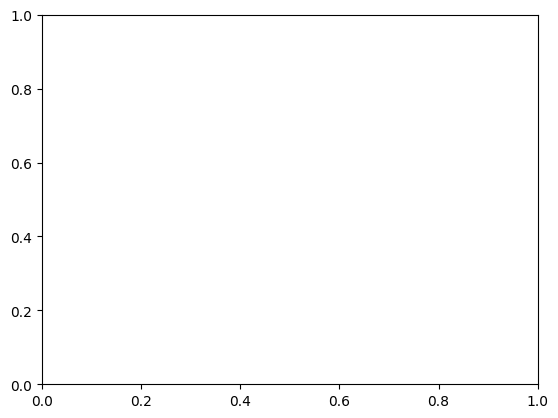

In [752]:
#By condition
categories = ['Low Choice', 'High Choice']
conditions = ['High Resources: 4:2', 'Low Resources: X:0']
x_pos = np.arange(len(conditions))

HC1 = Other_AvertedAfterChoiceFullZF_High + Other_AvertedAfterChoiceFullZT_High
LC1 = Other_AvertedAfterChoiceFullZF_Low + Other_AvertedAfterChoiceFullZT_Low


# High reward choices
HCs = [np.mean(Other_AvertedAfterChoiceFullTF_High),np.mean(HC1)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterChoiceFullTF_High), std_err(HC1)]
print(HCs, errorh)
# Low reward choices
LCs = [np.mean(Other_AvertedAfterChoiceFullTF_Low), np.mean(LC1)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterChoiceFullTF_Low), std_err(LC1)]
print(LCs, errorl)
tick = np.matrix([])

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'orange',tick_label=[" _", " "])
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'blue',tick_label=[" "," "])

ax.set_ylabel('frequency of averted gaze')
ax.set_xlabel('reward ratio')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


StopIteration: 

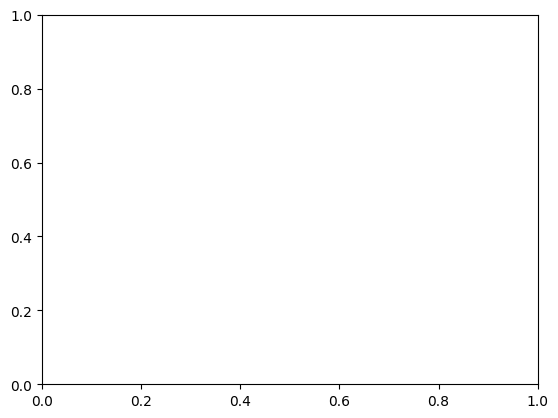

In [741]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedAfterChoiceFullZT_High), np.mean(Other_AvertedAfterChoiceFullZF_High), np.mean(Other_AvertedAfterChoiceFullTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterChoiceFullZT_High), std_err(Other_AvertedAfterChoiceFullZF_High), std_err(Other_AvertedAfterChoiceFullTF_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedAfterChoiceFullZT_Low), np.mean(Other_AvertedAfterChoiceFullZF_Low), np.mean(Other_AvertedAfterChoiceFullTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterChoiceFullZT_Low), std_err(Other_AvertedAfterChoiceFullZF_Low), std_err(Other_AvertedAfterChoiceFullTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


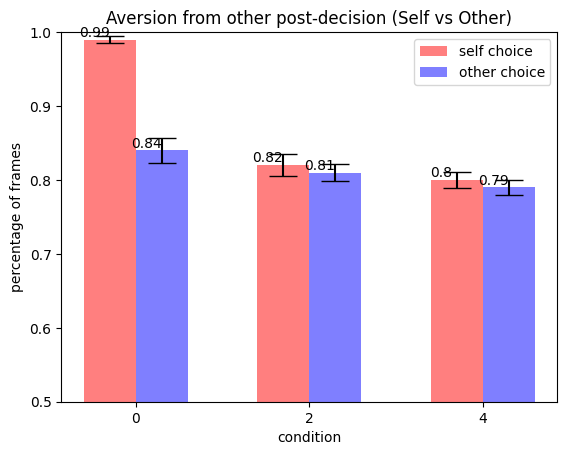

In [727]:
categories = ['self choice', 'other choice']
conditions = ['0', '2', '4']
x_pos = np.arange(len(conditions))

other_zero = Other_AvertedAfterChoiceFullZT_Low + Other_AvertedAfterChoiceFullZF_Low
other_two = Other_AvertedAfterChoiceFullZT_High +  Other_AvertedAfterChoiceFullTF_Low
other_four = Other_AvertedAfterChoiceFullZF_High + Other_AvertedAfterChoiceFullTF_High

self_zero = Self_AvertedAfterChoiceFullZT_Low + Self_AvertedAfterChoiceFullZF_Low
self_two = Self_AvertedAfterChoiceFullZT_High +  Self_AvertedAfterChoiceFullTF_Low
self_four = Self_AvertedAfterChoiceFullZT_High + Self_AvertedAfterChoiceFullTF_High

# High reward choices
HCs = [np.mean(other_zero), np.mean(other_two), np.mean(other_four)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(other_zero),std_err(other_two),std_err(other_four)]

# Low reward choices
LCs = [np.mean(self_zero),np.mean(self_two),np.mean(self_four)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(self_zero),std_err(self_two),std_err(self_four)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision (Self vs Other)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


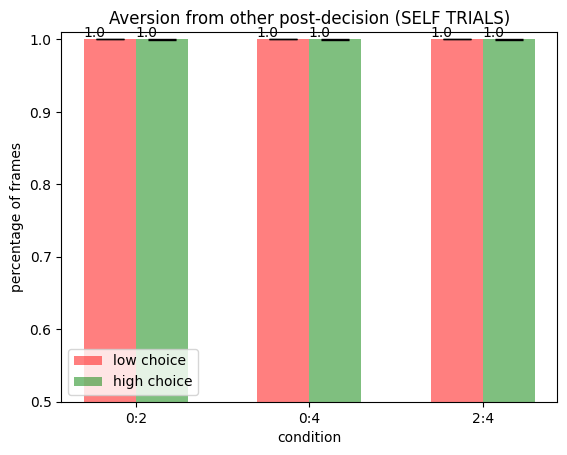

In [809]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedAfterChoiceFullZT_High), np.mean(Self_AvertedAfterChoiceFullZF_High), np.mean(Self_AvertedAfterChoiceFullTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedAfterChoiceFullZT_High), std_err(Self_AvertedAfterChoiceFullZF_High), std_err(Self_AvertedAfterChoiceFullTF_High)]

# Low reward choices
LCs = [ np.mean(Self_AvertedAfterChoiceFullZT_Low), np.mean(Self_AvertedAfterChoiceFullZF_Low), np.mean(Self_AvertedAfterChoiceFullTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedAfterChoiceFullZT_Low), std_err(Self_AvertedAfterChoiceFullZF_Low), std_err(Self_AvertedAfterChoiceFullTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.01)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


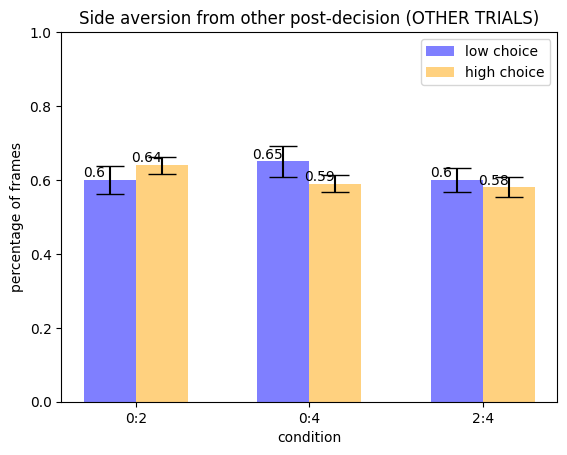

In [682]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [1-np.mean(Other_StereoAvertAfterFullZT_High), 1-np.mean(Other_StereoAvertAfterFullZF_High), 1-np.mean(Other_StereoAvertAfterFullTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_StereoAvertAfterFullZT_High), std_err(Other_StereoAvertAfterFullZF_High), std_err(Other_StereoAvertAfterFullTF_High)]

# Low reward choices
LCs = [1-np.mean(Other_StereoAvertAfterFullZT_Low), 1-np.mean(Other_StereoAvertAfterFullZF_Low), 1-np.mean(Other_StereoAvertAfterFullTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_StereoAvertAfterFullZT_Low), std_err(Other_StereoAvertAfterFullZF_Low), std_err(Other_StereoAvertAfterFullTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


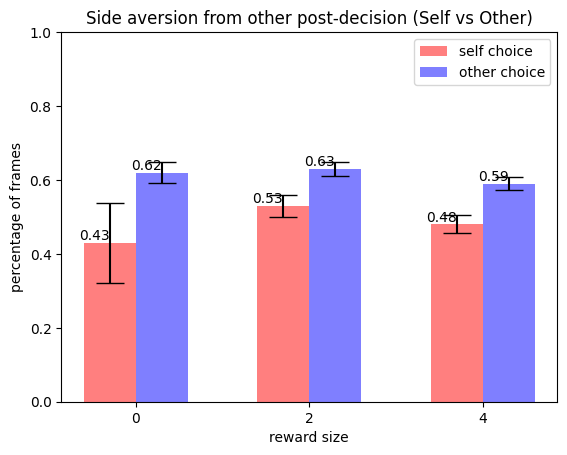

In [723]:
#By condition
categories = ['self choice', 'other choice']
conditions = ['0', '2', '4']
x_pos = np.arange(len(conditions))

other_zero = Other_StereoAvertAfterFullZT_Low + Other_StereoAvertAfterFullZF_Low
other_two = Other_StereoAvertAfterFullZT_High +  Other_StereoAvertAfterFullTF_Low
other_four = Other_StereoAvertAfterFullZF_High + Other_StereoAvertAfterFullTF_High

self_zero = Self_StereoAvertAfterFullZT_Low + Self_StereoAvertAfterFullZF_Low
self_two = Self_StereoAvertAfterFullZT_High +  Self_StereoAvertAfterFullTF_Low
self_four = Self_StereoAvertAfterFullZF_High + Self_StereoAvertAfterFullTF_High

# High reward choices
HCs = [1-np.mean(other_zero), 1-np.mean(other_two), 1-np.mean(other_four)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(other_zero),std_err(other_two),std_err(other_four)]

# Low reward choices
LCs = [1-np.mean(self_zero),1-np.mean(self_two),1-np.mean(self_four)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(self_zero),std_err(self_two),std_err(self_four)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('reward size')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision (Self vs Other)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0.915492958, 0.93258427, 1.0, 0.0, 0.054794521, 0.171428571, 0.03125, 0.923076923, 0.586956522]
[0 1 2]


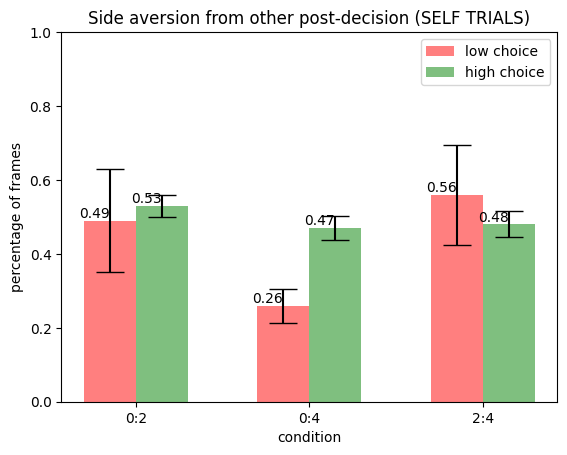

In [683]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [1-np.mean(Self_StereoAvertAfterFullZT_High), 1-np.mean(Self_StereoAvertAfterFullZF_High), 1-np.mean(Self_StereoAvertAfterFullTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_StereoAvertAfterFullZT_High), std_err(Self_StereoAvertAfterFullZF_High), std_err(Self_StereoAvertAfterFullTF_High)]

# Low reward choices
LCs = [1-np.mean(Self_StereoAvertAfterFullZT_Low), 1-np.mean(Self_StereoAvertAfterFullZF_Low), 1-np.mean(Self_StereoAvertAfterFullTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_StereoAvertAfterFullZT_Low), std_err(Self_StereoAvertAfterFullZF_Low), std_err(Self_StereoAvertAfterFullTF_Low)]

print((Self_StereoAvertAfterFullZT_Low))

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


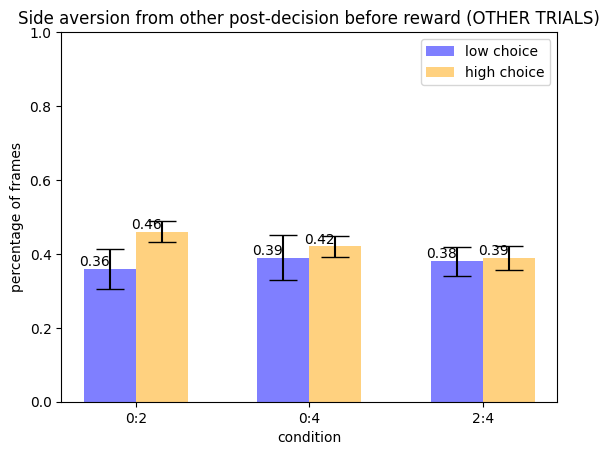

In [685]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [ 1-np.mean(Other_StereoAvertAfterBRZT_High), 1-np.mean(Other_StereoAvertAfterBRZF_High), 1-np.mean(Other_StereoAvertAfterBRTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [ std_err(Other_StereoAvertAfterBRZT_High), std_err(Other_StereoAvertAfterBRZF_High), std_err(Other_StereoAvertAfterBRTF_High)]

# Low reward choices
LCs = [1-np.mean(Other_StereoAvertAfterBRZT_Low), 1-np.mean(Other_StereoAvertAfterBRZF_Low), 1-np.mean(Other_StereoAvertAfterBRTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_StereoAvertAfterBRZT_Low), std_err(Other_StereoAvertAfterBRZF_Low), std_err(Other_StereoAvertAfterBRTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision before reward (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0.915492958, 0.93258427, 1.0, 0.0, 0.054794521, 0.171428571, 0.03125, 0.923076923, 0.586956522]
[0 1 2]


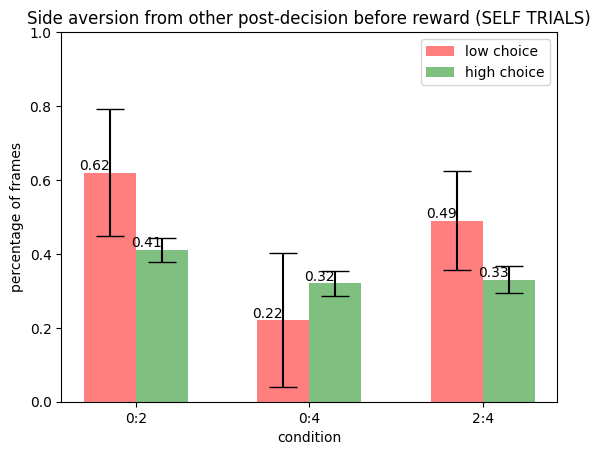

In [686]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [1-np.mean(Self_StereoAvertAfterBRZT_High), 1-np.mean(Self_StereoAvertAfterBRZF_High), 1-np.mean(Self_StereoAvertAfterBRTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [ std_err(Self_StereoAvertAfterBRZT_High), std_err(Self_StereoAvertAfterBRZF_High), std_err(Self_StereoAvertAfterBRTF_High)]

# Low reward choices
LCs = [1-np.mean(Self_StereoAvertAfterBRZT_Low), 1-np.mean(Self_StereoAvertAfterBRZF_Low), 1-np.mean(Self_StereoAvertAfterBRTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_StereoAvertAfterBRZT_Low), std_err(Self_StereoAvertAfterBRZF_Low), std_err(Self_StereoAvertAfterBRTF_Low)]

print((Self_StereoAvertAfterFullZT_Low))

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision before reward (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


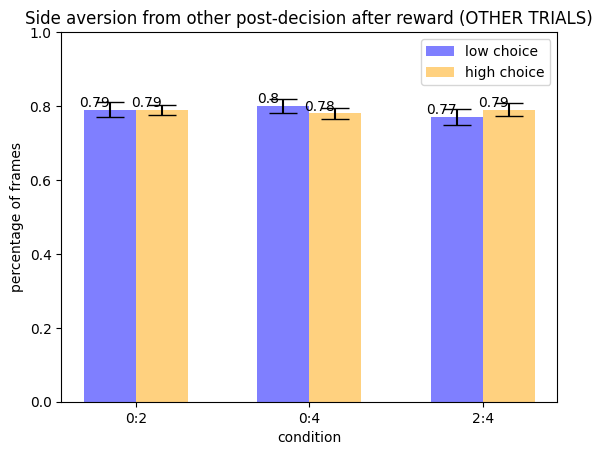

In [687]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [ 1-np.mean(Other_StereoAvertAfterARZT_High), 1-np.mean(Other_StereoAvertAfterARZF_High), 1-np.mean(Other_StereoAvertAfterARTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_StereoAvertAfterARZT_High), std_err(Other_StereoAvertAfterARZF_High), std_err(Other_StereoAvertAfterARTF_High)]

# Low reward choices
LCs = [1-np.mean(Other_StereoAvertAfterARZT_Low), 1-np.mean(Other_StereoAvertAfterARZF_Low), 1-np.mean(Other_StereoAvertAfterARTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_StereoAvertAfterARZT_Low), std_err(Other_StereoAvertAfterARZF_Low), std_err(Other_StereoAvertAfterARTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision after reward (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0.915492958, 0.93258427, 1.0, 0.0, 0.054794521, 0.171428571, 0.03125, 0.923076923, 0.586956522]
[0 1 2]


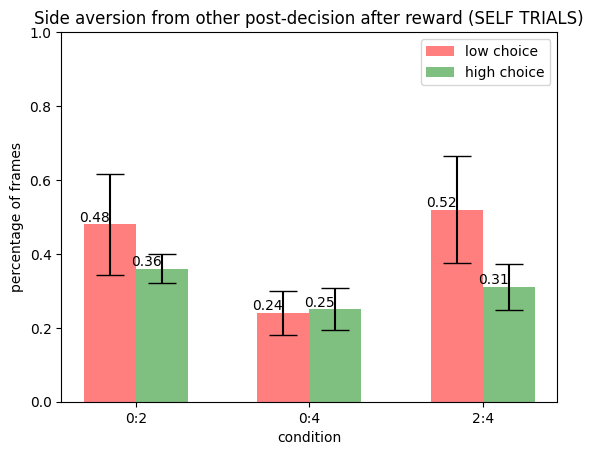

In [688]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [1-np.mean(Self_StereoAvertAfterARZT_High), 1-np.mean(Self_StereoAvertAfterARZF_High), 1-np.mean(Self_StereoAvertAfterARTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_StereoAvertAfterARZT_High), std_err(Self_StereoAvertAfterARZF_High), std_err(Self_StereoAvertAfterARTF_High)]

# Low reward choices
LCs = [1-np.mean(Self_StereoAvertAfterARZT_Low), 1-np.mean(Self_StereoAvertAfterARZF_Low), 1-np.mean(Self_StereoAvertAfterARTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_StereoAvertAfterARZT_Low), std_err(Self_StereoAvertAfterARZF_Low), std_err(Self_StereoAvertAfterARTF_Low)]

print((Self_StereoAvertAfterFullZT_Low))

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other post-decision after reward (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


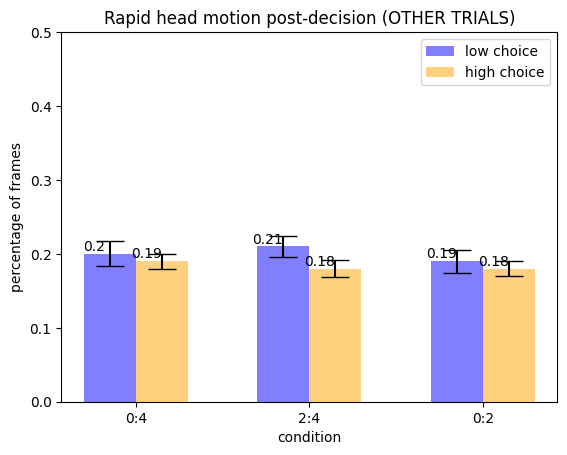

In [596]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertingAfterFullZF_High), np.mean(Other_AvertingAfterFullTF_High), np.mean(Other_AvertingAfterFullZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertingAfterFullZF_High), std_err(Other_AvertingAfterFullTF_High), std_err(Other_AvertingAfterFullZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertingAfterFullZF_Low), np.mean(Other_AvertingAfterFullTF_Low), np.mean(Other_AvertingAfterFullZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertingAfterFullZF_Low), std_err(Other_AvertingAfterFullTF_Low), std_err(Other_AvertingAfterFullZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Rapid head motion post-decision (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


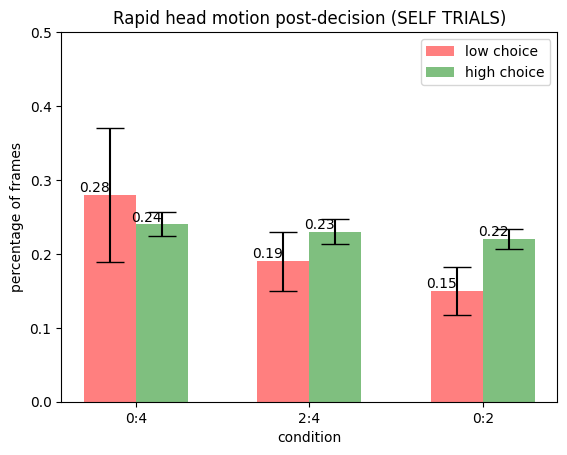

In [597]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertingAfterFullZF_High), np.mean(Self_AvertingAfterFullTF_High), np.mean(Self_AvertingAfterFullZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertingAfterFullZF_High), std_err(Self_AvertingAfterFullTF_High), std_err(Self_AvertingAfterFullZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertingAfterFullZF_Low), np.mean(Self_AvertingAfterFullTF_Low), np.mean(Self_AvertingAfterFullZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertingAfterFullZF_Low), std_err(Self_AvertingAfterFullTF_Low), std_err(Self_AvertingAfterFullZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Rapid head motion post-decision (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


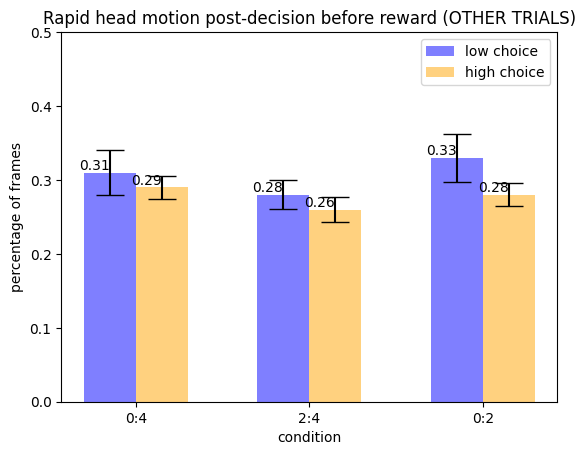

In [598]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertingAfterBRZF_High), np.mean(Other_AvertingAfterBRTF_High), np.mean(Other_AvertingAfterBRZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertingAfterBRZF_High), std_err(Other_AvertingAfterBRTF_High), std_err(Other_AvertingAfterBRZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertingAfterBRZF_Low), np.mean(Other_AvertingAfterBRTF_Low), np.mean(Other_AvertingAfterBRZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertingAfterBRZF_Low), std_err(Other_AvertingAfterBRTF_Low), std_err(Other_AvertingAfterBRZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Rapid head motion post-decision before reward (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


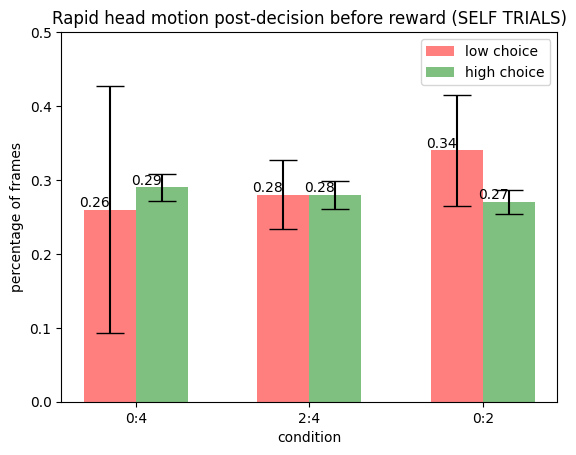

In [599]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertingAfterBRZF_High), np.mean(Self_AvertingAfterBRTF_High), np.mean(Self_AvertingAfterBRZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertingAfterBRZF_High), std_err(Self_AvertingAfterBRTF_High), std_err(Self_AvertingAfterBRZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertingAfterBRZF_Low), np.mean(Self_AvertingAfterBRTF_Low), np.mean(Self_AvertingAfterBRZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertingAfterBRZF_Low), std_err(Self_AvertingAfterBRTF_Low), std_err(Self_AvertingAfterBRZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Rapid head motion post-decision before reward (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


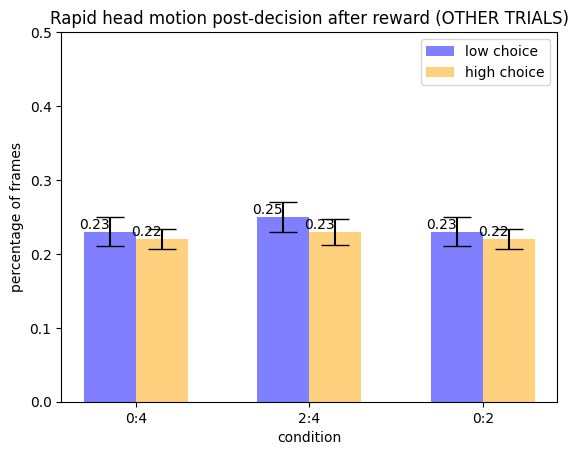

In [600]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertingAfterARZF_High), np.mean(Other_AvertingAfterARTF_High), np.mean(Other_AvertingAfterARZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertingAfterARZF_High), std_err(Other_AvertingAfterARTF_High), std_err(Other_AvertingAfterARZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertingAfterARZF_Low), np.mean(Other_AvertingAfterARTF_Low), np.mean(Other_AvertingAfterARZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertingAfterARZF_Low), std_err(Other_AvertingAfterARTF_Low), std_err(Other_AvertingAfterARZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Rapid head motion post-decision after reward (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


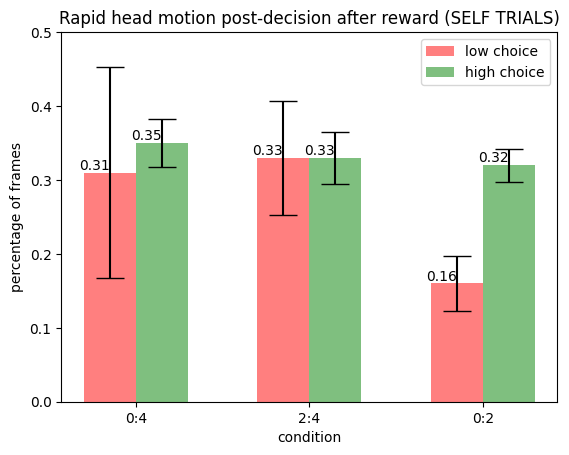

In [601]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertingAfterARZF_High), np.mean(Self_AvertingAfterARTF_High), np.mean(Self_AvertingAfterARZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertingAfterARZF_High), std_err(Self_AvertingAfterARTF_High), std_err(Self_AvertingAfterARZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertingAfterARZF_Low), np.mean(Self_AvertingAfterARTF_Low), np.mean(Self_AvertingAfterARZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertingAfterARZF_Low), std_err(Self_AvertingAfterARTF_Low), std_err(Self_AvertingAfterARZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Rapid head motion post-decision after reward (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


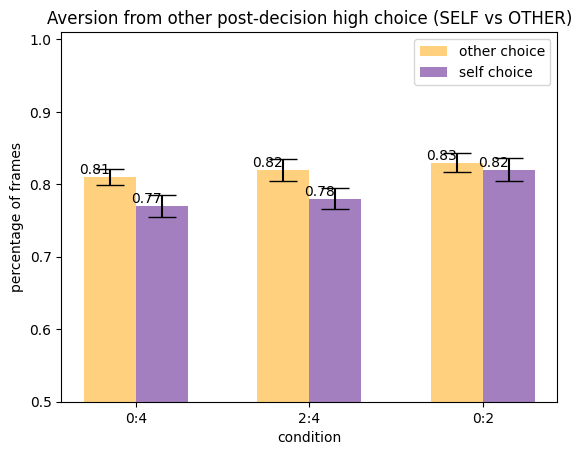

In [345]:
#By condition
categories = ['other choice', 'self choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
OCs = [np.mean(Other_AvertedAfterChoiceFullZF_High), np.mean(Other_AvertedAfterChoiceFullTF_High), np.mean(Other_AvertedAfterChoiceFullZT_High)]
OCs = [round(elem, 2) for elem in OCs]
erroro = [std_err(Other_AvertedAfterChoiceFullZF_High), std_err(Other_AvertedAfterChoiceFullTF_High), std_err(Other_AvertedAfterChoiceFullZT_High)]

# Low reward choices
SCs = [np.mean(Self_AvertedAfterChoiceFullZF_High), np.mean(Self_AvertedAfterChoiceFullTF_High), np.mean(Self_AvertedAfterChoiceFullZT_High)]
SCs = [round(elem, 2) for elem in SCs]
errors = [std_err(Self_AvertedAfterChoiceFullZF_High), std_err(Self_AvertedAfterChoiceFullTF_High), std_err(Self_AvertedAfterChoiceFullZT_High)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, OCs, yerr = erroro, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='orange')
hbars = ax.bar(x_pos + width, SCs, yerr = errors, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='indigo')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision high choice (SELF vs OTHER)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.01)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


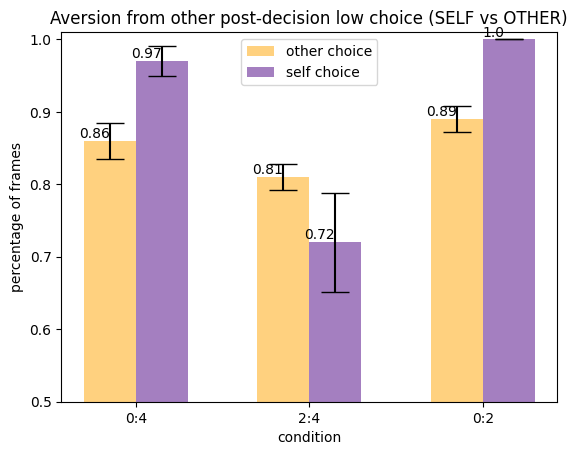

In [346]:
#By condition
categories = ['other choice', 'self choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
OCs = [np.mean(Other_AvertedAfterChoiceFullZF_Low), np.mean(Other_AvertedAfterChoiceFullTF_Low), np.mean(Other_AvertedAfterChoiceFullZT_Low)]
OCs = [round(elem, 2) for elem in OCs]
erroro = [std_err(Other_AvertedAfterChoiceFullZF_Low), std_err(Other_AvertedAfterChoiceFullTF_Low), std_err(Other_AvertedAfterChoiceFullZT_Low)]

# Low reward choices
SCs = [np.mean(Self_AvertedAfterChoiceFullZF_Low), np.mean(Self_AvertedAfterChoiceFullTF_Low), np.mean(Self_AvertedAfterChoiceFullZT_Low)]
SCs = [round(elem, 2) for elem in SCs]
errors = [std_err(Self_AvertedAfterChoiceFullZF_Low), std_err(Self_AvertedAfterChoiceFullTF_Low), std_err(Self_AvertedAfterChoiceFullZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, OCs, yerr = erroro, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='orange')
hbars = ax.bar(x_pos + width, SCs, yerr = errors, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='indigo')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision low choice (SELF vs OTHER)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.01)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


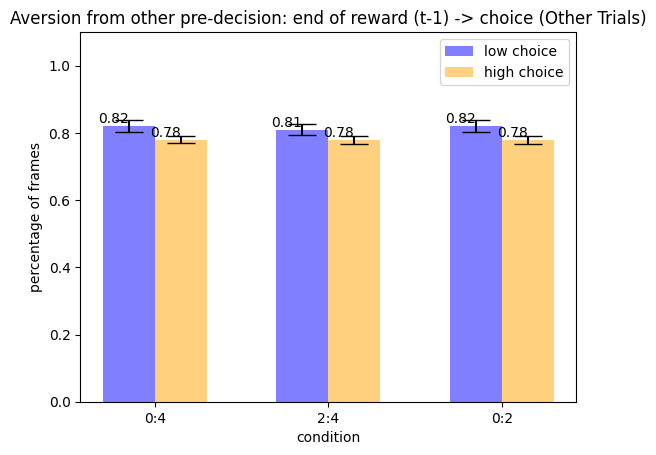

In [689]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedBeforeChoiceLongZF_High), np.mean(Other_AvertedBeforeChoiceLongTF_High), np.mean(Other_AvertedBeforeChoiceLongZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedBeforeChoiceLongZF_High), std_err(Other_AvertedBeforeChoiceLongTF_High), std_err(Other_AvertedBeforeChoiceLongZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedBeforeChoiceLongZF_Low), np.mean(Other_AvertedBeforeChoiceLongTF_Low), np.mean(Other_AvertedBeforeChoiceLongZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedBeforeChoiceLongZF_Low), std_err(Other_AvertedBeforeChoiceLongTF_Low), std_err(Other_AvertedBeforeChoiceLongZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision: end of reward (t-1) -> choice (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.1)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other pre-decision: end of reward (t-1) -> choice (Self Trials)

[0 1 2]


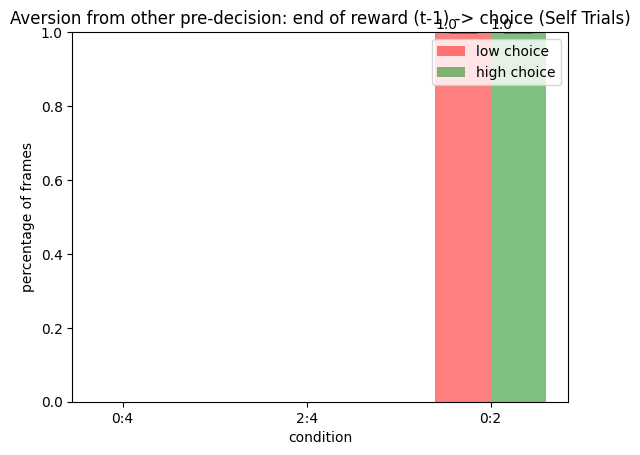

In [745]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedBeforeChoiceLongZF_High), np.mean(Self_AvertedBeforeChoiceLongTF_High), np.mean(Self_AvertedBeforeChoiceLongZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedBeforeChoiceLongZF_High), std_err(Self_AvertedBeforeChoiceLongTF_High), std_err(Self_AvertedBeforeChoiceLongZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedBeforeChoiceLongZF_Low), np.mean(Self_AvertedBeforeChoiceLongTF_Low), np.mean(Self_AvertedBeforeChoiceLongZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedBeforeChoiceLongZF_Low), std_err(Self_AvertedBeforeChoiceLongTF_Low), std_err(Self_AvertedBeforeChoiceLongZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision: end of reward (t-1) -> choice (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other pre-decision: fixation -> choice (Other Trials)

[0 1 2]


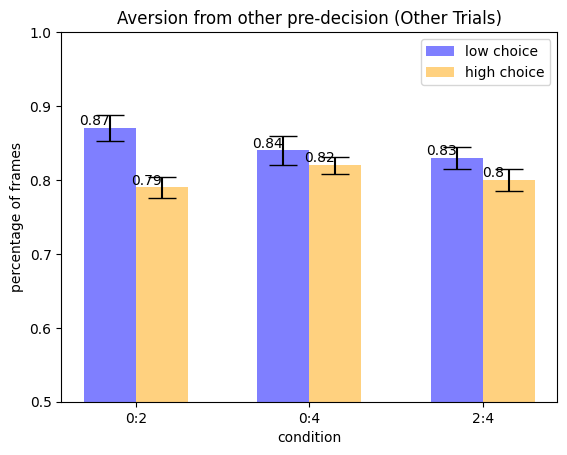

In [691]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedBeforeChoiceShortZT_High), np.mean(Other_AvertedBeforeChoiceShortZF_High), np.mean(Other_AvertedBeforeChoiceShortTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedBeforeChoiceShortZT_High), std_err(Other_AvertedBeforeChoiceShortZF_High), std_err(Other_AvertedBeforeChoiceShortTF_High)]

# Low reward choices
LCs = [ np.mean(Other_AvertedBeforeChoiceShortZT_Low), np.mean(Other_AvertedBeforeChoiceShortZF_Low), np.mean(Other_AvertedBeforeChoiceShortTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedBeforeChoiceShortZT_Low), std_err(Other_AvertedBeforeChoiceShortZF_Low), std_err(Other_AvertedBeforeChoiceShortTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other pre-decision: fixation -> choice (Self Trials)

[0 1 2]


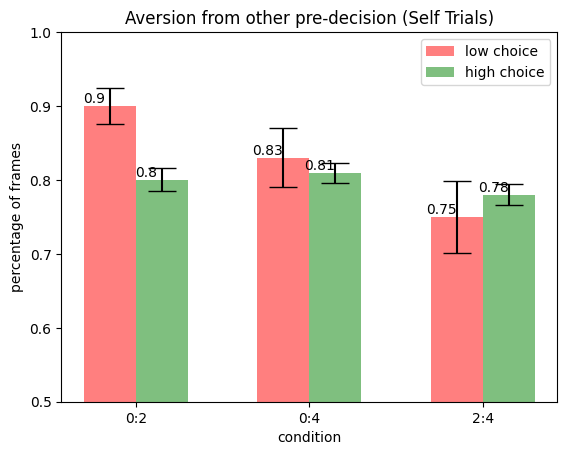

In [692]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedBeforeChoiceShortZT_High), np.mean(Self_AvertedBeforeChoiceShortZF_High), np.mean(Self_AvertedBeforeChoiceShortTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedBeforeChoiceShortZT_High), std_err(Self_AvertedBeforeChoiceShortZF_High), std_err(Self_AvertedBeforeChoiceShortTF_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedBeforeChoiceShortZT_Low), np.mean(Self_AvertedBeforeChoiceShortZF_Low), np.mean(Self_AvertedBeforeChoiceShortTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedBeforeChoiceShortZT_Low), std_err(Self_AvertedBeforeChoiceShortZF_Low), std_err(Self_AvertedBeforeChoiceShortTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


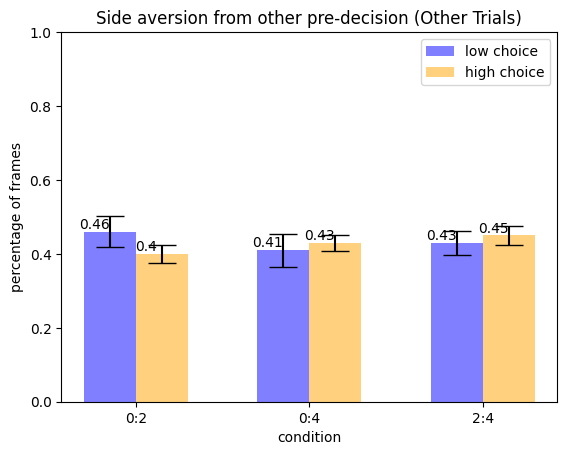

In [693]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_StereoAvertBeforeShortZT_High), np.mean(Other_StereoAvertBeforeShortZF_High), np.mean(Other_StereoAvertBeforeShortTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_StereoAvertBeforeShortZT_High), std_err(Other_StereoAvertBeforeShortZF_High), std_err(Other_StereoAvertBeforeShortTF_High)]

# Low reward choices
LCs = [np.mean(Other_StereoAvertBeforeShortZT_Low), np.mean(Other_StereoAvertBeforeShortZF_Low), np.mean(Other_StereoAvertBeforeShortTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_StereoAvertBeforeShortZT_Low), std_err(Other_StereoAvertBeforeShortZF_Low), std_err(Other_StereoAvertBeforeShortTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other pre-decision (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


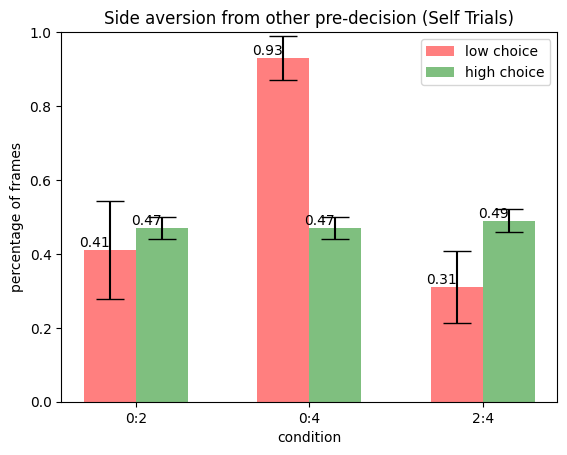

In [694]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_StereoAvertBeforeShortZT_High), np.mean(Self_StereoAvertBeforeShortZF_High), np.mean(Self_StereoAvertBeforeShortTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_StereoAvertBeforeShortZT_High), std_err(Self_StereoAvertBeforeShortZF_High), std_err(Self_StereoAvertBeforeShortTF_High)]

# Low reward choices
LCs = [ np.mean(Self_StereoAvertBeforeShortZT_Low), np.mean(Self_StereoAvertBeforeShortZF_Low), np.mean(Self_StereoAvertBeforeShortTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_StereoAvertBeforeShortZT_Low), std_err(Self_StereoAvertBeforeShortZF_Low), std_err(Self_StereoAvertBeforeShortTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Side aversion from other pre-decision (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

**AVERSION POST-DECISION

Aversion from other post-decision: choice -> reward onset (Other Trials)
#Other_AvertedAfterChoiceBR

[0 1 2]


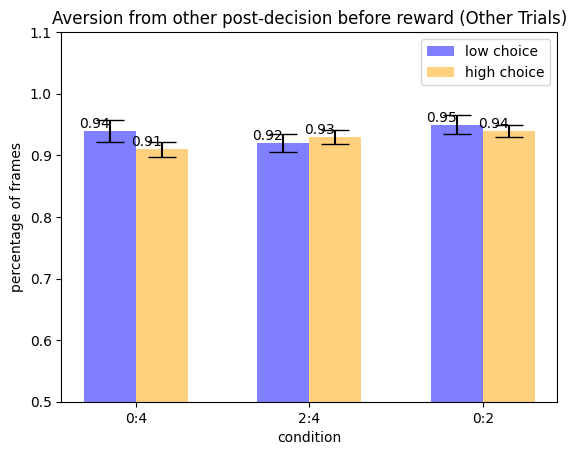

In [611]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedAfterChoiceBRZF_High), np.mean(Other_AvertedAfterChoiceBRTF_High), np.mean(Other_AvertedAfterChoiceBRZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterChoiceBRZF_High), std_err(Other_AvertedAfterChoiceBRTF_High), std_err(Other_AvertedAfterChoiceBRZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedAfterChoiceBRZF_Low), np.mean(Other_AvertedAfterChoiceBRTF_Low), np.mean(Other_AvertedAfterChoiceBRZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterChoiceBRZF_Low), std_err(Other_AvertedAfterChoiceBRTF_Low), std_err(Other_AvertedAfterChoiceBRZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision before reward (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.1)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post-decision: choice -> reward onset (Self Trials)

[0 1 2]


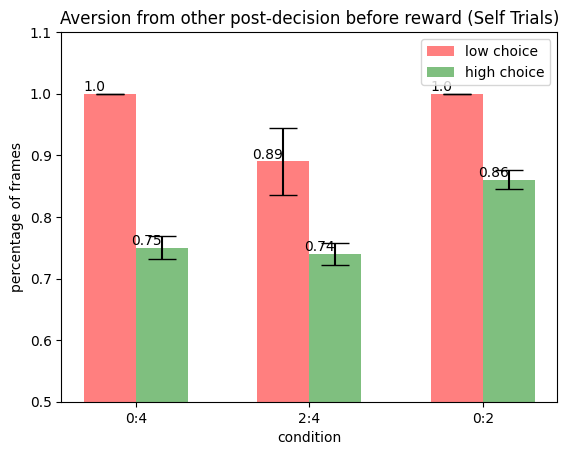

In [612]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedAfterChoiceBRZF_High), np.mean(Self_AvertedAfterChoiceBRTF_High), np.mean(Self_AvertedAfterChoiceBRZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedAfterChoiceBRZF_High), std_err(Self_AvertedAfterChoiceBRTF_High), std_err(Self_AvertedAfterChoiceBRZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedAfterChoiceBRZF_Low), np.mean(Self_AvertedAfterChoiceBRTF_Low), np.mean(Self_AvertedAfterChoiceBRZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedAfterChoiceBRZF_Low), std_err(Self_AvertedAfterChoiceBRTF_Low), std_err(Self_AvertedAfterChoiceBRZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision before reward (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.1)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post decision: reward onset -> end of trial (Other Trials)
#Other_AvertedAfterChoiceAR

[0 1 2]


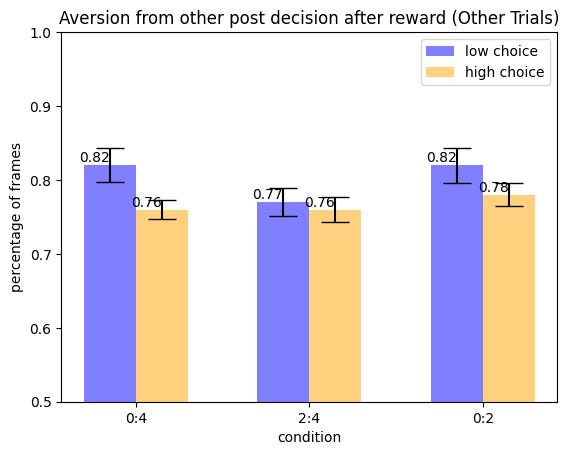

In [613]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedAfterChoiceARZF_High), np.mean(Other_AvertedAfterChoiceARTF_High), np.mean(Other_AvertedAfterChoiceARZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterChoiceARZF_High), std_err(Other_AvertedAfterChoiceARTF_High), std_err(Other_AvertedAfterChoiceARZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedAfterChoiceARZF_Low), np.mean(Other_AvertedAfterChoiceARTF_Low), np.mean(Other_AvertedAfterChoiceARZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterChoiceARZF_Low), std_err(Other_AvertedAfterChoiceARTF_Low), std_err(Other_AvertedAfterChoiceARZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='orange')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post decision after reward (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post decision: reward onset -> end of trial (Self Trials)

[0 1 2]


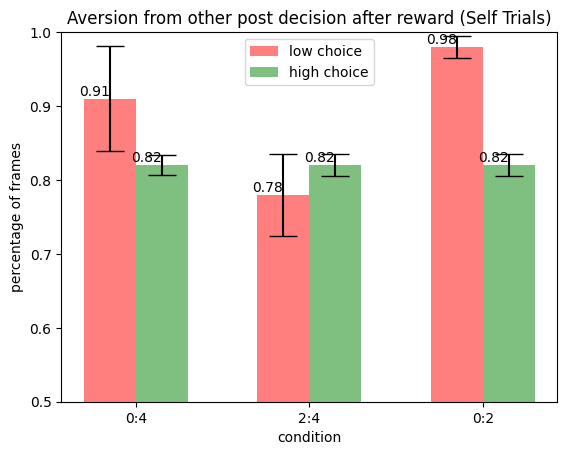

In [614]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedAfterChoiceARZF_High), np.mean(Self_AvertedAfterChoiceARTF_High), np.mean(Self_AvertedAfterChoiceARZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedAfterChoiceARZF_High), std_err(Self_AvertedAfterChoiceARTF_High), std_err(Self_AvertedAfterChoiceARZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedAfterChoiceARZF_Low), np.mean(Self_AvertedAfterChoiceARTF_Low), np.mean(Self_AvertedAfterChoiceARZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedAfterChoiceARZF_Low), std_err(Self_AvertedAfterChoiceARTF_Low), std_err(Self_AvertedAfterChoiceARZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color = 'red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color = 'green')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post decision after reward (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.5, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post-decision: choice -> end of trial (Other Trials)
#Other_AvertedAfterChoiceFull

Aversion from other post-decision: choice -> end of trial (Self Trials)

****REWARD ANTICIPATION

**Reward Anticipation Pre-decision

Reward anticipation pre-decision: end of reward (t-1) -> choice (Other Trials)
#Other_RewardAnticipationBeforeLong

[0 1 2]


StopIteration: 

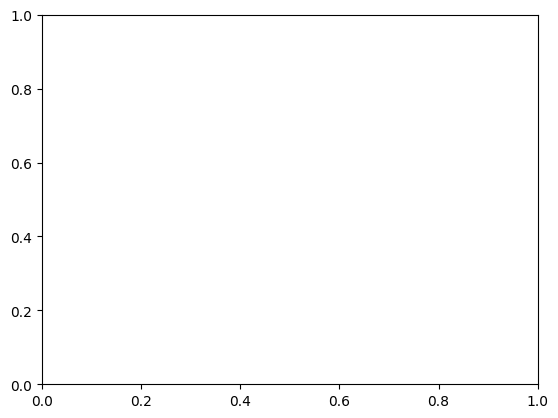

In [754]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_RewardAnticipationBeforeLongZF_High), np.mean(Other_RewardAnticipationBeforeLongTF_High), np.mean(Other_RewardAnticipationBeforeLongZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_RewardAnticipationBeforeLongZF_High), std_err(Other_RewardAnticipationBeforeLongTF_High), std_err(Other_RewardAnticipationBeforeLongZT_High)]

# Low reward choices
LCs = [np.mean(Other_RewardAnticipationBeforeLongZF_Low), np.mean(Other_RewardAnticipationBeforeLongTF_Low), np.mean(Other_RewardAnticipationBeforeLongZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationBeforeLongZF_Low), std_err(Other_RewardAnticipationBeforeLong_Low), std_err(Other_RewardAnticipationBeforeLongZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation pre-decision: end of reward (t-1) -> choice (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.6)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation pre-decision: end of reward (t-1) -> choice (Self Trials)

[0 1 2]


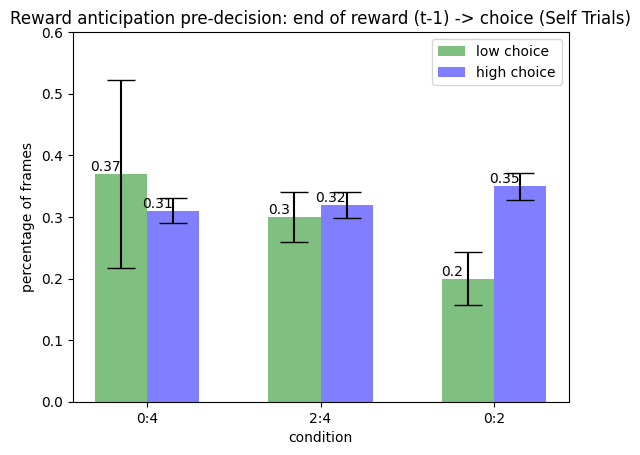

In [775]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationBeforeLongZF_High), np.mean(Self_RewardAnticipationBeforeLongTF_High), np.mean(Self_RewardAnticipationBeforeLongZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationBeforeLongZF_High), std_err(Self_RewardAnticipationBeforeLongTF_High), std_err(Self_RewardAnticipationBeforeLongZT_High)]

# Low reward choices
LCs = [np.mean(Self_RewardAnticipationBeforeLongZF_Low), np.mean(Self_RewardAnticipationBeforeLongTF_Low), np.mean(Self_RewardAnticipationBeforeLongZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_RewardAnticipationBeforeLongZF_Low), std_err(Self_RewardAnticipationBeforeLong_Low), std_err(Self_RewardAnticipationBeforeLongZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation pre-decision: end of reward (t-1) -> choice (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.6)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation pre-decision: fixation -> choice (Other Trials)

[0 1 2]


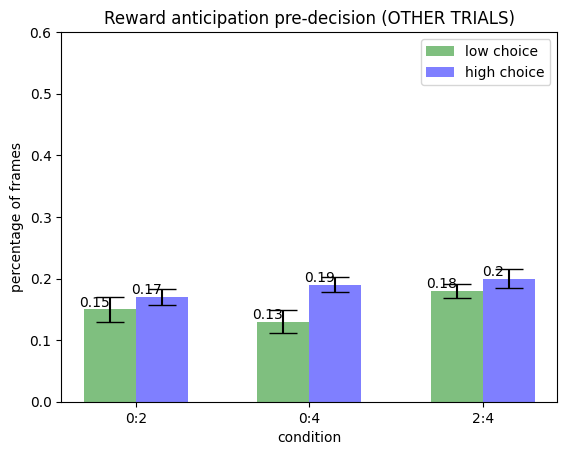

In [791]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_RewardAnticipationBeforeShortZT_High), np.mean(Other_RewardAnticipationBeforeShortZF_High), np.mean(Other_RewardAnticipationBeforeShortTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_RewardAnticipationBeforeShortZT_High), std_err(Other_RewardAnticipationBeforeShortZF_High), std_err(Other_RewardAnticipationBeforeShortTF_High)]

# Low reward choices
LCs = [np.mean(Other_RewardAnticipationBeforeShortZT_Low), np.mean(Other_RewardAnticipationBeforeShortZF_Low), np.mean(Other_RewardAnticipationBeforeShortTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationBeforeShortZT_Low), std_err(Other_RewardAnticipationBeforeShortZF_Low), std_err(Other_RewardAnticipationBeforeShort_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation pre-decision (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.6)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation pre-decision: fixation -> choice (Self Trials)

[0 1 2]


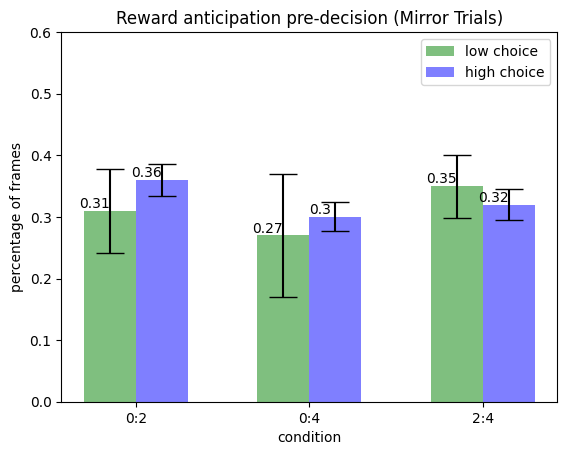

In [803]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationBeforeShortZT_High), np.mean(Self_RewardAnticipationBeforeShortZF_High), np.mean(Self_RewardAnticipationBeforeShortTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationBeforeShortZT_High), std_err(Self_RewardAnticipationBeforeShortZF_High), std_err(Self_RewardAnticipationBeforeShortTF_High)]

# Low reward choices
LCs = [ np.mean(Self_RewardAnticipationBeforeShortZT_Low),np.mean(Self_RewardAnticipationBeforeShortZF_Low), np.mean(Self_RewardAnticipationBeforeShortTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_RewardAnticipationBeforeShortZT_Low), std_err(Self_RewardAnticipationBeforeShortZF_Low), std_err(Self_RewardAnticipationBeforeShort_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation pre-decision (Mirror Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.6)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

**Reward Anticipation Post-decision

Reward anticipation post-decision: reward onset -> reward end (Other Trials)
#Other_RewardAnticipationDuringReward

[0 1 2]


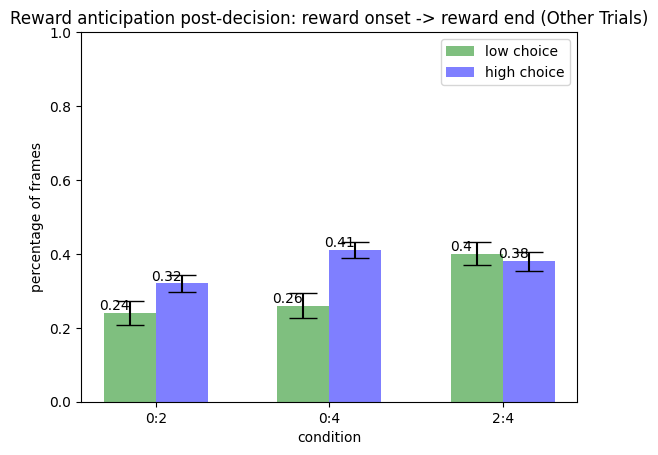

In [795]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [ np.mean(Other_RewardAnticipationDuringRewardZT_High), np.mean(Other_RewardAnticipationDuringRewardZF_High), np.mean(Other_RewardAnticipationDuringRewardTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [ std_err(Other_RewardAnticipationDuringRewardZT_High), std_err(Other_RewardAnticipationDuringRewardZF_High), std_err(Other_RewardAnticipationDuringRewardTF_High)]

# Low reward choices
LCs = [ np.mean(Other_RewardAnticipationDuringRewardZT_Low), np.mean(Other_RewardAnticipationDuringRewardZF_Low), np.mean(Other_RewardAnticipationDuringRewardTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationDuringRewardZT_Low), std_err(Other_RewardAnticipationDuringRewardZF_Low), std_err(Other_RewardAnticipationDuringRewardTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision: reward onset -> reward end (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0]


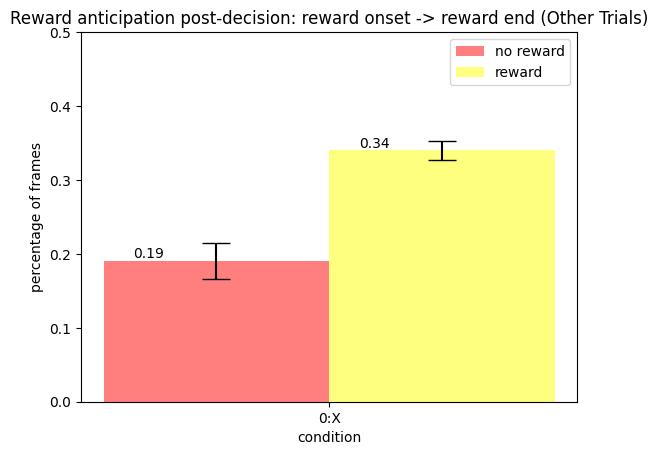

In [702]:
#By condition
categories = ['no reward', 'reward']
conditions = ['0:X']
x_pos = np.arange(len(conditions))

reward = Other_RewardAnticipationDuringRewardZT_High + Other_RewardAnticipationDuringRewardZF_High + Other_RewardAnticipationDuringRewardTF_High + Other_RewardAnticipationDuringRewardTF_Low
no_reward = Other_RewardAnticipationDuringRewardZT_Low + Other_RewardAnticipationDuringRewardZF_Low

# High reward choices
HCs = [ np.mean(reward)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [ std_err(reward)]

# Low reward choices
LCs = [ np.mean(no_reward)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(no_reward)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='yellow')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision: reward onset -> reward end (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation post-decision: reward onset -> reward end (Self Trials)

[0 1 2]


c:\Users\13108\.conda\envs\DEEPLABCUT\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\13108\.conda\envs\DEEPLABCUT\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\13108\.conda\envs\DEEPLABCUT\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\13108\.conda\envs\DEEPLABCUT\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\13108\.conda\envs\DEEPLABCUT\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


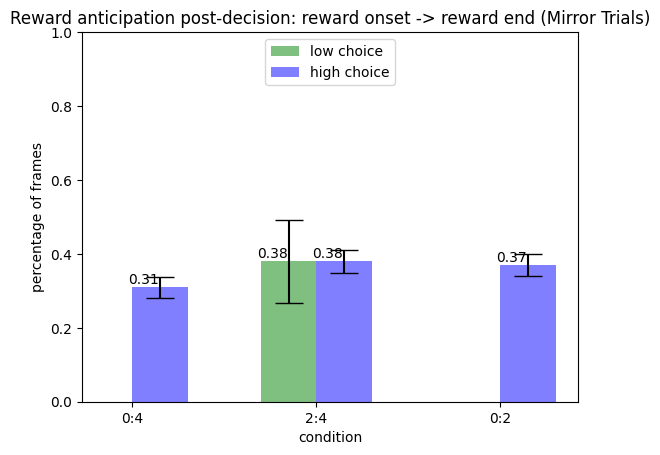

In [804]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationDuringRewardZF_High), np.mean(Self_RewardAnticipationDuringRewardTF_High), np.mean(Self_RewardAnticipationDuringRewardZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationDuringRewardZF_High), std_err(Self_RewardAnticipationDuringRewardTF_High), std_err(Self_RewardAnticipationDuringRewardZT_High)]

# Low reward choices
LCs = [np.mean(Self_RewardAnticipationDuringRewardZF_Low), np.mean(Self_RewardAnticipationDuringRewardTF_Low), np.mean(Self_RewardAnticipationDuringRewardZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_RewardAnticipationDuringRewardZF_Low), std_err(Self_RewardAnticipationDuringRewardTF_Low), std_err(Self_RewardAnticipationDuringRewardZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision: reward onset -> reward end (Mirror Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation post-decision: choice -> reward onset (Other Trials)
#Other_RewardAnticipationAfterBR

[0 1 2]


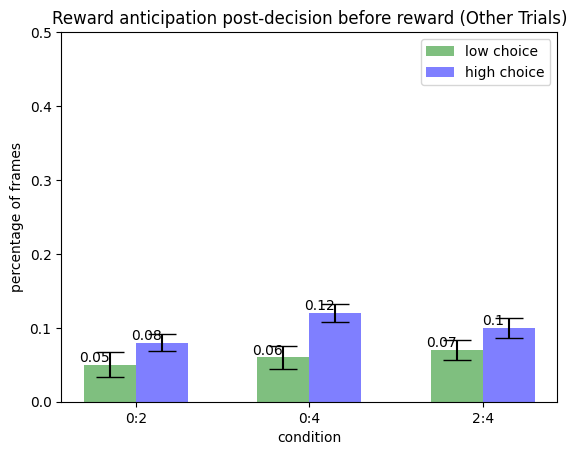

In [797]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2','0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_RewardAnticipationAfterBRZT_High), np.mean(Other_RewardAnticipationAfterBRZF_High), np.mean(Other_RewardAnticipationAfterBRTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_RewardAnticipationAfterBRZT_High), std_err(Other_RewardAnticipationAfterBRZF_High), std_err(Other_RewardAnticipationAfterBRTF_High)]

# Low reward choices
LCs = [ np.mean(Other_RewardAnticipationAfterBRZT_Low), np.mean(Other_RewardAnticipationAfterBRZF_Low), np.mean(Other_RewardAnticipationAfterBRTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationAfterBRZT_Low), std_err(Other_RewardAnticipationAfterBRZF_Low), std_err(Other_RewardAnticipationAfterBRTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision before reward (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0]


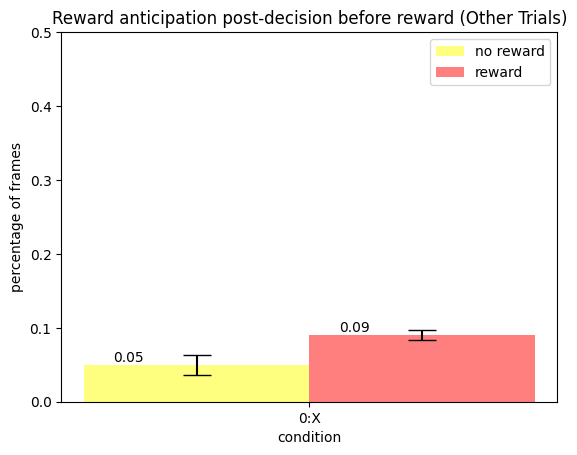

In [706]:
#By condition
categories = ['no reward', 'reward']
conditions = ['0:X']
x_pos = np.arange(len(conditions))

reward = Other_RewardAnticipationAfterBRZT_High + Other_RewardAnticipationAfterBRZF_High + Other_RewardAnticipationAfterBRTF_High + Other_RewardAnticipationAfterBRTF_Low
no_reward = Other_RewardAnticipationAfterBRZT_Low + Other_RewardAnticipationAfterBRZF_Low

# High reward choices
HCs = [np.mean(reward)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(reward)]

# Low reward choices
LCs = [ np.mean(no_reward)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(no_reward)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision before reward (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation post-decision: choice -> reward onset (Self Trials)

[0 1 2]


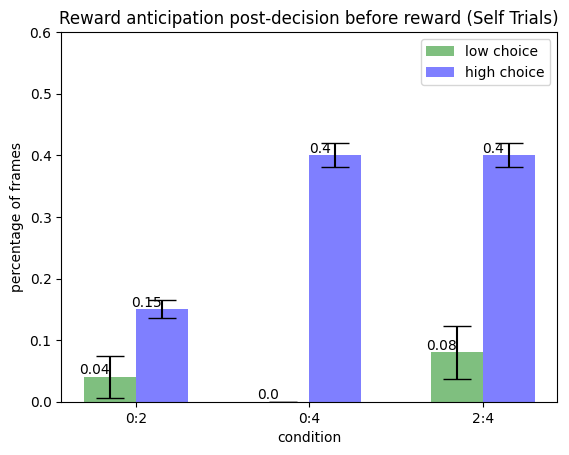

In [798]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationAfterBRZT_High), np.mean(Self_RewardAnticipationAfterBRZF_High), np.mean(Self_RewardAnticipationAfterBRTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationAfterBRZT_High), std_err(Self_RewardAnticipationAfterBRZF_High), std_err(Self_RewardAnticipationAfterBRTF_High)]

# Low reward choices
LCs = [np.mean(Self_RewardAnticipationAfterBRZT_Low), np.mean(Self_RewardAnticipationAfterBRZF_Low), np.mean(Self_RewardAnticipationAfterBRTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [ std_err(Self_RewardAnticipationAfterBRZT_Low), std_err(Self_RewardAnticipationAfterBRZF_Low), std_err(Self_RewardAnticipationAfterBRTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision before reward (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.6)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0]


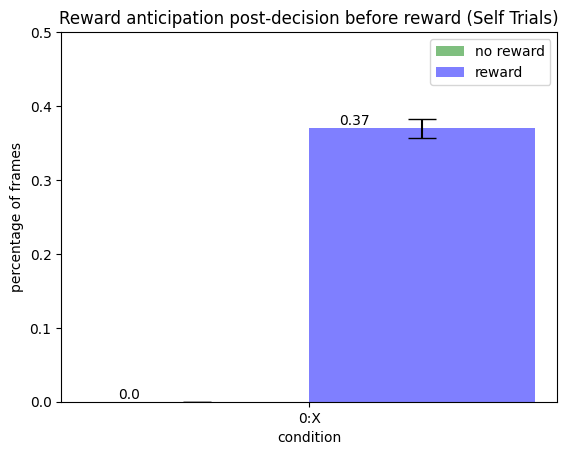

In [708]:
#By condition
categories = ['no reward', 'reward']
conditions = ['0:X']
x_pos = np.arange(len(conditions))

reward = Self_RewardAnticipationAfterBRZT_High + Self_RewardAnticipationAfterBRZF_High+ Self_RewardAnticipationAfterBRTF_High + Self_RewardAnticipationAfterBRTF_Low
no_reward = Self_RewardAnticipationAfterBRZT_Low + Self_RewardAnticipationAfterBRZF_Low

# High reward choices
HCs = [np.mean(reward)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(reward)]

# Low reward choices
LCs = [np.mean(no_reward)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [ std_err(no_reward)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='green')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='blue')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation post-decision before reward (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

**Reward Anticipation Self

Reward anticipation for self during other trials: other reward end -> self reward start
Other_RewardAnticipationSelf

[0 1 2]


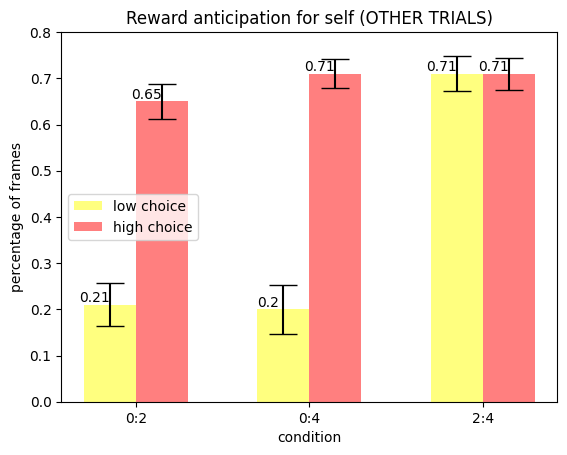

In [785]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_RewardAnticipationSelfZT_High), np.mean(Other_RewardAnticipationSelfZF_High), np.mean(Other_RewardAnticipationSelfTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_RewardAnticipationSelfZT_High), std_err(Other_RewardAnticipationSelfZF_High), std_err(Other_RewardAnticipationSelfTF_High)]

# Low reward choices
LCs = [np.mean(Other_RewardAnticipationSelfZT_Low), np.mean(Other_RewardAnticipationSelfZF_Low), np.mean(Other_RewardAnticipationSelfTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationSelfZT_Low), std_err(Other_RewardAnticipationSelfZF_Low), std_err(Other_RewardAnticipationSelfTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for self (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0]


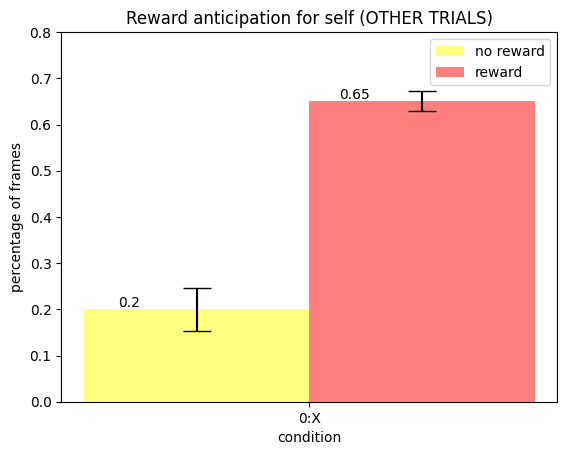

In [718]:
#By condition
categories = ['no reward', 'reward']
conditions = ['0:X']
x_pos = np.arange(len(conditions))

reward = Other_RewardAnticipationSelfZT_High + Other_RewardAnticipationSelfZF_High + Other_RewardAnticipationSelfTF_High + Other_RewardAnticipationSelfTF_Low
no_reward = Other_RewardAnticipationSelfZT_Low + Other_RewardAnticipationSelfZF_Low


# High reward choices
HCs = [np.mean(reward)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(reward)]

# Low reward choices
LCs = [np.mean(no_reward)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(no_reward)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for self (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation for self during self trials: choice -> self reward start

[0 1 2]


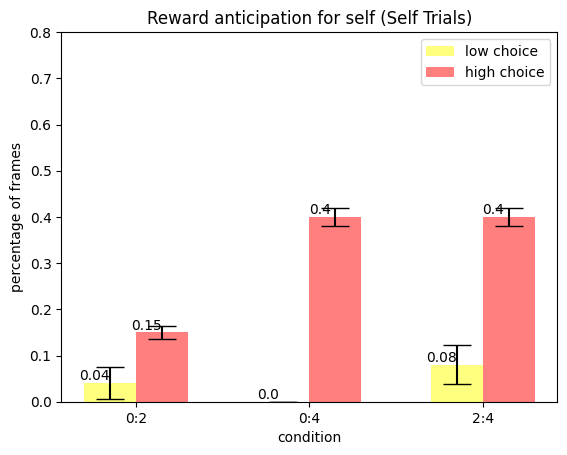

In [786]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationSelfZT_High), np.mean(Self_RewardAnticipationSelfZF_High), np.mean(Self_RewardAnticipationSelfTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationSelfZT_High), std_err(Self_RewardAnticipationSelfZF_High), std_err(Self_RewardAnticipationSelfTF_High)]

# Low reward choices
LCs = [np.mean(Self_RewardAnticipationSelfZT_Low), np.mean(Self_RewardAnticipationSelfZF_Low), np.mean(Self_RewardAnticipationSelfTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [ std_err(Self_RewardAnticipationSelfZT_Low), std_err(Self_RewardAnticipationSelfZF_Low), std_err(Self_RewardAnticipationSelfTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for self (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0]


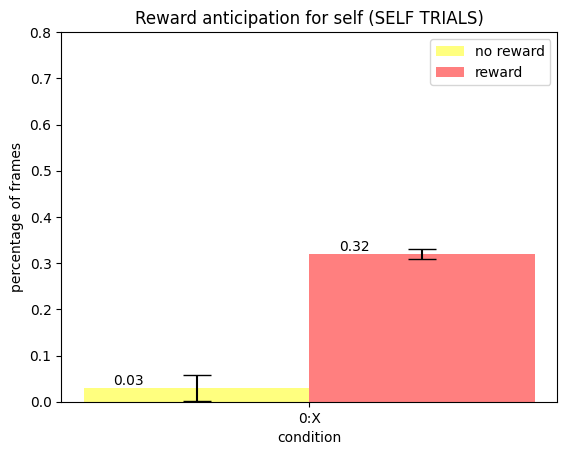

In [787]:
#By condition
categories = ['no reward', 'reward']
conditions = ['0:X']
x_pos = np.arange(len(conditions))

reward = Self_RewardAnticipationSelfZT_High + Self_RewardAnticipationSelfZF_High + Self_RewardAnticipationSelfTF_High + Self_RewardAnticipationSelfTF_Low
no_reward = Self_RewardAnticipationSelfZT_Low + Self_RewardAnticipationSelfZF_Low


# High reward choices
HCs = [np.mean(reward)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(reward)]

# Low reward choices
LCs = [np.mean(no_reward)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [ std_err(no_reward)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for self (SELF TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation for other during other trials with self reward: choice -> other reward start
#Self_RewardAnticipationOther

[0 1 2]


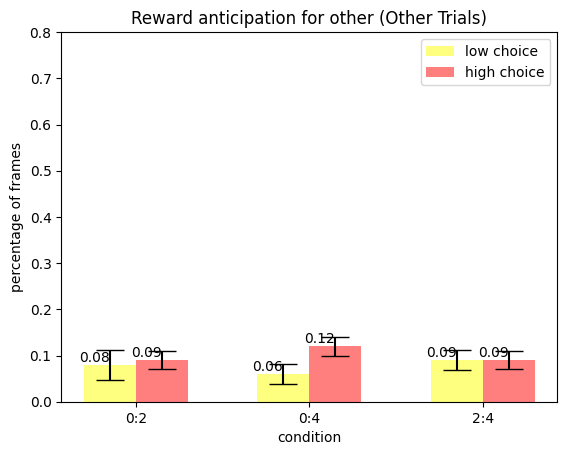

In [788]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationOtherZT_High), np.mean(Self_RewardAnticipationOtherZF_High), np.mean(Self_RewardAnticipationOtherTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationOtherZT_High), std_err(Self_RewardAnticipationOtherZF_High), std_err(Self_RewardAnticipationOtherTF_High)]

# Low reward choices
LCs = [np.mean(Self_RewardAnticipationOtherZT_Low), np.mean(Self_RewardAnticipationOtherZF_Low), np.mean(Self_RewardAnticipationOtherTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_RewardAnticipationOtherZT_Low), std_err(Self_RewardAnticipationOtherZF_Low), std_err(Self_RewardAnticipationOtherTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for other (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.00, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


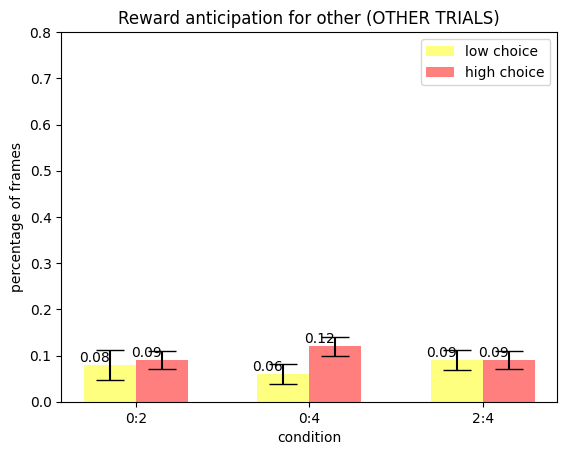

In [789]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2', '0:4', '2:4']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_RewardAnticipationOtherZT_High), np.mean(Self_RewardAnticipationOtherZF_High), np.mean(Self_RewardAnticipationOtherTF_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_RewardAnticipationOtherZT_High), std_err(Self_RewardAnticipationOtherZF_High), std_err(Self_RewardAnticipationOtherTF_High)]

# Low reward choices
LCs = [np.mean(Self_RewardAnticipationOtherZT_Low), np.mean(Self_RewardAnticipationOtherZF_Low), np.mean(Self_RewardAnticipationOtherTF_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_RewardAnticipationOtherZT_Low), std_err(Self_RewardAnticipationOtherZF_Low), std_err(Self_RewardAnticipationOtherTF_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for other (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.00, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0]


StopIteration: 

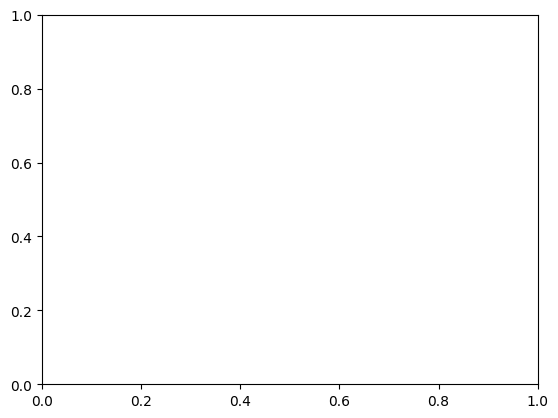

In [782]:
#By condition
categories = ['no reward', 'reward']
conditions = ['0:X']
x_pos = np.arange(len(conditions))

reward = Self_RewardAnticipationOtherZT_High + Self_RewardAnticipationOtherZF_High + Self_RewardAnticipationOtherTF_High + Self_RewardAnticipationOtherTF_Low
no_reward = Self_RewardAnticipationOtherZT_Low + Self_RewardAnticipationOtherZF_Low

# High reward choices
HCs = [np.mean(reward)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(reward)]

# Low reward choices
LCs = [np.mean(no_reward)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(no_reward)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for other (OTHER TRIALS)')
ax.yaxis.grid(False) 
ax.set_ylim(0.00, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Reward anticipation for other during other trials with no self reward: choice -> other reward start

[0 1 2]


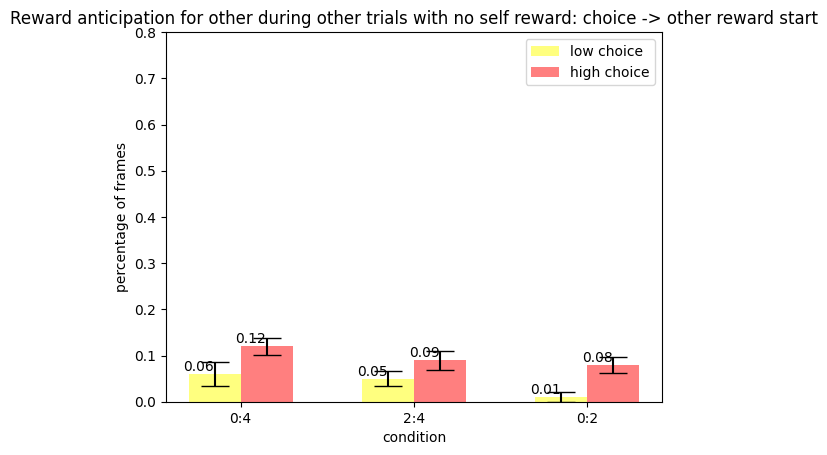

In [411]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_RewardAnticipationOtherZF_High), np.mean(Other_RewardAnticipationOtherTF_High), np.mean(Other_RewardAnticipationOtherZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_RewardAnticipationOtherZF_High), std_err(Other_RewardAnticipationOtherTF_High), std_err(Other_RewardAnticipationOtherZT_High)]

# Low reward choices
LCs = [np.mean(Other_RewardAnticipationOtherZF_Low), np.mean(Other_RewardAnticipationOtherTF_Low), np.mean(Other_RewardAnticipationOtherZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationOtherZF_Low), std_err(Other_RewardAnticipationOtherTF_Low), std_err(Other_RewardAnticipationOtherZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for other during other trials with no self reward: choice -> other reward start')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

****AVERSION CONTROLLING FOR REWARD ANTICIPATION

**Controlled Aversion Pre-decision

Aversion from other pre-decision controlling for reward anticipation: end of reward (t-1) -> choice (Other Trials)
#Other_AvertedBeforeNoAnticipationLong

[0 1 2]


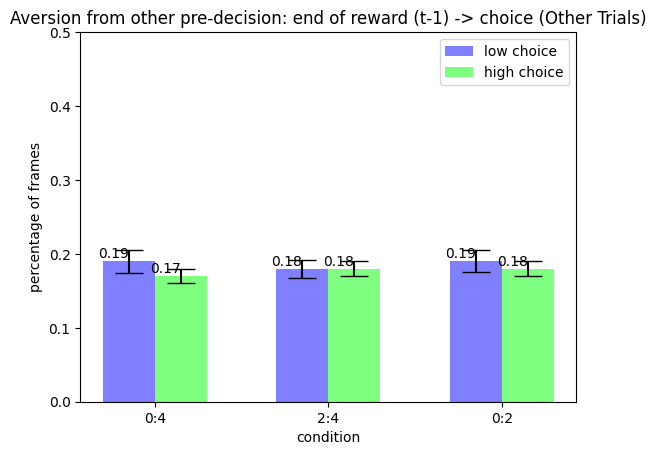

In [98]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedBeforeNoAnticipationLongZF_High), np.mean(Other_AvertedBeforeNoAnticipationLongTF_High), np.mean(Other_AvertedBeforeNoAnticipationLongZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedBeforeNoAnticipationLongZF_High), std_err(Other_AvertedBeforeNoAnticipationLongTF_High), std_err(Other_AvertedBeforeNoAnticipationLongZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedBeforeNoAnticipationLongZF_Low), np.mean(Other_AvertedBeforeNoAnticipationLongTF_Low), np.mean(Other_AvertedBeforeNoAnticipationLongZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedBeforeNoAnticipationLongZF_Low), std_err(Other_AvertedBeforeNoAnticipationLongTF_Low), std_err(Other_AvertedBeforeNoAnticipationLongZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='lime')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision: end of reward (t-1) -> choice (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other pre-decision controlling for reward anticipation: end of reward (t-1) -> choice (Self Trials)

[0 1 2]


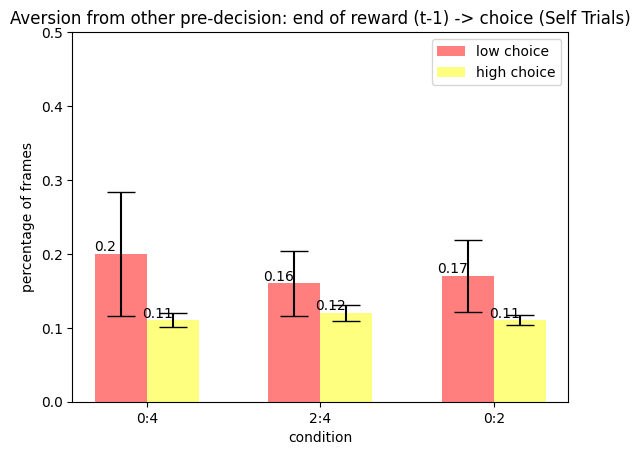

In [94]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedBeforeNoAnticipationLongZF_High), np.mean(Self_AvertedBeforeNoAnticipationLongTF_High), np.mean(Self_AvertedBeforeNoAnticipationLongZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedBeforeNoAnticipationLongZF_High), std_err(Self_AvertedBeforeNoAnticipationLongTF_High), std_err(Self_AvertedBeforeNoAnticipationLongZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedBeforeNoAnticipationLongZF_Low), np.mean(Self_AvertedBeforeNoAnticipationLongTF_Low), np.mean(Self_AvertedBeforeNoAnticipationLongZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedBeforeNoAnticipationLongZF_Low), std_err(Self_AvertedBeforeNoAnticipationLongTF_Low), std_err(Self_AvertedBeforeNoAnticipationLongZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='yellow')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision: end of reward (t-1) -> choice (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other pre-decision controlling for reward anticipation: fixation -> choice (Other Trials)

[0 1 2]


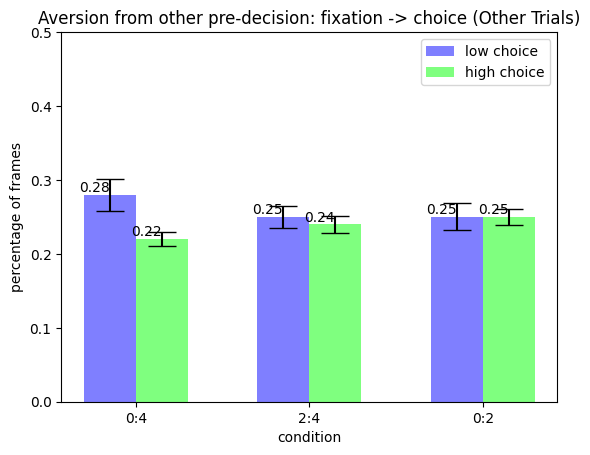

In [101]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedBeforeNoAnticipationShortZF_High), np.mean(Other_AvertedBeforeNoAnticipationShortTF_High), np.mean(Other_AvertedBeforeNoAnticipationShortZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedBeforeNoAnticipationShortZF_High), std_err(Other_AvertedBeforeNoAnticipationShortTF_High), std_err(Other_AvertedBeforeNoAnticipationShortZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedBeforeNoAnticipationShortZF_Low), np.mean(Other_AvertedBeforeNoAnticipationShortTF_Low), np.mean(Other_AvertedBeforeNoAnticipationShortZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedBeforeNoAnticipationShortZF_Low), std_err(Other_AvertedBeforeNoAnticipationShortTF_Low), std_err(Other_AvertedBeforeNoAnticipationShortZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='lime')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision: fixation -> choice (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other pre-decision controlling for reward anticipation: fixation -> choice (Self Trials)

[0 1 2]


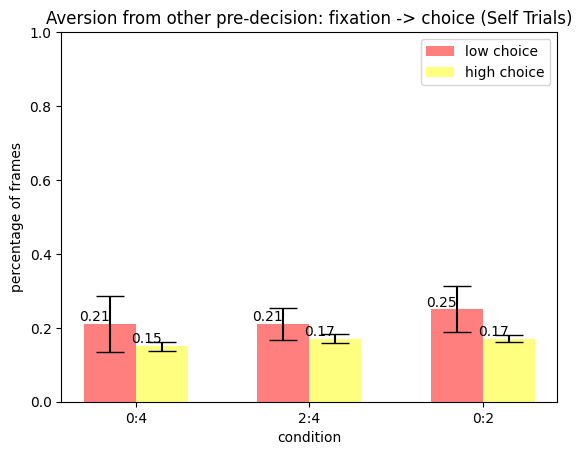

In [100]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedBeforeNoAnticipationShortZF_High), np.mean(Self_AvertedBeforeNoAnticipationShortTF_High), np.mean(Self_AvertedBeforeNoAnticipationShortZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedBeforeNoAnticipationShortZF_High), std_err(Self_AvertedBeforeNoAnticipationShortTF_High), std_err(Self_AvertedBeforeNoAnticipationShortZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedBeforeNoAnticipationShortZF_Low), np.mean(Self_AvertedBeforeNoAnticipationShortTF_Low), np.mean(Self_AvertedBeforeNoAnticipationShortZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedBeforeNoAnticipationShortZF_Low), std_err(Self_AvertedBeforeNoAnticipationShortTF_Low), std_err(Self_AvertedBeforeNoAnticipationShortZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='yellow')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other pre-decision: fixation -> choice (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 1.0)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

**Controlled Aversion Post-decision

Aversion from other post-decision controlling for reward anticipation: choice -> reward onset (Other Trials)
#Other_AvertedAfterNoAnticipationBR

[0 1 2]


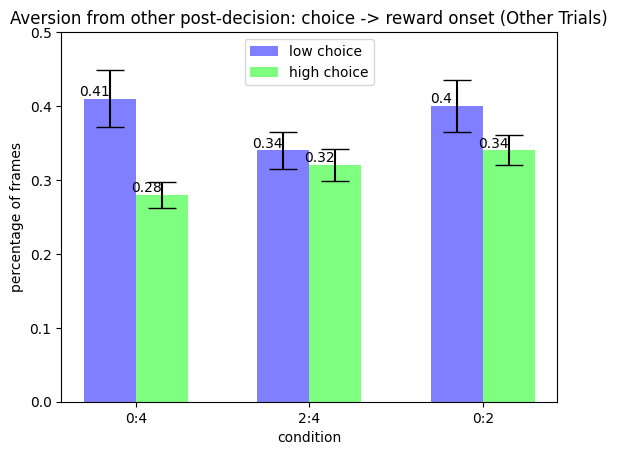

In [103]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedAfterNoAnticipationBRZF_High), np.mean(Other_AvertedAfterNoAnticipationBRTF_High), np.mean(Other_AvertedAfterNoAnticipationBRZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterNoAnticipationBRZF_High), std_err(Other_AvertedAfterNoAnticipationBRTF_High), std_err(Other_AvertedAfterNoAnticipationBRZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedAfterNoAnticipationBRZF_Low), np.mean(Other_AvertedAfterNoAnticipationBRTF_Low), np.mean(Other_AvertedAfterNoAnticipationBRZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterNoAnticipationBRZF_Low), std_err(Other_AvertedAfterNoAnticipationBRTF_Low), std_err(Other_AvertedAfterNoAnticipationBRZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='lime')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision: choice -> reward onset (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post-decision controlling for reward anticipation: choice -> reward onset (Self Trials)

[0 1 2]


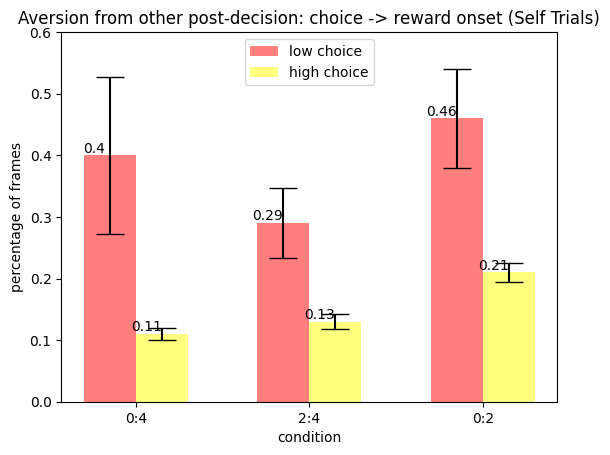

In [107]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedAfterNoAnticipationBRZF_High), np.mean(Self_AvertedAfterNoAnticipationBRTF_High), np.mean(Self_AvertedAfterNoAnticipationBRZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedAfterNoAnticipationBRZF_High), std_err(Self_AvertedAfterNoAnticipationBRTF_High), std_err(Self_AvertedAfterNoAnticipationBRZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedAfterNoAnticipationBRZF_Low), np.mean(Self_AvertedAfterNoAnticipationBRTF_Low), np.mean(Self_AvertedAfterNoAnticipationBRZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedAfterNoAnticipationBRZF_Low), std_err(Self_AvertedAfterNoAnticipationBRTF_Low), std_err(Self_AvertedAfterNoAnticipationBRZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='yellow')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post-decision: choice -> reward onset (Self Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.6)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post decision controlling for reward anticipation: reward onset -> end of trial (Other Trials)

[0 1 2]


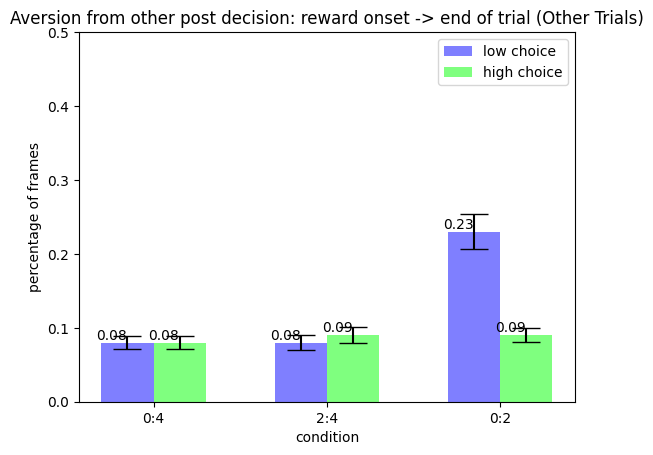

In [109]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedAfterNoAnticipationARZF_High), np.mean(Other_AvertedAfterNoAnticipationARTF_High), np.mean(Other_AvertedAfterNoAnticipationARZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterNoAnticipationARZF_High), std_err(Other_AvertedAfterNoAnticipationARTF_High), std_err(Other_AvertedAfterNoAnticipationARZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedAfterNoAnticipationARZF_Low), np.mean(Other_AvertedAfterNoAnticipationARTF_Low), np.mean(Other_AvertedAfterNoAnticipationARZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterNoAnticipationARZF_Low), std_err(Other_AvertedAfterNoAnticipationARTF_Low), std_err(Other_AvertedAfterNoAnticipationARZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='lime')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post decision: reward onset -> end of trial (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Aversion from other post-decision controlling for reward anticipation: choice -> end of trial (Other Trials)

In [114]:
print(np.mean(Other_AvertedAfterNoAnticipationFullTF_High))
print(np.mean(Other_AvertedAfterNoAnticipationFullTF_Low))

0.14699502388214283
0.149976061484375


[0 1 2]


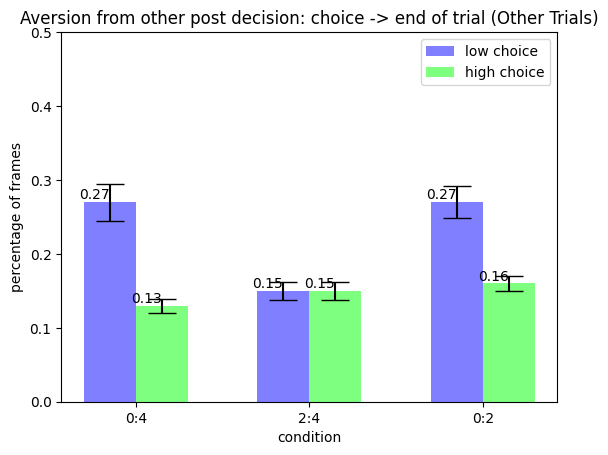

In [111]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_AvertedAfterNoAnticipationFullZF_High), np.mean(Other_AvertedAfterNoAnticipationFullTF_High), np.mean(Other_AvertedAfterNoAnticipationFullZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_AvertedAfterNoAnticipationFullZF_High), std_err(Other_AvertedAfterNoAnticipationFullTF_High), std_err(Other_AvertedAfterNoAnticipationFullZT_High)]

# Low reward choices
LCs = [np.mean(Other_AvertedAfterNoAnticipationFullZF_Low), np.mean(Other_AvertedAfterNoAnticipationFullTF_Low), np.mean(Other_AvertedAfterNoAnticipationFullZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_AvertedAfterNoAnticipationFullZF_Low), std_err(Other_AvertedAfterNoAnticipationFullTF_Low), std_err(Other_AvertedAfterNoAnticipationFullZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='blue')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='lime')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post decision: choice -> end of trial (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

[0 1 2]


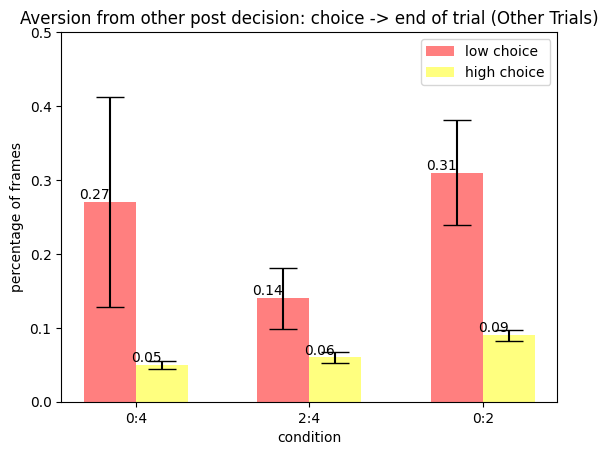

In [116]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:4', '2:4', '0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Self_AvertedAfterNoAnticipationFullZF_High), np.mean(Self_AvertedAfterNoAnticipationFullTF_High), np.mean(Self_AvertedAfterNoAnticipationFullZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Self_AvertedAfterNoAnticipationFullZF_High), std_err(Self_AvertedAfterNoAnticipationFullTF_High), std_err(Self_AvertedAfterNoAnticipationFullZT_High)]

# Low reward choices
LCs = [np.mean(Self_AvertedAfterNoAnticipationFullZF_Low), np.mean(Self_AvertedAfterNoAnticipationFullTF_Low), np.mean(Self_AvertedAfterNoAnticipationFullZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Self_AvertedAfterNoAnticipationFullZF_Low), std_err(Self_AvertedAfterNoAnticipationFullTF_Low), std_err(Self_AvertedAfterNoAnticipationFullZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10,color='red')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10,color='yellow')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Aversion from other post decision: choice -> end of trial (Other Trials)')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.5)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()

Mirror Control Trials

In [ ]:
#By condition
categories = ['low choice', 'high choice']
conditions = ['0:2']
x_pos = np.arange(len(conditions))

# High reward choices
HCs = [np.mean(Other_RewardAnticipationOtherZT_High)]
HCs = [round(elem, 2) for elem in HCs]
errorh = [std_err(Other_RewardAnticipationOtherZF_High), std_err(Other_RewardAnticipationOtherTF_High), std_err(Other_RewardAnticipationOtherZT_High)]

# Low reward choices
LCs = [np.mean(Other_RewardAnticipationOtherZF_Low), np.mean(Other_RewardAnticipationOtherTF_Low), np.mean(Other_RewardAnticipationOtherZT_Low)]
LCs = [round(elem, 2) for elem in LCs]
errorl = [std_err(Other_RewardAnticipationOtherZF_Low), std_err(Other_RewardAnticipationOtherTF_Low), std_err(Other_RewardAnticipationOtherZT_Low)]

print(x_pos)

# Build plots

fig, ax = plt.subplots()
width = 0.3

lbars = ax.bar(x_pos, LCs, yerr = errorl, align = 'center', alpha = 0.5, width = 0.3, ecolor = 'black', capsize = 10, color='yellow')
hbars = ax.bar(x_pos + width, HCs, yerr = errorh, align = 'center', alpha = 0.5, width = width, ecolor = 'black', capsize = 10, color='red')

ax.set_ylabel('percentage of frames')
ax.set_xlabel('condition')
ax.set_xticks(x_pos + width/2)
ax.set_xticklabels(conditions)
ax.set_title('Reward anticipation for other during other trials with no self reward: choice -> other reward start')
ax.yaxis.grid(False) 
ax.set_ylim(0.0, 0.8)
ax.legend(categories)

'''
ax.scatter(colTFH,TFH, marker = '.', color='black')
ax.scatter(colTFL, TFL, marker='.', color='black')
ax.scatter(colZTH,ZTH, marker = '.', color='black')
ax.scatter(colZTL, ZTL, marker='.', color='black')
ax.scatter(colZFH,ZFH, marker = '.', color='black')
ax.scatter(colZFL, ZFL, marker='.', color='black')
for i in Sessions_Data_High.keys():
      ax.arrow(colTFH[i-1], TFH[i-1], colTFL[i-1]-colTFH[i-1],TFL[i-1]-TFH[i-1])
      ax.arrow(colZTH[i-1], ZTH[i-1], colZTL[i-1]-colZTH[i-1],ZTL[i-1]-ZTH[i-1])
      ax.arrow(colZFH[i-1], ZFH[i-1], colZFL[i-1]-colZFH[i-1],ZFL[i-1]-ZFH[i-1])
'''
ax.plot()

for b in lbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
   
for b in hbars:
   height = b.get_height()
   ax.annotate('{}'.format(height),
      xy=(b.get_x() + b.get_width() / 5, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

plt.show()